# Chapter 1: Introduction to Time Series

## Chapter 1: Different Types of Data

In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
os.chdir('D:\Practical Time Series')

In [3]:
data = pd.read_csv('datasets/WDI_csv/WDIData.csv')

In [4]:
print('Column names:', data.columns)

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')


In [5]:
print('No. of rows, columns:', data.shape)

No. of rows, columns: (397056, 62)


In [6]:
nb_indicators = data['Indicator Name'].unique().shape[0]
print('Unique number of indicators:', nb_indicators)

Unique number of indicators: 1504


In [7]:
nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Unique number of countries: 264


In [8]:
central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

In [9]:
print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

Shape of central_govt_debt: (264, 62)
Shape of military_exp: (264, 62)


In [10]:
central_govt_debt['2010'].describe()

count     93.000000
mean      52.894412
std       30.866372
min        0.519274
25%       28.030110
50%       49.559823
75%       75.289093
max      168.474953
Name: 2010, dtype: float64

In [11]:
military_exp['2010'].describe()

count    194.000000
mean       1.958123
std        1.370594
min        0.000000
25%        1.120302
50%        1.606592
75%        2.594417
max        8.588373
Name: 2010, dtype: float64

In [12]:
central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

In [13]:
central_govt_debt_2010 = central_govt_debt['2010'].loc[~pd.isnull(central_govt_debt['2010'])]
military_exp_2010 = military_exp['2010'].loc[~pd.isnull(military_exp['2010'])]

In [14]:
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1)

In [15]:
data_to_plot.columns = ['central_govt_debt', 'military_exp']

In [16]:
data_to_plot.head(10)

central_govt_debt  military_exp
AFG                NaN      1.897473
AGO                NaN      4.244884
ALB                NaN      1.558592
ARB                NaN      5.122879
ARE                NaN      6.119468
ARG                NaN      0.814878
ARM                NaN      4.265646
ATG          75.289093           NaN
AUS          29.356946      1.951809
AUT          79.408304      0.824770

In [17]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]

In [18]:
data_to_plot.head()

central_govt_debt  military_exp
AUS          29.356946      1.951809
AUT          79.408304      0.824770
AZE           6.385576      2.791004
BEL           7.022605      1.084631
BGR          21.286254      1.765384

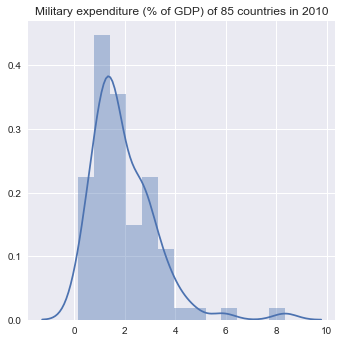

In [19]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(np.array(data_to_plot.military_exp), norm_hist=False)
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010')
plt.savefig('plots/ch1/B07887_01_01.png', format='png', dpi=300)

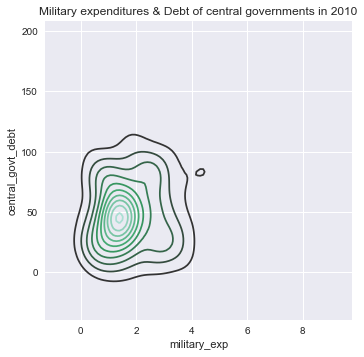

In [20]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot.military_exp, data2=data_to_plot.central_govt_debt)
g.set_title('Military expenditures & Debt of central governments in 2010')
plt.savefig('plots/ch1/B07887_01_02.png', format='png', dpi=300)

In [21]:
central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

In [22]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)

In [23]:
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2010')[0][0]

In [24]:
data_us = data_us.iloc[index0:index1+1,:]

In [25]:
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']

In [26]:
data_us.head(20)

Federal Military Expenditure Debt of Federal Government
1960                          NaN                        NaN
1961                          NaN                        NaN
1962                          NaN                        NaN
1963                          NaN                        NaN
1964                          NaN                        NaN
1965                          NaN                        NaN
1966                          NaN                        NaN
1967                          NaN                        NaN
1968                          NaN                        NaN
1969                          NaN                        NaN
1970                          NaN                        NaN
1971                          NaN                        NaN
1972                          NaN                        NaN
1973                          NaN                        NaN
1974                          NaN                        NaN
1975                          NaN                        NaN
1976                          NaN                        NaN
1977                          NaN                        NaN
1978                          NaN                        NaN
1979                          NaN                        NaN

In [27]:
#There are null rows for several years possibly due to unavailability of data for these years
data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

Shape of data_us: (23, 2)


In [31]:
#First 20 rows of data_us after dropping rows with missing values
data_us.head(20)

Federal Military Expenditure Debt of Federal Government
1988                      5.57993                    42.0258
1989                      5.37472                    43.1439
1990                      5.12025                    45.3772
1991                      4.53985                     48.633
1992                      4.66626                    50.6016
1993                      4.32693                    50.1657
1994                      3.94129                    49.3475
1995                      3.63849                    49.2366
1996                      3.35074                    46.7174
1997                       3.2099                    43.2997
1998                      3.01764                     39.977
1999                      2.90839                    37.6123
2000                      2.93343                    33.1582
2001                      2.94434                    51.9937
2002                      3.24955                    53.5029
2003                      3.60729                    55.9687
2004                      3.78557                    56.3841
2005                      3.84423                    56.2891
2006                       3.8082                    55.2942
2007                      3.84704                    55.6343

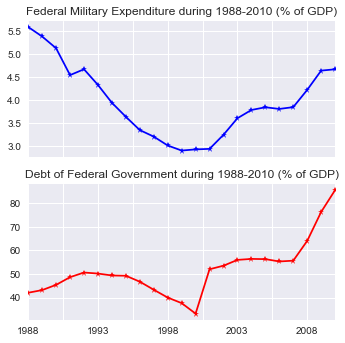

In [28]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])
plt.savefig('plots/ch1/B07887_01_03.png', format='png', dpi=300)

In [29]:
chn = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='CHN'),index0:index1+1
             ]
chn = pd.Series(data=chn.values[0], index=chn.columns)
chn.dropna(inplace=True)

usa = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='USA'),index0:index1+1
             ]
usa = pd.Series(data=usa.values[0], index=usa.columns)
usa.dropna(inplace=True)

ind = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='IND'),index0:index1+1
             ]
ind = pd.Series(data=ind.values[0], index=ind.columns)
ind.dropna(inplace=True)

gbr = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='GBR'),index0:index1+1
             ]
gbr = pd.Series(data=gbr.values[0], index=gbr.columns)
gbr.dropna(inplace=True)

C:\Users\avpal\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


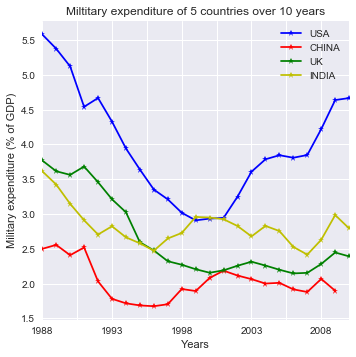

In [30]:
plt.figure(figsize=(5.5, 5.5))
usa.plot(linestyle='-', marker='*', color='b')
chn.plot(linestyle='-', marker='*', color='r')
gbr.plot(linestyle='-', marker='*', color='g')
ind.plot(linestyle='-', marker='*', color='y')
plt.legend(['USA','CHINA','UK','INDIA','RUSSIA'], loc=1)
plt.title('Miltitary expenditure of 5 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years')
plt.savefig('plots/ch1/B07887_01_04.png', format='png', dpi=300)

## Chapter 1: Internal Structures

In [31]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
os.chdir('D:/Practical Time Series/')

In [4]:
data = pd.read_excel('datasets/Monthly_CO2_Concentrations.xlsx',
                     converters={'Year': np.int32, 'Month': np.int32})

In [5]:
data.head()

CO2  Year Month
0  333.13  1974     5
1  332.09  1974     6
2  331.10  1974     7
3  329.14  1974     8
4  327.36  1974     9

In [6]:
#Create row index of the DataFrame using the Year and Month columns
data.index = data['Year'].astype(str) + '-' + data['Month'].astype(str).map(lambda x: '0'+x if len(x) == 1 else x)
data.head()

CO2  Year Month
1974-05  333.13  1974     5
1974-06  332.09  1974     6
1974-07  331.10  1974     7
1974-08  329.14  1974     8
1974-09  327.36  1974     9

In [7]:
data = data.loc[(~pd.isnull(data['CO2']))&\
                (~pd.isnull(data['Year']))&\
                (~pd.isnull(data['Month']))]

In [8]:
data.sort_values(['Year', 'Month'], inplace=True)

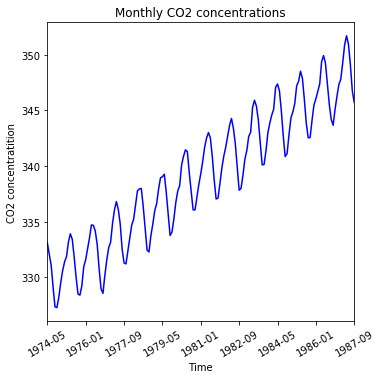

In [26]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('plots/ch1/B07887_01_05.png', format='png', dpi=300)

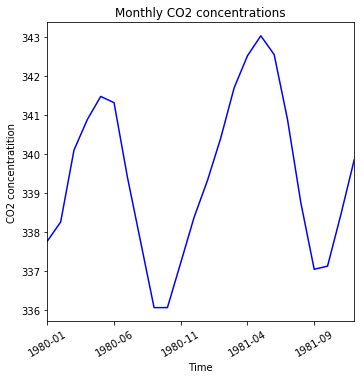

In [27]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('plots/ch1/B07887_01_06.png', format='png', dpi=300)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.arange(data.shape[0]).reshape((-1,1)), data['CO2'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [13]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],
                                                           trend_model.intercept_)
      )

Trend model coefficient=0.1209930124223602 and intercept=329.45310559006214


In [14]:
residuals = np.array(data['CO2']) - trend_model.predict(np.arange(data.shape[0]).reshape((-1,1)))

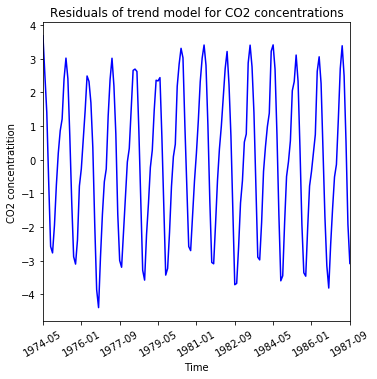

In [28]:
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('plots/ch1/B07887_01_07.png', format='png', dpi=300)

In [16]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'
                    }
data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))

In [17]:
seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

In [18]:
#Create row indices of seasonal_sub_series_data using Year & Quarter
seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']
seasonal_sub_series_data.head()

Year Quarter  Quarterly Mean  Quarterly Standard Deviation
1974-Q2  1974      Q2        3.096398                      0.820946
1974-Q3  1974      Q3       -0.616085                      1.991671
1974-Q4  1974      Q4       -1.822397                      1.014952
1975-Q1  1975      Q1        0.754624                      0.511890
1975-Q2  1975      Q2        2.604978                      0.355093

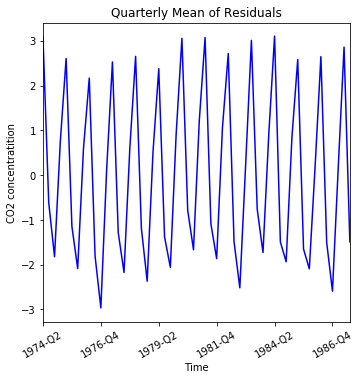

In [29]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('plots/ch1/B07887_01_08.png', format='png', dpi=300)

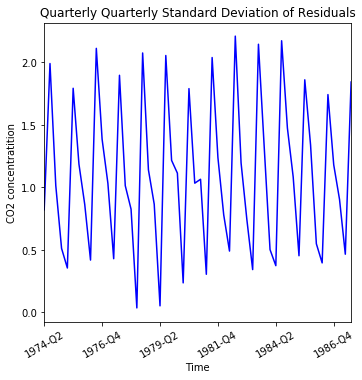

In [30]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('plots/ch1/B07887_01_09.png', format='png', dpi=300)

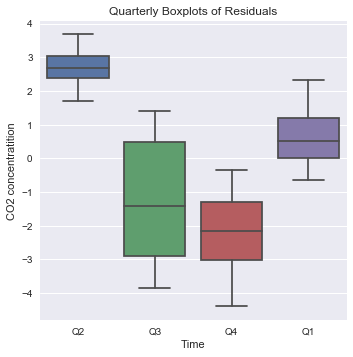

In [33]:
#Multiple box plots to visualize central tendency and dispersion of seasonal sub series
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=data, y='Residuals', x='Quarter')
g.set_title('Quarterly Boxplots of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition')
plt.savefig('plots/ch1/B07887_01_10.png', format='png', dpi=300)

In [23]:
inflation = pd.read_excel('datasets/inflation-consumer-prices-annual.xlsx', parse_dates=['Year'])

In [24]:
inflation.head()

Year      India  United States
0 1960-01-01   1.783265       1.509929
1 1961-01-01   1.752022       1.075182
2 1962-01-01   3.576159       1.116071
3 1963-01-01   2.941176       1.214128
4 1964-01-01  13.354037       1.308615

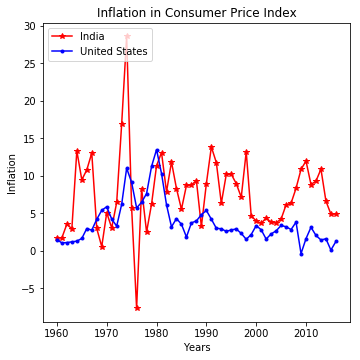

In [25]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*', color='r')
plt.plot(range(1960,2017), inflation['United States'], linestyle='-', marker='.', color='b')
plt.legend(['India','United States'], loc=2)
plt.title('Inflation in Consumer Price Index')
plt.ylabel('Inflation')
plt.xlabel('Years')
plt.savefig('plots/ch1/B07887_01_11.png', format='png', dpi=300)

## Chapter 1: Models for Time Series Analysis

In [1]:
import os
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
os.chdir('D:/Practical Time Series/')

In [3]:
zero_mean_series = np.random.normal(loc=0.0, scale=1., size=100)

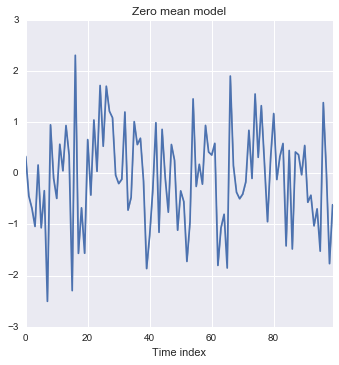

In [4]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(zero_mean_series)
g.set_title('Zero mean model')
g.set_xlabel('Time index')
plt.savefig('plots/ch1/B07887_01_12.png', format='png', dpi=300)

In [5]:
random_walk = np.cumsum(zero_mean_series)

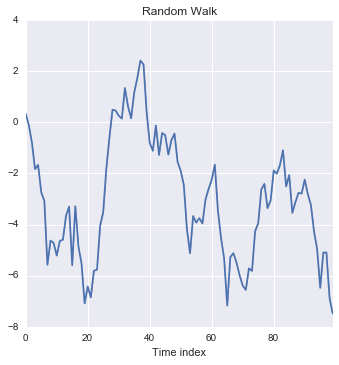

In [6]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index')
plt.savefig('plots/ch1/B07887_01_13.png', format='png', dpi=300)

## Chapter 1: Autocorrelation and Partial Autocorrelation

In [15]:
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [16]:
os.chdir('D:/Practical Time Series')

In [3]:
djia_df = pd.read_excel('datasets/DJIA_Jan2016_Dec2016.xlsx')

In [4]:
#Change the row indices of the dataframe using the Date column
djia_df.index = djia_df['Date']

In [5]:
djia_df.head(10)

Date          Open          High           Low         Close  \
Date                                                                            
2016-01-04 2016-01-04  17405.480469  17405.480469  16957.630859  17148.939453   
2016-01-05 2016-01-05  17147.500000  17195.839844  17038.609375  17158.660156   
2016-01-06 2016-01-06  17154.830078  17154.830078  16817.619141  16906.509766   
2016-01-07 2016-01-07  16888.359375  16888.359375  16463.630859  16514.099609   
2016-01-08 2016-01-08  16519.169922  16651.890625  16314.570313  16346.450195   
2016-01-11 2016-01-11  16358.709961  16461.849609  16232.030273  16398.570313   
2016-01-12 2016-01-12  16419.109375  16591.349609  16322.070313  16516.220703   
2016-01-13 2016-01-13  16526.630859  16593.509766  16123.200195  16151.410156   
2016-01-14 2016-01-14  16159.009766  16482.050781  16075.120117  16379.049805   
2016-01-15 2016-01-15  16354.330078  16354.330078  15842.110352  15988.080078   

               Adj Close     Volume  
Date                                 
2016-01-04  17148.939453  148060000  
2016-01-05  17158.660156  105750000  
2016-01-06  16906.509766  120250000  
2016-01-07  16514.099609  176240000  
2016-01-08  16346.450195  141850000  
2016-01-11  16398.570313  127790000  
2016-01-12  16516.220703  117480000  
2016-01-13  16151.410156  153530000  
2016-01-14  16379.049805  158830000  
2016-01-15  15988.080078  239210000

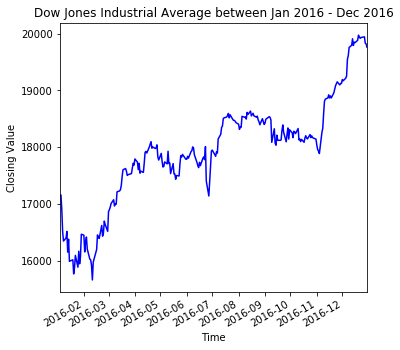

In [10]:
plt.figure(figsize=(5.5, 5.5))
djia_df['Close'].plot(color='b')
plt.title('Dow Jones Industrial Average between Jan 2016 - Dec 2016')
plt.xlabel('Time')
plt.ylabel('Closing Value')
plt.savefig('plots/ch1/B07887_01_14.png', format='png', dpi=300)

In [7]:
lag = range(0,31)
djia_acf = []
for l in lag:
    djia_acf.append(djia_df['Close'].autocorr(l))

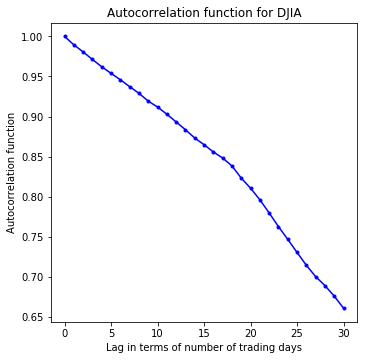

In [9]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(djia_acf, marker='.', color='b')
plt.title('Autocorrelation function for DJIA')
plt.xlabel('Lag in terms of number of trading days')
plt.ylabel('Autocorrelation function')
plt.savefig('plots/ch1/B07887_01_15.png', format='png', dpi=300)

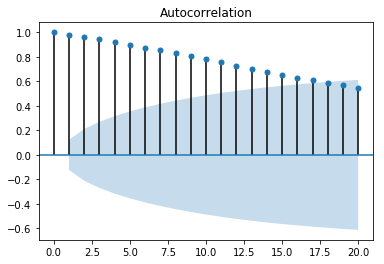

In [22]:
#Plot autocorrelation and confidence intervals using the plot_acf function
plt.figure(figsize=(5.5, 5.5))
plot_acf(djia_df['Close'], lags=20)
plt.savefig('plots/ch1/B07887_01_16.png', format='png', dpi=300)

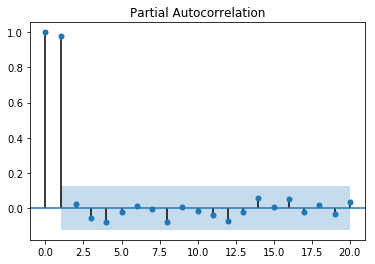

In [19]:
#Plot partial autocorrelation and confidence intervals using the plot_acf function
plt.figure(figsize=(5.5, 5.5))
plot_pacf(djia_df['Close'], lags=20)
plt.savefig('plots/ch1/B07887_01_17.png', format='png', dpi=300)

# Chapter 2: Understanding Time Series Analysis

## Chapter 2: Advanced processing and visualization of time series data

In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#Set current directory and work relative to it
os.chdir('D:/Practical Time Series')

In [3]:
"""
Let us shown an example of resampling to a given frequency
"""

'\nLet us shown an example of resampling to a given frequency\n'

In [26]:
#Read dataset into pandas DataFrame
df = pd.read_csv('datasets/chemical-concentration-readings.csv')

In [27]:
#Let's see the shape of the dataset
print('Shape of the dataset:', df.shape)

Shape of the dataset: (197, 2)


In [28]:
#Let's see first 10 rows of the DataFrame
df.head(10)

Timestamp  Chemical conc.
0  1975-01-01 00:00:00            17.0
1  1975-01-01 02:00:00            16.6
2  1975-01-01 04:00:00            16.3
3  1975-01-01 06:00:00            16.1
4  1975-01-01 08:00:00            17.1
5  1975-01-01 10:00:00            16.9
6  1975-01-01 12:00:00            16.8
7  1975-01-01 14:00:00            17.4
8  1975-01-01 16:00:00            17.1
9  1975-01-01 18:00:00            17.0

In [29]:
#The observations seem to be taken at an interval of 2 hours

In [30]:
#Parse the timestamp to datetime row index of the DataFrame
datetime_rowid = df['Timestamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid
df.head(10)

Timestamp  Chemical conc.
Timestamp                                               
1975-01-01 00:00:00  1975-01-01 00:00:00            17.0
1975-01-01 02:00:00  1975-01-01 02:00:00            16.6
1975-01-01 04:00:00  1975-01-01 04:00:00            16.3
1975-01-01 06:00:00  1975-01-01 06:00:00            16.1
1975-01-01 08:00:00  1975-01-01 08:00:00            17.1
1975-01-01 10:00:00  1975-01-01 10:00:00            16.9
1975-01-01 12:00:00  1975-01-01 12:00:00            16.8
1975-01-01 14:00:00  1975-01-01 14:00:00            17.4
1975-01-01 16:00:00  1975-01-01 16:00:00            17.1
1975-01-01 18:00:00  1975-01-01 18:00:00            17.0

In [38]:
#Resample and compute daily mean
daily = df['Chemical conc.'].resample('D')
daily_mean = daily.mean()

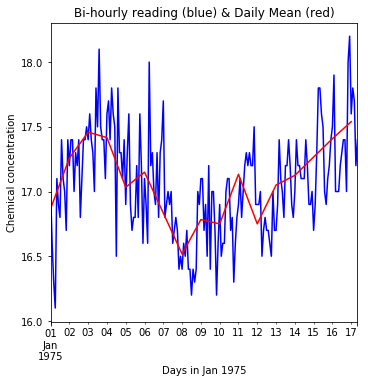

In [39]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

df['Chemical conc.'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')

ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)')
ax.set_xlabel('Days in Jan 1975')
ax.set_ylabel('Chemical concentration')

plt.savefig('plots/ch2/B07887_02_02.png', format='png', dpi=300)

In [11]:
"""
Let us shown an example of grouping by a period
"""

'\nLet us shown an example of grouping by a period\n'

In [12]:
#Load the DataFrame and re-index the row to datetime64
df = pd.read_csv('datasets/mean-daily-temperature-fisher-river.csv')
df.index = df['Date'].map(lambda d: pd.to_datetime(d, format = '%Y-%m-%d'))

In [13]:
#Display shape of the DataFrame
print('Shape of dataframe:', df.shape)

Shape of dataframe: (1461, 2)


In [14]:
#Let's see first 10 rows
df.head(10)

Date  Mean temparature
Date                                    
1988-01-01  1988-01-01            -23.00
1988-01-02  1988-01-02            -20.50
1988-01-03  1988-01-03            -22.00
1988-01-04  1988-01-04            -30.50
1988-01-05  1988-01-05            -31.00
1988-01-06  1988-01-06            -27.50
1988-01-07  1988-01-07            -26.25
1988-01-08  1988-01-08            -26.50
1988-01-09  1988-01-09            -23.00
1988-01-10  1988-01-10            -23.50

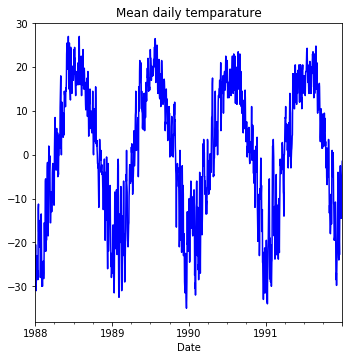

In [15]:
#Plot original time series on daily mean temparature
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

df['Mean temparature'].plot(ax=ax, color='b')

ax.set_title('Mean daily temparature')

plt.savefig('plots/ch2/B07887_02_03.png', format='png', dpi=300)

In [16]:
#We need to groupby the data for every month and find aggregate statistics

#Let's start by adding a Month_Year column
df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))

df.head(10)

Date  Mean temparature Month_Year
Date                                               
1988-01-01  1988-01-01            -23.00    01-1988
1988-01-02  1988-01-02            -20.50    01-1988
1988-01-03  1988-01-03            -22.00    01-1988
1988-01-04  1988-01-04            -30.50    01-1988
1988-01-05  1988-01-05            -31.00    01-1988
1988-01-06  1988-01-06            -27.50    01-1988
1988-01-07  1988-01-07            -26.25    01-1988
1988-01-08  1988-01-08            -26.50    01-1988
1988-01-09  1988-01-09            -23.00    01-1988
1988-01-10  1988-01-10            -23.50    01-1988

In [17]:
#Calculate month wise statistics
monthly_stats = df.groupby(by='Month_Year')['Mean temparature'].aggregate([np.mean, np.median,
                                                                           np.std
                                                                          ])
monthly_stats.reset_index(inplace=True)
monthly_stats.head(10)

Month_Year       mean  median       std
0    01-1988 -22.137097  -23.00  5.260640
1    01-1989 -17.129032  -18.00  8.250725
2    01-1990 -15.112903  -12.00  6.606764
3    01-1991 -23.038710  -24.50  7.095570
4    02-1988 -19.025862  -19.50  8.598522
5    02-1989 -19.267857  -19.25  8.092042
6    02-1990 -17.482143  -16.50  8.018477
7    02-1991 -10.967857  -12.15  8.220753
8    03-1988  -8.258065   -9.25  5.341459
9    03-1989 -12.508065   -9.50  8.289925

In [18]:
#Let's create month and year columns and sort by them to reorder the rows
monthly_stats['Year'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))
monthly_stats['Month'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))
monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.head(10)

Month_Year       mean  median       std  Year Month
0     01-1988 -22.137097 -23.000  5.260640  1988    01
4     02-1988 -19.025862 -19.500  8.598522  1988    02
8     03-1988  -8.258065  -9.250  5.341459  1988    03
12    04-1988   2.641667   1.875  5.057720  1988    04
16    05-1988  11.290323  11.000  6.254364  1988    05
20    06-1988  19.291667  19.000  3.909032  1988    06
24    07-1988  19.048387  18.500  3.073692  1988    07
28    08-1988  17.379032  18.000  3.183205  1988    08
32    09-1988  10.675000  10.750  3.880294  1988    09
36    10-1988   2.467742   3.000  6.697245  1988    10

In [19]:
#Let's set the Month_Year as the row index
monthly_stats.index = monthly_stats['Month_Year']

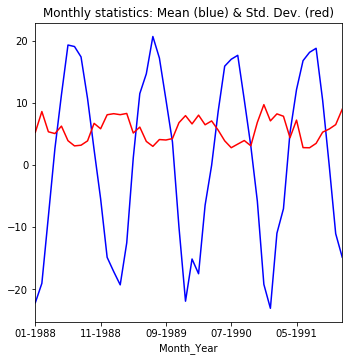

In [20]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

monthly_stats['mean'].plot(ax=ax, color='b')
monthly_stats['std'].plot(ax=ax, color='r')

ax.set_title('Monthly statistics: Mean (blue) & Std. Dev. (red)')

plt.savefig('plots/ch2/B07887_02_04.png', format='png', dpi=300)

In [21]:
#Now we will calculate weekly moving average on the original time series of mean daily temparature
weekly_moving_average = df['Mean temparature'].rolling(7).mean()

In [22]:
#Now we will calculate monthly moving average on the original time series of mean daily temparature
monthly_moving_average = df['Mean temparature'].rolling(30).mean()

In [23]:
#Let's caluclate the weekly and monthly avergaes with a stride of length 2
weekly_moving_average_2stride = df['Mean temparature'].rolling(7).mean()[::2]
monthly_moving_average_2stride = df['Mean temparature'].rolling(30).mean()[::2]

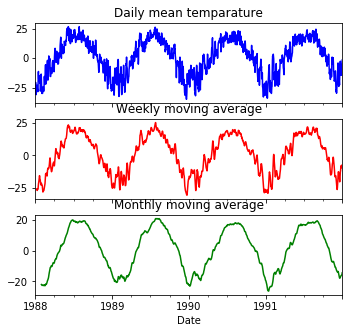

In [24]:
#Plot original time series and weekly moving average
fig, axarr = plt.subplots(3, sharex=True)
fig.set_size_inches(5.5, 5,5)

df['Mean temparature'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Daily mean temparature')

weekly_moving_average.plot(ax=axarr[1], color='r')
axarr[1].set_title('Weekly moving average')

monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average')

plt.savefig('plots/ch2/B07887_02_05.png', format='png', dpi=300)

## Chapter 2: Resampling time series data

In [14]:
import os
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [2]:
#we always start by setting the current directory and then working relative to it
os.chdir('D:/Practical Time Series')

In [3]:
djia_df = pd.read_excel('datasets/DJIA_Jan2016_Dec2016.xlsx')

In [4]:
djia_df.head(10)

Date          Open          High           Low         Close  \
0 2016-01-04  17405.480469  17405.480469  16957.630859  17148.939453   
1 2016-01-05  17147.500000  17195.839844  17038.609375  17158.660156   
2 2016-01-06  17154.830078  17154.830078  16817.619141  16906.509766   
3 2016-01-07  16888.359375  16888.359375  16463.630859  16514.099609   
4 2016-01-08  16519.169922  16651.890625  16314.570313  16346.450195   
5 2016-01-11  16358.709961  16461.849609  16232.030273  16398.570313   
6 2016-01-12  16419.109375  16591.349609  16322.070313  16516.220703   
7 2016-01-13  16526.630859  16593.509766  16123.200195  16151.410156   
8 2016-01-14  16159.009766  16482.050781  16075.120117  16379.049805   
9 2016-01-15  16354.330078  16354.330078  15842.110352  15988.080078   

      Adj Close     Volume  
0  17148.939453  148060000  
1  17158.660156  105750000  
2  16906.509766  120250000  
3  16514.099609  176240000  
4  16346.450195  141850000  
5  16398.570313  127790000  
6  16516.220703  117480000  
7  16151.410156  153530000  
8  16379.049805  158830000  
9  15988.080078  239210000

In [5]:
#Let us parse the Date column and use as row index for the DataFrame and drop it as a column
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)

In [6]:
#Let us see first few rows of the modified DataFrame
djia_df.head(10)

Open          High           Low         Close  \
Date                                                                 
2016-01-04  17405.480469  17405.480469  16957.630859  17148.939453   
2016-01-05  17147.500000  17195.839844  17038.609375  17158.660156   
2016-01-06  17154.830078  17154.830078  16817.619141  16906.509766   
2016-01-07  16888.359375  16888.359375  16463.630859  16514.099609   
2016-01-08  16519.169922  16651.890625  16314.570313  16346.450195   
2016-01-11  16358.709961  16461.849609  16232.030273  16398.570313   
2016-01-12  16419.109375  16591.349609  16322.070313  16516.220703   
2016-01-13  16526.630859  16593.509766  16123.200195  16151.410156   
2016-01-14  16159.009766  16482.050781  16075.120117  16379.049805   
2016-01-15  16354.330078  16354.330078  15842.110352  15988.080078   

               Adj Close     Volume  
Date                                 
2016-01-04  17148.939453  148060000  
2016-01-05  17158.660156  105750000  
2016-01-06  16906.509766  120250000  
2016-01-07  16514.099609  176240000  
2016-01-08  16346.450195  141850000  
2016-01-11  16398.570313  127790000  
2016-01-12  16516.220703  117480000  
2016-01-13  16151.410156  153530000  
2016-01-14  16379.049805  158830000  
2016-01-15  15988.080078  239210000

In [7]:
#We would be using the 'Close' values of the DJIA to illustrate Differencing
first_order_diff = djia_df['Close'].diff(1)

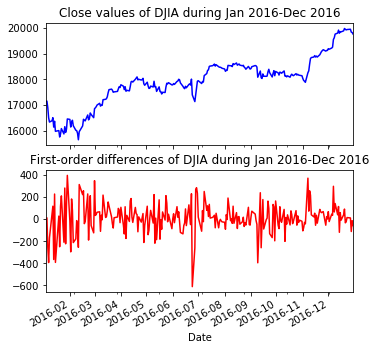

In [8]:
#Let us plot the original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')
#plt.savefig('plots/ch2/B07887_02_06.png', format='png', dpi=300)

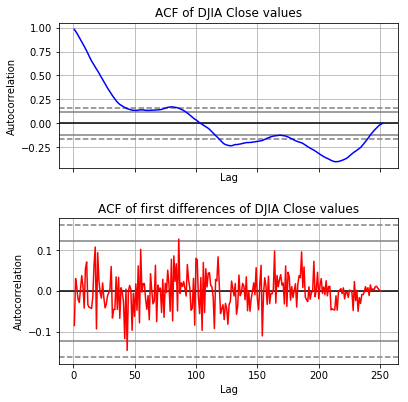

In [18]:
#Let us plot the ACFs of original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(djia_df['Close'], color='b', ax=ax[0])
ax[0].set_title('ACF of DJIA Close values')
autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of DJIA Close values')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.savefig('plots/ch2/B07887_02_07.png', format='png', dpi=300)

In [10]:
"""
Now we will perform the Ljung-Box test on the ACFs
of the original time series and the first-differences.
For running the test we will limit upto 20 lags
"""

'\nNow we will perform the Ljung-Box test on the ACFs\nof the original time series and the first-differences.\nFor running the test we will limit upto 20 lags\n'

In [11]:
"""
Let us obtain the confidence intervls, Ljung-Box Q-statistics and p-values
for the original DJIA Close values
"""
acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(djia_df['Close'],
                                                                 unbiased=True,
                                                                 nlags=20,
                                                                 qstat=True,
                                                                 alpha=0.05)

In [12]:
"""Let us check if at confidence level 95% (alpha=0.05)
if the null hypothesis is rejected at any of the lags
"""
alpha = 0.05
for l, p_val in enumerate(pvalues_djia):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 1.06937677537e-55
Null hypothesis is rejected at lag = 1 for p-val = 9.99432646963e-107
Null hypothesis is rejected at lag = 2 for p-val = 3.51431863547e-156
Null hypothesis is rejected at lag = 3 for p-val = 8.30678314236e-204
Null hypothesis is rejected at lag = 4 for p-val = 1.33852326465e-249
Null hypothesis is rejected at lag = 5 for p-val = 1.19209433653e-293
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0
Null hypothesis is reject

In [13]:
"""
The above results show statistically significant ACF in the original DJIA Close values
"""

'\nThe above results show statistically significant ACF in the original DJIA Close values\n'

In [14]:
"""
Let us obtain the confidence intervls, Ljung-Box Q-statistics and p-values
for the differenced DJIA Close values
"""
acf_first_diff, confint_first_diff,\
qstat_first_diff, pvalues_first_diff = stattools.acf(first_order_diff.iloc[1:],
                                                     unbiased=True,
                                                     nlags=20,
                                                     qstat=True,
                                                     alpha=0.05)

In [15]:
"""Let us check if at confidence level of 95% (alpha = 0.05)
if the null hypothesis is rejected at any of the lags
"""
alpha = 0.05
for l, p_val in enumerate(pvalues_first_diff):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is accepted at lag = 0 for p-val = 0.17569800898
Null hypothesis is accepted at lag = 1 for p-val = 0.353830085301
Null hypothesis is accepted at lag = 2 for p-val = 0.553139564033
Null hypothesis is accepted at lag = 3 for p-val = 0.698512780756
Null hypothesis is accepted at lag = 4 for p-val = 0.789158012067
Null hypothesis is accepted at lag = 5 for p-val = 0.877290328278
Null hypothesis is accepted at lag = 6 for p-val = 0.901277483583
Null hypothesis is accepted at lag = 7 for p-val = 0.942982316238
Null hypothesis is accepted at lag = 8 for p-val = 0.948591655652
Null hypothesis is accepted at lag = 9 for p-val = 0.93779779437
Null hypothesis is accepted at lag = 10 for p-val = 0.893761260743
Null hypothesis is accepted at lag = 11 for p-val = 0.915219093022
Null hypothesis is accepted at lag = 12 for p-val = 0.926324524389
Null hypothesis is accepted at lag = 13 for p-val = 0.9350725554
Null hypothesis is accepted at lag = 14 for p-val = 0.940439468541
Null hypo

In [16]:
"""
The above results show that ACF is essentially random in the differenced DJIA Close values
"""

'\nThe above results show that ACF is essentially random in the differenced DJIA Close values\n'

In [3]:
from __future__ import print_function
import os
import pandas as pd
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
#Start by setting the current directory and henceforth working relative to it
os.chdir('D:/Practical Time Series')

In [5]:
#read the data from into a pandas.DataFrame
air_miles = pd.read_csv('datasets/us-airlines-monthly-aircraft-miles-flown.csv')
air_miles.index = air_miles.Month

In [6]:
#Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', air_miles.shape)

Shape of the DataFrame: (97, 2)


In [7]:
#Let's see first 10 rows of it
air_miles.head(10)

Month  \
Month              
1963-01  1963-01   
1963-02  1963-02   
1963-03  1963-03   
1963-04  1963-04   
1963-05  1963-05   
1963-06  1963-06   
1963-07  1963-07   
1963-08  1963-08   
1963-09  1963-09   
1963-10  1963-10   

         U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970  
Month                                                                       
1963-01                                             6827.0                  
1963-02                                             6178.0                  
1963-03                                             7084.0                  
1963-04                                             8162.0                  
1963-05                                             8462.0                  
1963-06                                             9644.0                  
1963-07                                            10466.0                  
1963-08                                            10748.0                  
1963-09                                             9963.0                  
1963-10                                             8194.0

In [8]:
#Let's rename the 2nd column
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970':\
                          'Air miles flown'
                         },
                inplace=True
                )

In [9]:
#Check for missing values and remove the row
missing = pd.isnull(air_miles['Air miles flown'])
print('Number of missing values found:', missing.sum())
air_miles = air_miles.loc[~missing, :]

Number of missing values found: 1


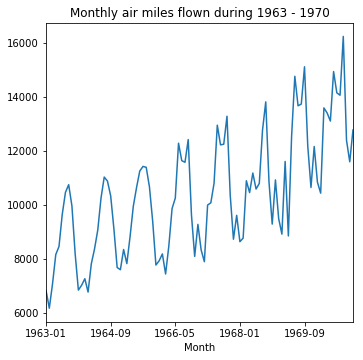

In [10]:
#Plot the time series of air miles flown
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
air_miles['Air miles flown'].plot(ax=ax)
ax.set_title('Monthly air miles flown during 1963 - 1970')
plt.savefig('plots/ch2/B07887_02_13.png', format='png', dpi=300)

In [19]:
adf_result = stattools.adfuller(air_miles['Air miles flown'], autolag='AIC')

In [20]:
print('p-val of the ADF test in air miles flown:', adf_result[1])

p-val of the ADF test in air miles flown: 0.994502281123


## Chapter 2: Ploting Autocorrelation

In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#Set the current working directory
os.chdir('D:/Practical Time Series/')

In [3]:
#Read data from Excel file
daily_temp = pd.read_excel('datasets/mean-daily-temperature-fisher-river.xlsx')

In [4]:
#Display first 20 rows of the DataFrame
daily_temp.head(10)

Date  Mean_Temperature
0 1988-01-01            -23.00
1 1988-01-02            -20.50
2 1988-01-03            -22.00
3 1988-01-04            -30.50
4 1988-01-05            -31.00
5 1988-01-06            -27.50
6 1988-01-07            -26.25
7 1988-01-08            -26.50
8 1988-01-09            -23.00
9 1988-01-10            -23.50

In [5]:
#Make formatted date as the row index of the dataset and drop the Date column
daily_temp.index = daily_temp['Date'].map(lambda date: pd.to_datetime(date, '%Y-%m-%d'))
daily_temp.drop('Date', axis=1, inplace=True)

In [6]:
#Re-display the first 10 rows of the modified DataFrame
daily_temp.head(10)

Mean_Temperature
Date                        
1988-01-01            -23.00
1988-01-02            -20.50
1988-01-03            -22.00
1988-01-04            -30.50
1988-01-05            -31.00
1988-01-06            -27.50
1988-01-07            -26.25
1988-01-08            -26.50
1988-01-09            -23.00
1988-01-10            -23.50

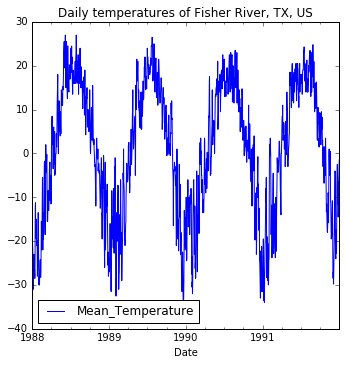

In [7]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Daily temperatures of Fisher River, TX, US')
daily_temp.plot(ax=ax)
plt.savefig('plots/ch2/B07887_02_08.png', format='png', dpi=300)

In [8]:
#Calculate monthly mean temperature
montly_resample = daily_temp['Mean_Temperature'].resample('M')
monthly_mean_temp = montly_resample.mean()
print('Shape of monthly mean temperature dataset:', monthly_mean_temp.shape)
monthly_mean_temp.head(10)

Shape of monthly mean temperature dataset: (48,)


Date
1988-01-31   -22.137097
1988-02-29   -19.025862
1988-03-31    -8.258065
1988-04-30     2.641667
1988-05-31    11.290323
1988-06-30    19.291667
1988-07-31    19.048387
1988-08-31    17.379032
1988-09-30    10.675000
1988-10-31     2.467742
Freq: M, Name: Mean_Temperature, dtype: float64

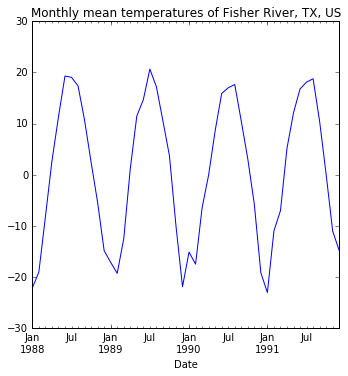

In [9]:
#Plot the monthly mean temparature
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Monthly mean temperatures of Fisher River, TX, US')
monthly_mean_temp.plot(ax=ax)
plt.savefig('plots/ch2/B07887_02_09.png', format='png', dpi=300)

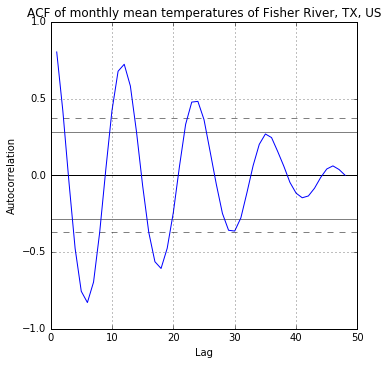

In [10]:
#Plot ACF of the monthly mean temparature using pandas.tools.plotting.autocorrelation_plot
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of monthly mean temperatures of Fisher River, TX, US')
autocorrelation_plot(monthly_mean_temp, ax=ax)
plt.savefig('plots/ch2/B07887_02_10.png', format='png', dpi=300)

In [11]:
#Take seasonal differences with a period of 12 months on monthly mean temperatures
seasonal_diff = monthly_mean_temp.diff(12)
seasonal_diff = seasonal_diff[12:]

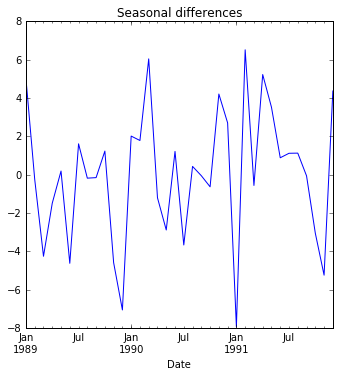

In [12]:
#Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Seasonal differences')
seasonal_diff.plot(ax=ax)
plt.savefig('plots/ch2/B07887_02_11.png', format='png', dpi=300)

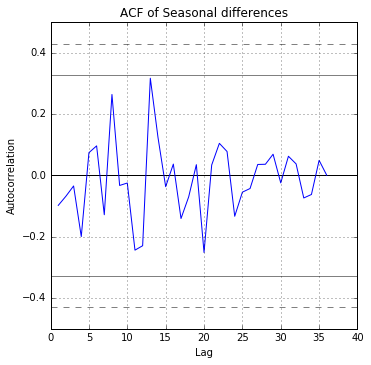

In [13]:
#Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of Seasonal differences')
autocorrelation_plot(seasonal_diff, ax=ax)
plt.savefig('plots/ch2/B07887_02_12.png', format='png', dpi=300)

In [14]:
#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10
_, _, _, pval_monthly_mean = stattools.acf(monthly_mean_temp, unbiased=True,
                                           nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)


In [15]:
#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10
_, _, _, pval_seasonal_diff = stattools.acf(seasonal_diff, unbiased=True,
                                            nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

Null hypothesis is rejected for lags: (array([], dtype=int32),)


## Chapter 2: Seasonal Differencing

In [31]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

In [32]:
#Set the current working directory
os.chdir('D:/Practical Time Series/')

In [33]:
#Read data from Excel file
daily_temp = pd.read_excel('datasets/mean-daily-temperature-fisher-river.xlsx')

In [34]:
#Display first 20 rows of the DataFrame
daily_temp.head(10)

Date  Mean_Temperature
0 1988-01-01            -23.00
1 1988-01-02            -20.50
2 1988-01-03            -22.00
3 1988-01-04            -30.50
4 1988-01-05            -31.00
5 1988-01-06            -27.50
6 1988-01-07            -26.25
7 1988-01-08            -26.50
8 1988-01-09            -23.00
9 1988-01-10            -23.50

In [35]:
#Make formatted date as the row index of the dataset and drop the Date column
daily_temp.index = daily_temp['Date'].map(lambda date: pd.to_datetime(date, '%Y-%m-%d'))
daily_temp.drop('Date', axis=1, inplace=True)

In [36]:
#Re-display the first 10 rows of the modified DataFrame
daily_temp.head(10)

Mean_Temperature
Date                        
1988-01-01            -23.00
1988-01-02            -20.50
1988-01-03            -22.00
1988-01-04            -30.50
1988-01-05            -31.00
1988-01-06            -27.50
1988-01-07            -26.25
1988-01-08            -26.50
1988-01-09            -23.00
1988-01-10            -23.50

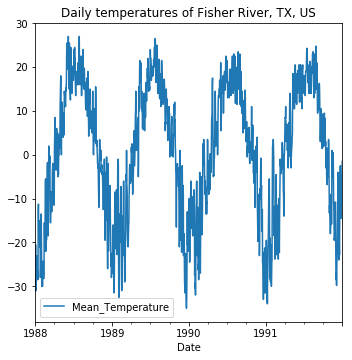

In [37]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Daily temperatures of Fisher River, TX, US')
daily_temp.plot(ax=ax)
plt.savefig('plots/ch2/B07887_02_08.png', format='png', dpi=300)

In [38]:
#Calculate monthly mean temperature
montly_resample = daily_temp['Mean_Temperature'].resample('M')
monthly_mean_temp = montly_resample.mean()
print('Shape of monthly mean temperature dataset:', monthly_mean_temp.shape)
monthly_mean_temp.head(10)

Shape of monthly mean temperature dataset: (48,)


Date
1988-01-31   -22.137097
1988-02-29   -19.025862
1988-03-31    -8.258065
1988-04-30     2.641667
1988-05-31    11.290323
1988-06-30    19.291667
1988-07-31    19.048387
1988-08-31    17.379032
1988-09-30    10.675000
1988-10-31     2.467742
Freq: M, Name: Mean_Temperature, dtype: float64

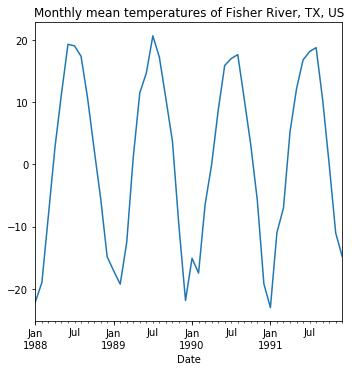

In [39]:
#Plot the monthly mean temparature
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Monthly mean temperatures of Fisher River, TX, US')
monthly_mean_temp.plot(ax=ax)
plt.savefig('plots/ch2/B07887_02_09.png', format='png', dpi=300)

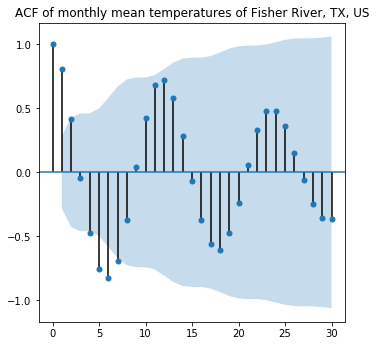

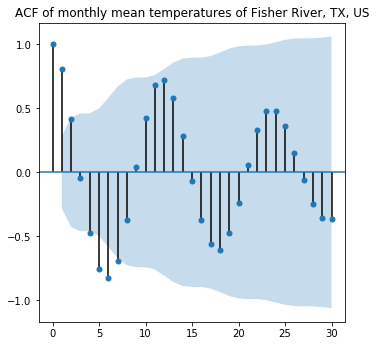

In [40]:
#Plot ACF of the monthly mean temparature using pandas.tools.plotting.autocorrelation_plot
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of monthly mean temperatures of Fisher River, TX, US')
#autocorrelation_plot(monthly_mean_temp, ax=ax)
plot_acf(monthly_mean_temp,lags=30,
         title='ACF of monthly mean temperatures of Fisher River, TX, US',
         ax=ax
        )
#plt.savefig('plots/ch2/B07887_02_10.png', format='png', dpi=300)

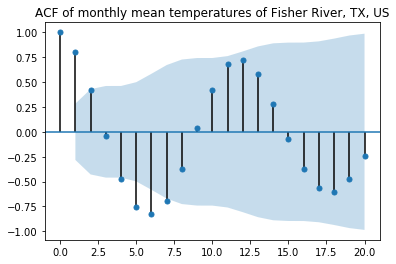

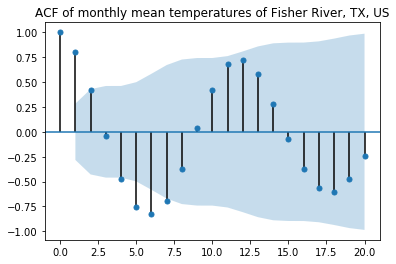

In [25]:
plot_acf(monthly_mean_temp,lags=20, title='ACF of monthly mean temperatures of Fisher River, TX, US')

(array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
         -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
          6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
         19,  20]),
 array([-0.24461246, -0.47536716, -0.60369003, -0.55747598, -0.36492553,
        -0.06054339,  0.28827097,  0.58481628,  0.72311458,  0.67511451,
         0.41732813,  0.03541151, -0.37288728, -0.69382203, -0.82407157,
        -0.74793269, -0.46766027, -0.03692674,  0.42650131,  0.80754769,
         1.        ,  0.80754769,  0.42650131, -0.03692674, -0.46766027,
        -0.74793269, -0.82407157, -0.69382203, -0.37288728,  0.03541151,
         0.41732813,  0.67511451,  0.72311458,  0.58481628,  0.28827097,
        -0.06054339, -0.36492553, -0.55747598, -0.60369003, -0.47536716,
        -0.24461246]),
 <matplotlib.lines.Line2D at 0x13721305048>)

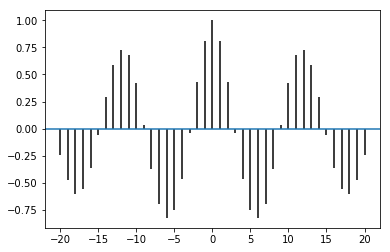

In [41]:
plt.acorr(monthly_mean_temp, maxlags=20)

In [15]:
#Take seasonal differences with a period of 12 months on monthly mean temperatures
seasonal_diff = monthly_mean_temp.diff(12)
seasonal_diff = seasonal_diff[12:]

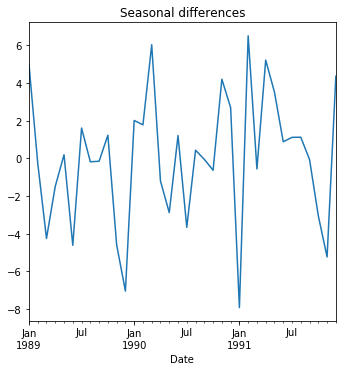

In [16]:
#Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Seasonal differences')
seasonal_diff.plot(ax=ax)
plt.savefig('plots/ch2/B07887_02_11.png', format='png', dpi=300)

C:\Users\avpal\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


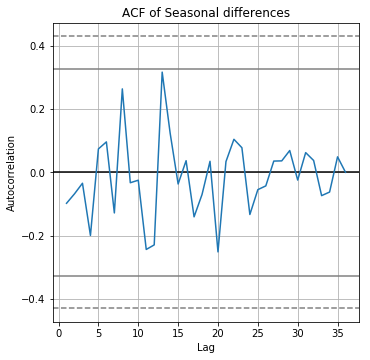

In [17]:
#Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of Seasonal differences')
autocorrelation_plot(seasonal_diff, ax=ax, )
plt.savefig('plots/ch2/B07887_02_12.png', format='png', dpi=300)

In [18]:
#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10
_, _, _, pval_monthly_mean = stattools.acf(monthly_mean_temp, unbiased=True,
                                           nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)


In [19]:
#Perform Ljung-Box test on monthly mean temperature to get the p-values
#We will use lags of upto 10
_, _, _, pval_seasonal_diff = stattools.acf(seasonal_diff, unbiased=True,
                                            nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

Null hypothesis is rejected for lags: (array([], dtype=int64),)


In [29]:
acf , confint, qstat , pval_monthly_mean = stattools.acf(monthly_mean_temp, unbiased=True,
                                           nlags=10, qstat=True, alpha=0.05)

In [30]:
confint

array([[ 1.        ,  1.        ],
       [ 0.53831958,  1.10411245],
       [ 0.00433172,  0.87145271],
       [-0.51639077,  0.41884459],
       [-0.98802073, -0.05197149],
       [-1.35543488, -0.33107784],
       [-1.56063897, -0.3340289 ],
       [-1.53531912, -0.09339225],
       [-1.23703902,  0.3452841 ],
       [-0.76301287,  0.85903247],
       [-0.27877287,  1.3437273 ]])

In [1]:
from __future__ import print_function
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#Set current dir and work relative to it
os.chdir('D:/Practical Time Series')

In [5]:
#Read dataset into a pandas.DataFrame
beer_df = pd.read_csv('datasets/quarterly-beer-production-in-aus-March 1956-June 1994.csv')
beer_df.index = beer_df['Quarter']

In [6]:
#Display shape of the dataset
print('Shape of the dataframe:', beer_df.shape)

Shape of the dataframe: (155, 2)


In [7]:
#Show top 10 rows
beer_df.head(10)

Quarter  \
Quarter           
1956Q1   1956Q1   
1956Q2   1956Q2   
1956Q3   1956Q3   
1956Q4   1956Q4   
1957Q1   1957Q1   
1957Q2   1957Q2   
1957Q3   1957Q3   
1957Q4   1957Q4   
1958Q1   1958Q1   
1958Q2   1958Q2   

         Quarterly beer production in Australia: megalitres. March 1956 ? June 1994  
Quarter                                                                              
1956Q1                                               284.4                           
1956Q2                                               212.8                           
1956Q3                                               226.9                           
1956Q4                                               308.4                           
1957Q1                                               262.0                           
1957Q2                                               227.9                           
1957Q3                                               236.1                           
1957Q4                                               320.4                           
1958Q1                                               271.9                           
1958Q2                                               232.8

In [8]:
#Rename the 2nd column
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994':
                        'Beer_Prod'
                       },
               inplace=True
              )

In [9]:
#Remove missing values
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Number of rows with at least one missing values:', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)

Number of rows with at least one missing values: 1
Shape after removing missing values: (154, 2)


In [10]:
#In order to remove seasonal patterns let us calculate 2X4 quarter moving average
MA4 = beer_df['Beer_Prod'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()
TwoXMA4 = TwoXMA4.loc[~pd.isnull(TwoXMA4)]

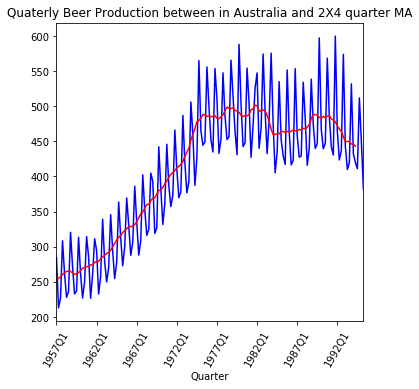

In [14]:
#Let's plot the original time series and the seasonal moving averages
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
beer_df['Beer_Prod'].plot(ax=ax, color='b', linestyle='-')
TwoXMA4.plot(ax=ax, color='r', linestyle='-')
plt.xticks(rotation=60)
ax.set_title('Quaterly Beer Production between in Australia and 2X4 quarter MA')
plt.savefig('plots/ch2/B07887_02_16.png', format='png', dpi=300)

In [15]:
#Let's compute the residuals after removing the trend
residuals = beer_df['Beer_Prod']-TwoXMA4
residuals = residuals.loc[~pd.isnull(residuals)]

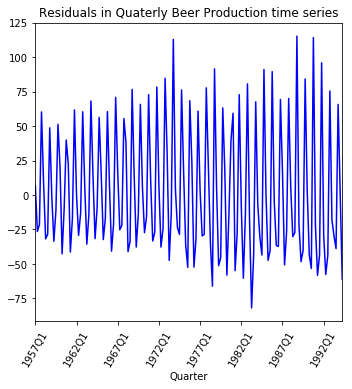

In [17]:
#Let's plot the residuals
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
residuals.plot(ax=ax, color='b', linestyle='-')
plt.xticks(rotation=60)
ax.set_title('Residuals in Quaterly Beer Production time series')
plt.savefig('plots/ch2/B07887_02_17.png', format='png', dpi=300)

In [12]:
from pandas.plotting import autocorrelation_plot

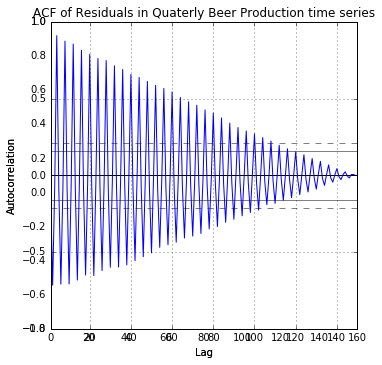

In [13]:
#Let's plot the autocorrelation function of the residuals
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals, ax=ax)
ax.set_title('ACF of Residuals in Quaterly Beer Production time series')
plt.savefig('plots/ch2/B07887_02_18.png', format='png', dpi=300)
autocorrelation_plot(residuals)

In [14]:
#Let's compute quarterly differecing to remove quaterly seasonality
residuals_qtr_diff = residuals.diff(4)

In [15]:
#Remove null values
residuals_qtr_diff = residuals_qtr_diff.loc[~pd.isnull(residuals_qtr_diff)]

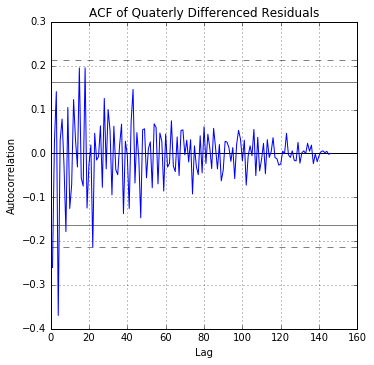

In [16]:
#Let's plot the autocorrelation function of the residuals
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals_qtr_diff, ax=ax)
ax.set_title('ACF of Quaterly Differenced Residuals')
plt.savefig('plots/ch2/B07887_02_19.png', format='png', dpi=300)

In [1]:
from __future__ import print_function
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#Set current directory and work relative to it
os.chdir('D:/Practical Time Series/')

In [14]:
#Load the dataset into a pandas.DataFrame
ibm_df = pd.read_csv('datasets/ibm-common-stock-closing-prices.csv')
ibm_df.index = ibm_df['Date']

In [15]:
#Let's find out the shape of the DataFrame
print('Shape of the dataframe:', ibm_df.shape)

Shape of the dataframe: (1009, 2)


In [16]:
#Let's see the top 10 rows
ibm_df.head(10)

Date  IBM common stock closing prices
Date                                                   
1962-01-02  1962-01-02                           572.00
1962-01-03  1962-01-03                           577.00
1962-01-04  1962-01-04                           571.25
1962-01-05  1962-01-05                           560.00
1962-01-08  1962-01-08                           549.50
1962-01-09  1962-01-09                           556.00
1962-01-10  1962-01-10                           557.00
1962-01-11  1962-01-11                           563.00
1962-01-12  1962-01-12                           564.00
1962-01-15  1962-01-15                           566.50

In [17]:
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},
              inplace=True)
ibm_df.head()

Date  Close_Price
Date                               
1962-01-02  1962-01-02       572.00
1962-01-03  1962-01-03       577.00
1962-01-04  1962-01-04       571.25
1962-01-05  1962-01-05       560.00
1962-01-08  1962-01-08       549.50

In [18]:
#remove missing values
missing = (pd.isnull(ibm_df['Date'])) & (pd.isnull(ibm_df['Close_Price']))
print('No. of rows with missing values:', missing.sum())
ibm_df = ibm_df.loc[~missing, :]

No. of rows with missing values: 0


In [19]:
#To illustrate the idea of moving average we compute a weekly moving average taking
#a window of 5 days instead of 7 days because trading happens only during the weekdays.
ibm_df['5-Day Moving Avg'] = ibm_df['Close_Price'].rolling(5).mean()

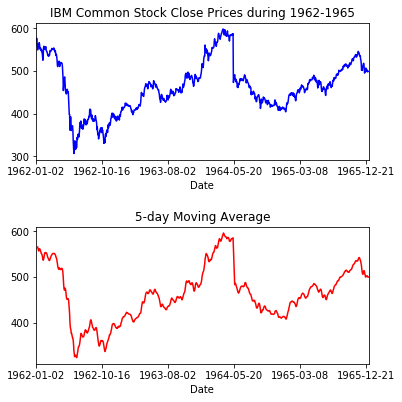

In [22]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax, color='b')
ax.set_title('IBM Common Stock Close Prices during 1962-1965')
ax = fig.add_subplot(2,1,2)
ibm_df['5-Day Moving Avg'].plot(ax=ax, color='r')
ax.set_title('5-day Moving Average')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.savefig('plots/ch2/B07887_02_14.png', format='png', dpi=300)

In [10]:
#Calculate the moving averages using 'rolling' and 'mean' functions
MA2 = ibm_df['Close_Price'].rolling(window=2).mean()
TwoXMA2 = MA2.rolling(window=2).mean()

MA4 = ibm_df['Close_Price'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()

MA3 = ibm_df['Close_Price'].rolling(window=3).mean()
ThreeXMA3 = MA3.rolling(window=3).mean()

In [11]:
#Let's remove NaN from the above variables
MA2 = MA2.ix[~pd.isnull(MA2)]
TwoXMA2 = TwoXMA2.ix[~pd.isnull(TwoXMA2)]

MA4 = MA4.ix[~pd.isnull(MA4)]
TwoXMA4 = TwoXMA4.ix[~pd.isnull(TwoXMA4)]

MA3 = MA3.ix[~pd.isnull(MA3)]
ThreeXMA3 = TwoXMA4.ix[~pd.isnull(ThreeXMA3)]

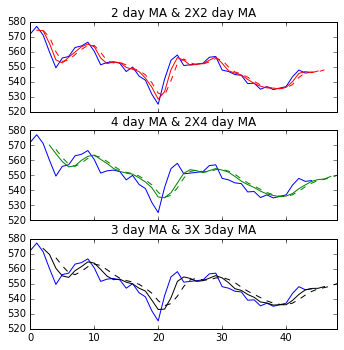

In [12]:
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 5.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
MA2.iloc[:45].plot(color='r', linestyle = '-', ax=axarr[0])
TwoXMA2.iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('2 day MA & 2X2 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
MA4.iloc[:45].plot(color='g', linestyle = '-', ax=axarr[1])
TwoXMA4.iloc[:45].plot(color='g', linestyle = '--', ax=axarr[1])
axarr[1].set_title('4 day MA & 2X4 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
MA3.iloc[:45].plot(color='k', linestyle = '-', ax=axarr[2])
ThreeXMA3.iloc[:45].plot(color='k', linestyle = '--', ax=axarr[2])
axarr[2].set_title('3 day MA & 3X 3day MA')
plt.savefig('plots/ch2/B07887_02_15.png', format='png', dpi=300)

## Chapter 2: Time Series Decomposition

In [2]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
#Start by setting the current directory and henceforth working relative to it
os.chdir('D:/Practical Time Series')

In [4]:
"""
This notebook illustrates time series decomposition by moving averages.
Both additive and multiplicative models are demonstrated.
"""

'\nThis notebook illustrates time series decomposition by moving averages.\nBoth additive and multiplicative models are demonstrated.\n'

In [5]:
"""
Let us demonstrate the addtive model using US Airlines monthly miles flown dataset.
"""

'\nLet us demonstrate the addtive model using US Airlines monthly miles flown dataset.\n'

In [14]:
#read the data from into a pandas.DataFrame
air_miles = pd.read_csv('datasets/us-airlines-monthly-aircraft-miles-flown.csv')
air_miles.index = air_miles['Month']

In [15]:
#Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', air_miles.shape)

Shape of the DataFrame: (97, 2)


In [16]:
#Let's see first 10 rows of it
air_miles.head(10)

Month  \
Month              
1963-01  1963-01   
1963-02  1963-02   
1963-03  1963-03   
1963-04  1963-04   
1963-05  1963-05   
1963-06  1963-06   
1963-07  1963-07   
1963-08  1963-08   
1963-09  1963-09   
1963-10  1963-10   

         U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970  
Month                                                                       
1963-01                                             6827.0                  
1963-02                                             6178.0                  
1963-03                                             7084.0                  
1963-04                                             8162.0                  
1963-05                                             8462.0                  
1963-06                                             9644.0                  
1963-07                                            10466.0                  
1963-08                                            10748.0                  
1963-09                                             9963.0                  
1963-10                                             8194.0

In [17]:
#Let's rename the 2nd column
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970':\
                          'Air miles flown'
                         },
                inplace=True
                )

In [18]:
#Check for missing values and remove the row
missing = pd.isnull(air_miles['Air miles flown'])
print('Number of missing values found:', missing.sum())
air_miles = air_miles.loc[~missing, :]

Number of missing values found: 1


In [19]:
#Let us estimate the trend component by 2X12 monthly moving average
MA12 = air_miles['Air miles flown'].rolling(window=12).mean()
trendComp = MA12.rolling(window=2).mean()

In [20]:
#Let us now compute the residuals after removing the trend component
residuals = air_miles['Air miles flown'] - trendComp

#To find the sesonal compute we have to take monthwise average of these residuals
month = air_miles['Month'].map(lambda d: d[-2:])
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])
#Number of years for which we have the data
nb_years = 1970-1963+1

seasonalComp = np.array([monthwise_avg.as_matrix()]*nb_years).reshape((12*nb_years,))

In [21]:
#After deducting the trend and seasonal component we are left with irregular variations
irr_var = air_miles['Air miles flown'] - trendComp - seasonalComp

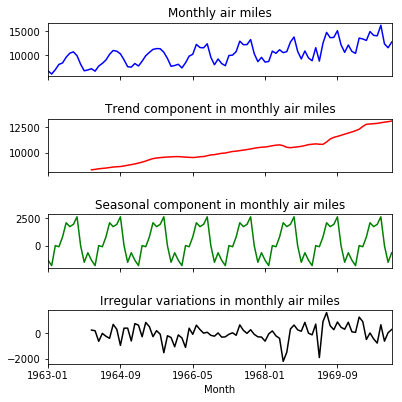

In [27]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

air_miles['Air miles flown'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly air miles')

pd.Series(data=trendComp, index=air_miles.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly air miles')

pd.Series(data=seasonalComp, index=air_miles.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly air miles')

pd.Series(data=irr_var, index=air_miles.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly air miles')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

plt.savefig('plots/ch2/B07887_02_20.png', format='png', dpi=300)

In [29]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')

In [30]:
print('p-val of the ADF test on irregular variations in air miles flown:', adf_result[1])

p-val of the ADF test on irregular variations in air miles flown: 0.0657741102573


In [31]:
"""
The additive decompostion has been able to reduce the p-value
from 0.99 in case of the original time series
(as shown in Chapter_2_Augmented_Dickey_Fuller_Test.ipynb)
to 0.066 after decomposing.
"""

'\nThe additive decompostion has been able to reduce the p-value\nfrom 0.99 in case of the original time series\n(as shown in Chapter_2_Augmented_Dickey_Fuller_Test.ipynb)\nto 0.066 after decomposing.\n'

In [32]:
"""
Now we will attempt decomposition of the original time
using a multiplicative model
"""

'\nNow we will attempt decomposition of the original time\nusing a multiplicative model\n'

In [33]:
"""
Computation of the trend-cycle component remain same. But the seasonal component
is estimated as follows
"""

'\nComputation of the trend-cycle component remain same. But the seasonal component\nis estimated as follows\n'

In [34]:
#We start with the residuals left after removing the trend component
residuals = air_miles['Air miles flown'] / trendComp

#To find the sesonal compute we have to take monthwise average of these residuals
month = air_miles['Month'].map(lambda d: d[-2:])
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])
#Number of years for which we have the data
nb_years = 1970-1963+1

seasonalComp = np.array([monthwise_avg.as_matrix()]*nb_years).reshape((12*nb_years,))

In [35]:
#After adjusting the trend and seasonal component we are left with irregular variations
irr_var = air_miles['Air miles flown'] / (trendComp * seasonalComp)

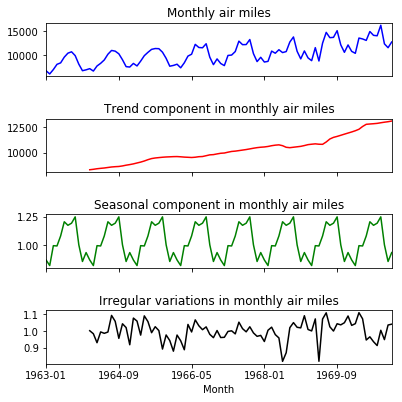

In [36]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

air_miles['Air miles flown'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly air miles')

pd.Series(data=trendComp, index=air_miles.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly air miles')

pd.Series(data=seasonalComp, index=air_miles.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly air miles')

pd.Series(data=irr_var, index=air_miles.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly air miles')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

plt.savefig('plots/ch2/B07887_02_21.png', format='png', dpi=300)

In [38]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')

In [39]:
print('p-val of the ADF test on irregular variations in air miles flown:', adf_result[1])

p-val of the ADF test on irregular variations in air miles flown: 0.000176452809084


In [40]:
"""
Voila! The p-val has further reduced to 0.000176.
The null hypothesis about non-stationarity of the irregular variations
can be rejected at even a level of confidence of 99 % (alpha=0.01).
This shows that the original time series has been de-stationarized to
the stationary irregular variations. Besides we have estimates of both trend-cycle
and seasonal components.
"""

'\nVoila! The p-val has further reduced to 0.000176.\nThe null hypothesis about non-stationarity of the irregular variations\ncan be rejected at even a level of confidence of 99 % (alpha=0.01).\nThis shows that the original time series has been de-stationarized to\nthe stationary irregular variations. Besides we have estimates of both trend-cycle\nand seasonal components.\n'

In [2]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
#Start by setting the current directory and henceforth working relative to it
os.chdir('D:/Practical Time Series')

In [5]:
"""
This notebook illustrates time series decomposition by the statsmodels package.
Both additive and multiplicative models are demonstrated.
"""

'\nThis notebook illustrates time series decomposition by the statsmodels package.\nBoth additive and multiplicative models are demonstrated.\n'

In [6]:
"""
Let us demonstrate the addtive model using Wisconsin Employment
Jan. 1961 – OCt. 1975 dataset.
"""

'\nLet us demonstrate the addtive model using Wisconsin Employment\nJan. 1961 – OCt. 1975 dataset.\n'

In [12]:
#read the data from into a pandas.DataFrame
wisc_emp = pd.read_csv('datasets/wisconsin-employment-time-series.csv')
wisc_emp.index = wisc_emp['Month']

In [13]:
#Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', wisc_emp.shape)

Shape of the DataFrame: (178, 2)


In [14]:
#Let's see first 10 rows of it
wisc_emp.head(10)

Month  Employment
Month                       
1961-01  1961-01       239.6
1961-02  1961-02       236.4
1961-03  1961-03       236.8
1961-04  1961-04       241.5
1961-05  1961-05       243.7
1961-06  1961-06       246.1
1961-07  1961-07       244.1
1961-08  1961-08       244.2
1961-09  1961-09       244.8
1961-10  1961-10       246.6

In [15]:
#Check for missing values and remove the row
missing = (pd.isnull(wisc_emp['Employment'])) | (pd.isnull(wisc_emp['Month']))
print('Number of missing values found:', missing.sum())
wisc_emp = wisc_emp.loc[~missing, :]

Number of missing values found: 0


In [16]:
#Run ADF test on the original time series
adf_result = stattools.adfuller(wisc_emp['Employment'], autolag='AIC')

In [17]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.981000018954


In [18]:
decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), freq=12,
                                              model='additive')

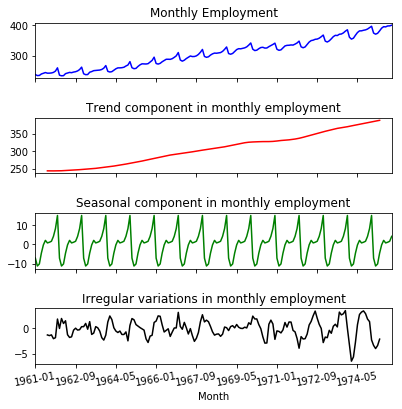

In [29]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

pd.Series(data=decompose_model.trend, index=wisc_emp.index).plot(color='r', linestyle='-', ax=axarr[1])
axarr[1].set_title('Trend component in monthly employment')

pd.Series(data=decompose_model.seasonal, index=wisc_emp.index).plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Seasonal component in monthly employment')

pd.Series(data=decompose_model.resid, index=wisc_emp.index).plot(color='k', linestyle='-', ax=axarr[3])
axarr[3].set_title('Irregular variations in monthly employment')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.xticks(rotation=10)

plt.savefig('plots/ch2/B07887_02_22.png', format='png', dpi=300)

In [13]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]],
                                autolag='AIC')

In [14]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.00656093163464


In [15]:
"""
The additive decompostion has been able to reduce the p-value
from 0.98 in case of the original time series
to 0.066 after decomposing.
"""

'\nThe additive decompostion has been able to reduce the p-value\nfrom 0.98 in case of the original time series\nto 0.066 after decomposing.\n'

In [16]:
"""
Now we will attempt decomposition of the original time
using a multiplicative model
"""

'\nNow we will attempt decomposition of the original time\nusing a multiplicative model\n'

In [17]:
decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), freq=12,
                                              model='multiplicative')

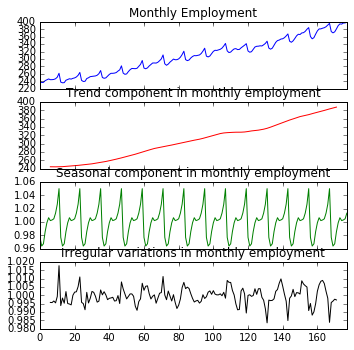

In [18]:
#Plot the original time series, trend, seasonal and random components
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

axarr[1].plot(decompose_model.trend, color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly employment')

axarr[2].plot(decompose_model.seasonal, color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly employment')

axarr[3].plot(decompose_model.resid, color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly employment')

plt.savefig('plots/ch2/B07887_02_23.png', format='png', dpi=300)

In [19]:
#Run ADF test on the irregular variations
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]],
                                autolag='AIC')

In [20]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.00123478372677


In [21]:
"""
Voila! The p-val has further reduced 0.00123.
The null hypothesis about non-stationarity of the irregular variations
can be rejected at even a level of confidence of 99 % (alpha=0.01).
This shows that the original time series has been de-stationarized to
the stationary irregular variations. Besides we have estimates of both trend-cycle
and seasonal components.
"""

'\nVoila! The p-val has further reduced 0.00123.\nThe null hypothesis about non-stationarity of the irregular variations\ncan be rejected at even a level of confidence of 99 % (alpha=0.01).\nThis shows that the original time series has been de-stationarized to\nthe stationary irregular variations. Besides we have estimates of both trend-cycle\nand seasonal components.\n'

# Chapter 3: Exponential Smoothing Based Methods

## Chapter 3: Introduction to Time Series Smoothing and Decomposition

In [7]:
# Load modules
import requests
import statsmodels.api as sm
import io
import pandas as pd

In [8]:
# Load Dataset
DATA_URL="http://robjhyndman.com/tsdldata/data/nybirths.dat"
fopen = requests.get(DATA_URL).content
ds=pd.read_csv(io.StringIO(fopen.decode('utf-8')),  header=None, names=['birthcount'])
print(ds.head())

   birthcount
0      26.663
1      23.598
2      26.931
3      24.740
4      25.806


In [9]:
# Add time index
date=pd.date_range("1946-01-01", "1959-12-31", freq="1M")
ds['Date']=pd.DataFrame(date)
ds = ds.set_index('Date')

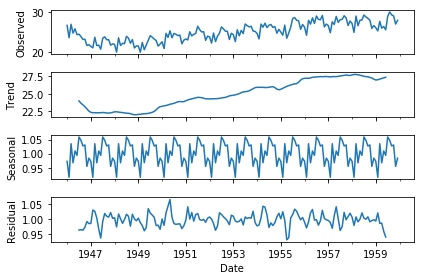

In [11]:
# decompose dataset
res = sm.tsa.seasonal_decompose(ds.birthcount, model="multiplicative")
resplot = res.plot()

## Chapter 3: First Order Exponential Smoothing

In [13]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [16]:
# Load Dataset
ibm_df = pd.read_csv('ibm-common-stock-closing-prices.csv')
ibm_df.head()

#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},
              inplace=True)
ibm_df.head()

# Function for Sigle exponential smoothing
def single_exp_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F

ibm_df['SES'] = single_exp_smoothing(ibm_df['Close_Price'], 0.8)

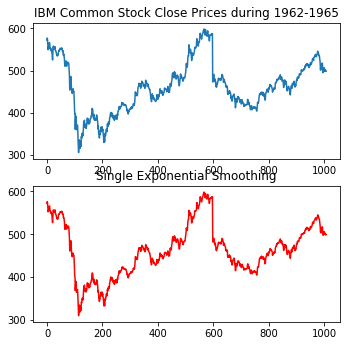

In [18]:
### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax)
ax.set_title('IBM Common Stock Close Prices during 1962-1965')
ax = fig.add_subplot(2,1,2)
ibm_df['SES'].plot(ax=ax, color='r')
ax.set_title('Single Exponential Smoothing')
plt.savefig('B07887_02_14.png', format='png', dpi=300)

In [26]:
# Plot the forecasted values using multiple alpha values
#Calculate the moving averages using 'rolling' and 'mean' functions
ibm_df['SES2']  = single_exp_smoothing(ibm_df['Close_Price'], 0.2);
ibm_df['SES6']= single_exp_smoothing(ibm_df['Close_Price'], 0.6);
ibm_df['SES8']= single_exp_smoothing(ibm_df['Close_Price'], 0.8);

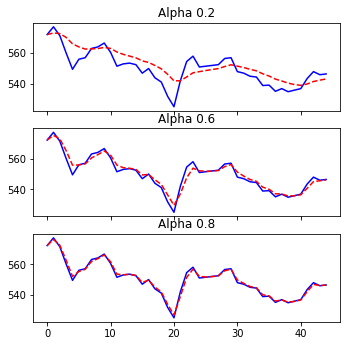

In [30]:
# Plot the curves
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 5.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
ibm_df['SES2'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0.2')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
ibm_df['SES6'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 0.6')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
ibm_df['SES8'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title('Alpha 0.8')
plt.savefig('B07887_02_15.png', format='png', dpi=300)

## Chapter 3: Second Order Exponential Smoothing

In [31]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [33]:
#Read dataset into a pandas.DataFrame
beer_df = pd.read_csv('quarterly-beer-production-in-aus-March 1956-June 1994.csv')

In [35]:
#Display shape of the dataset
print('Shape of the dataframe:', beer_df.shape)
beer_df.head()

#Rename the 2nd column
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994':
                        'Beer_Prod'
                       },
               inplace=True
              )

Shape of the dataframe: (155, 2)


In [37]:
#Remove missing values
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Number of rows with at least one missing values:', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)

Number of rows with at least one missing values: 0
Shape after removing missing values: (154, 2)


In [39]:
# Function for double exponential smoothing
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat

In [40]:
beer_df['DEF'] = double_exp_smoothing(beer_df['Beer_Prod'], 0.4, 0.7)

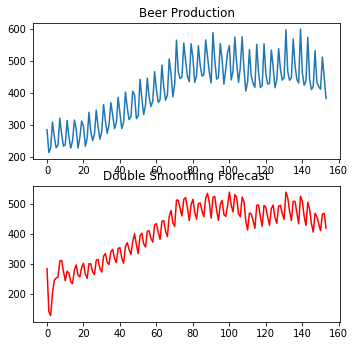

In [42]:
### Plot double Exponential Smoothing forecasted value
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
beer_df['Beer_Prod'].plot(ax=ax)
ax.set_title('Beer Production')
ax = fig.add_subplot(2,1,2)
beer_df['DEF'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')
plt.savefig('B07887_03_14.png', format='png', dpi=300)

In [43]:
# Single vs Double Forecast value
beer_df['Single_Exponential_Forecast'] = single_exp_smoothing(beer_df['Beer_Prod'], 0.4)


Text(0.5, 1.0, 'Actual Vs Single Smoothing Forecasting')

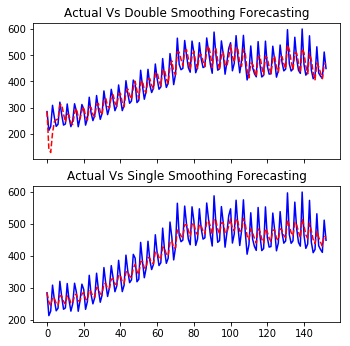

In [46]:
# Plot Single Exponential Smoothing forecasted value
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[0])
beer_df['DEF'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Actual Vs Double Smoothing Forecasting')

beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[1])
beer_df['Single_Exponential_Forecast'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Actual Vs Single Smoothing Forecasting')

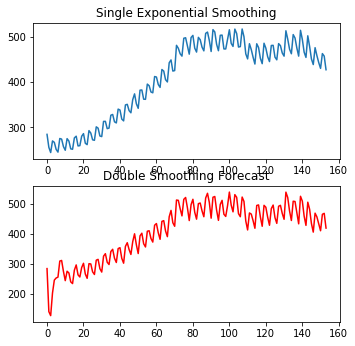

In [49]:
# Plot single and double exponential smoothing
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
beer_df['Single_Exponential_Forecast'].plot(ax=ax)
ax.set_title('Single Exponential Smoothing')
ax = fig.add_subplot(2,1,2)
beer_df['DEF'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')
plt.savefig('B07887_03_14.png', format='png', dpi=300)

## Chapter 3: Higher Order Exponential Smoothing

In [50]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [52]:
#read the data from into a pandas.DataFrame
wisc_emp = pd.read_csv('wisconsin-employment-time-series.csv')

#Let's find out the shape of the DataFrame
print('Shape of the DataFrame:', wisc_emp.shape)

Shape of the DataFrame: (178, 2)


In [53]:
#Let's see first 10 rows of it
wisc_emp.head()

Month  Employment
0  1961-01       239.6
1  1961-02       236.4
2  1961-03       236.8
3  1961-04       241.5
4  1961-05       243.7

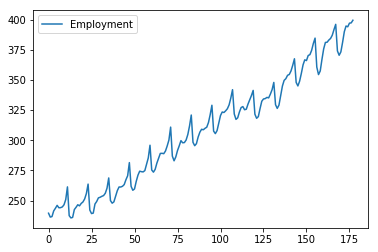

In [54]:
# plot the wisconsin employment dataset
wisc_emp.plot()

In [55]:
# Capture seasonality component
def initialize_T(x, seasonLength):
    total=0.0
    for i in range(seasonLength):
        total+=float(x[i+seasonLength]-x[i])/seasonLength
    return total

initialize_T(wisc_emp['Employment'], 12)

1.6916666666666653

In [56]:
# Initialize seasonal trend
def initialize_seasonalilty(x, seasonLength):
    seasons={}
    seasonsMean=[]
    num_season=int(len(x)/seasonLength)
    # Compute season average
    for i in range(num_season):
        seasonsMean.append(sum(x[seasonLength*i:seasonLength*i+seasonLength])/float(seasonLength))
    
    # compute season intial values
    for i in range(seasonLength):
        tot=0.0
        for j in range(num_season):
            tot+=x[seasonLength*j+i]-seasonsMean[j]
        seasons[i]=tot/num_season
    return seasons
            
initialize_seasonalilty(wisc_emp['Employment'], 12)   

{0: -11.325000000000015,
 1: -14.48214285714287,
 2: -12.667857142857159,
 3: -6.403571428571445,
 4: -1.603571428571444,
 5: 1.5535714285714164,
 6: 1.0821428571428413,
 7: 2.22499999999998,
 8: 3.539285714285705,
 9: 6.89642857142856,
 10: 11.774999999999986,
 11: 19.410714285714267}

In [59]:
# Triple Exponential Smoothing Forecast
def triple_exp_smoothing(x, seasonLength, alpha, beta, gamma, h):
    yhat=[]
    S = initialize_seasonalilty(x, seasonLength)
    for i in range(len(x)+h):
        if i == 0:
            F = x[0]
            T = initialize_T(x, seasonLength)
            yhat.append(x[0])
            continue
        if i >= len(x):
            m = i - len(x) + 1
            yhat.append((F + m*T) + S[i%seasonLength])
        else:
            obsval = x[i]
            F_last, F= F, alpha*(obsval-S[i%seasonLength]) + (1-alpha)*(F+T)
            T = beta * (F-F_last) + (1-beta)*T
            S[i%seasonLength] = gamma*(obsval-F) + (1-gamma)*S[i%seasonLength]
            yhat.append(F+T+S[i%seasonLength])
    return yhat
# Triple exponential smoothing
wisc_emp['TES']=triple_exp_smoothing(wisc_emp['Employment'], 12, 0.4, 0.6, 0.2, 0)

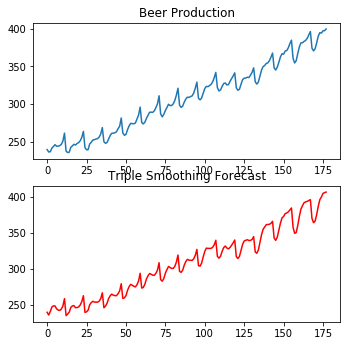

In [60]:
### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
wisc_emp['Employment'].plot(ax=ax)
ax.set_title('Beer Production')
ax = fig.add_subplot(2,1,2)
wisc_emp['TES'].plot(ax=ax, color='r')
ax.set_title('Triple Smoothing Forecast')
plt.savefig('B07887_03_14.png', format='png', dpi=300)

# Chapter 4. Auto-Regressive Models

## Chapter 4: Auto-Regressive (AR)

In [26]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

In [27]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

In [13]:
# Number of samples
n = 600

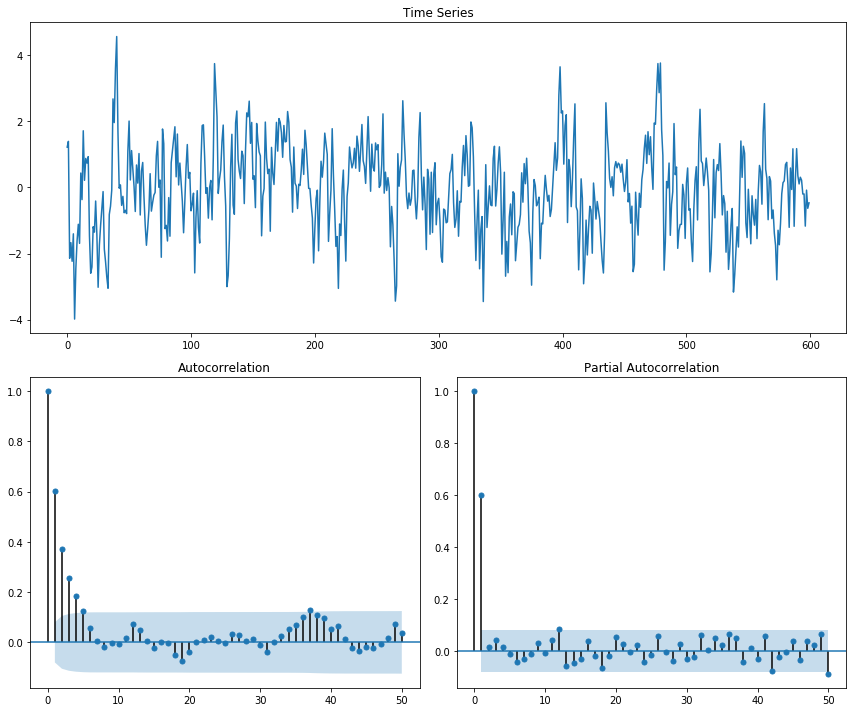

In [14]:
# Generate AR(1) dataset
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

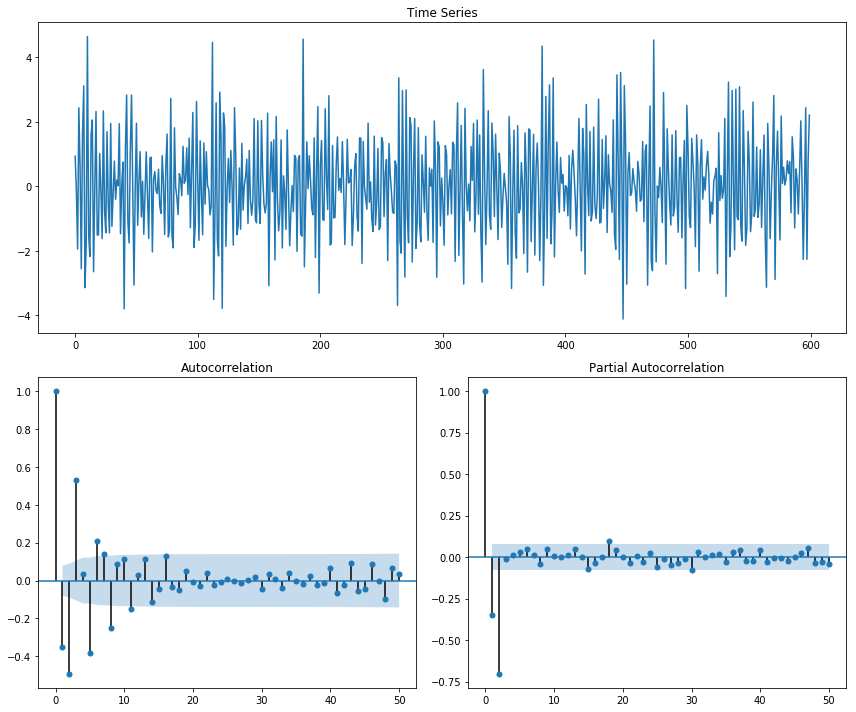

In [15]:
# Generate AR(2) dataset
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar2_data)

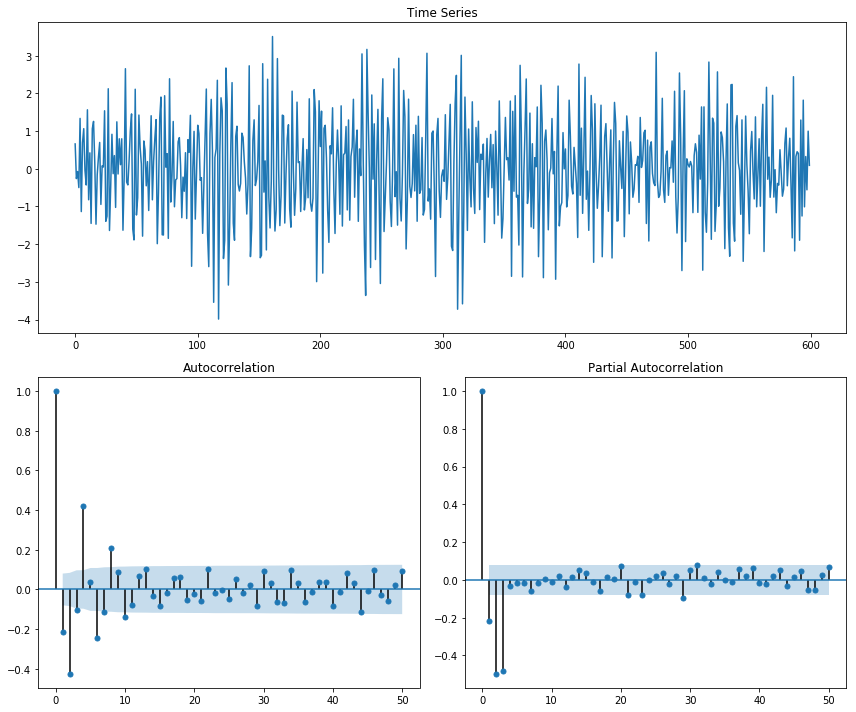

In [16]:
# Generate AR(3) dataset
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar3_data)

In [17]:
# Build AR(1) model
ar1model = smtsa.ARMA(ar1_data.tolist(), order=(1, 0))
ar1=ar1model.fit(maxlag=30, method='mle', trend='nc')
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -882.770
Method:                           mle   S.D. of innovations              1.053
Date:                Tue, 07 May 2019   AIC                           1769.541
Time:                        17:01:46   BIC                           1778.335
Sample:                             0   HQIC                          1772.964
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.6011      0.033     18.453      0.000       0.537       0.665
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6635           +0.0000j            1.6635            0.0000
-----------------------------------------------------------------------------
"""

In [18]:
# Build AR(2) model
ar1model = smtsa.ARMA(ar1_data.tolist(), order=(2, 0))
ar1=ar1model.fit(maxlag=30, method='mle', trend='nc')
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(2, 0)   Log Likelihood                -882.667
Method:                           mle   S.D. of innovations              1.053
Date:                Tue, 07 May 2019   AIC                           1771.334
Time:                        17:01:53   BIC                           1784.525
Sample:                             0   HQIC                          1776.469
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.5900      0.041     14.469      0.000       0.510       0.670
ar.L2.y        0.0186      0.041      0.455      0.649      -0.061       0.099
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6131           +0.0000j            1.6131            0.0000
AR.2          -33.3957           +0.0000j           33.3957            0.5000
-----------------------------------------------------------------------------
"""

In [19]:
# Build MA(3) model
ar3 = smtsa.ARMA(ar3_data.tolist(), order=(3, 0)).fit(
    maxlag=30, method='mle', trend='nc')
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -851.756
Method:                           mle   S.D. of innovations              0.999
Date:                Tue, 07 May 2019   AIC                           1711.512
Time:                        17:01:55   BIC                           1729.100
Sample:                             0   HQIC                          1718.359
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.5611      0.036    -15.686      0.000      -0.631      -0.491
ar.L2.y       -0.6490      0.033    -19.616      0.000      -0.714      -0.584
ar.L3.y       -0.4793      0.036    -13.437      0.000      -0.549      -0.409
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0732           -1.1769j            1.1792           -0.2401
AR.2            0.0732           +1.1769j            1.1792            0.2401
AR.3           -1.5005           -0.0000j            1.5005           -0.5000
-----------------------------------------------------------------------------
"""

## Chapter 4. Moving Average (MA)

In [1]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

In [3]:
# Number of samples
n = 600

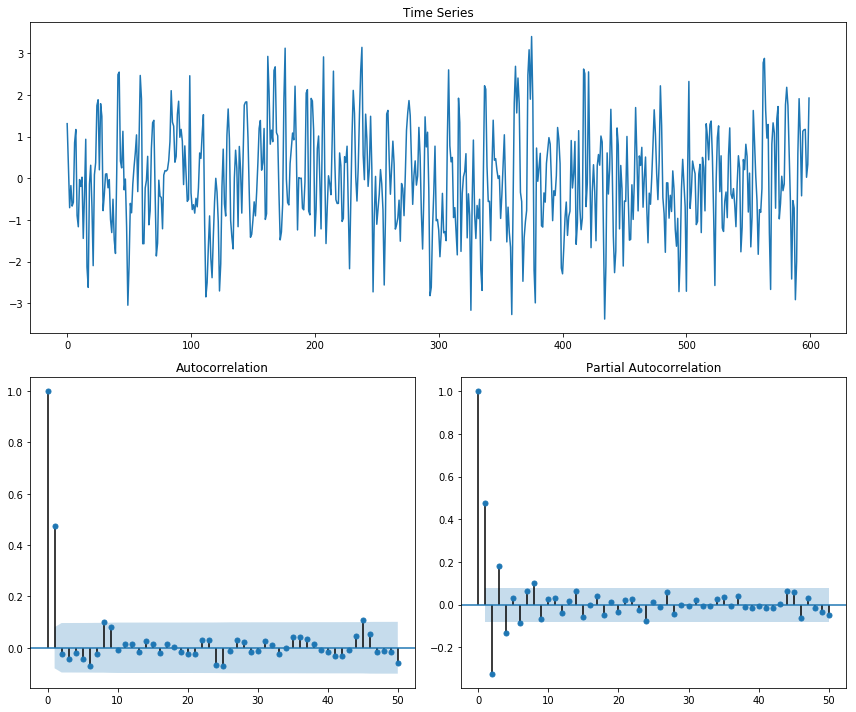

In [4]:
# Generate MA(1) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma1_data)

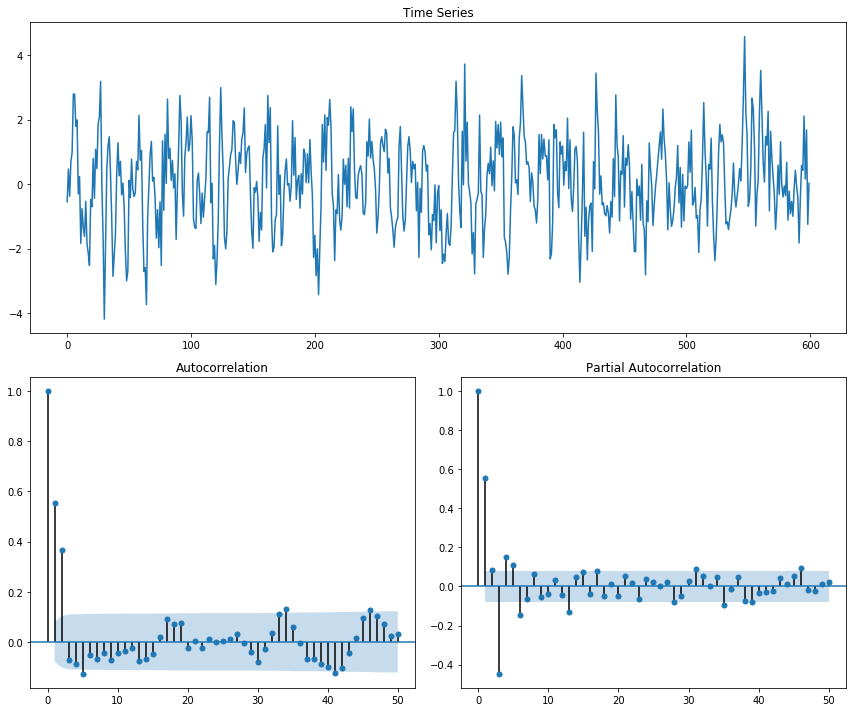

In [5]:
# Generate MA(2) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma2_data)

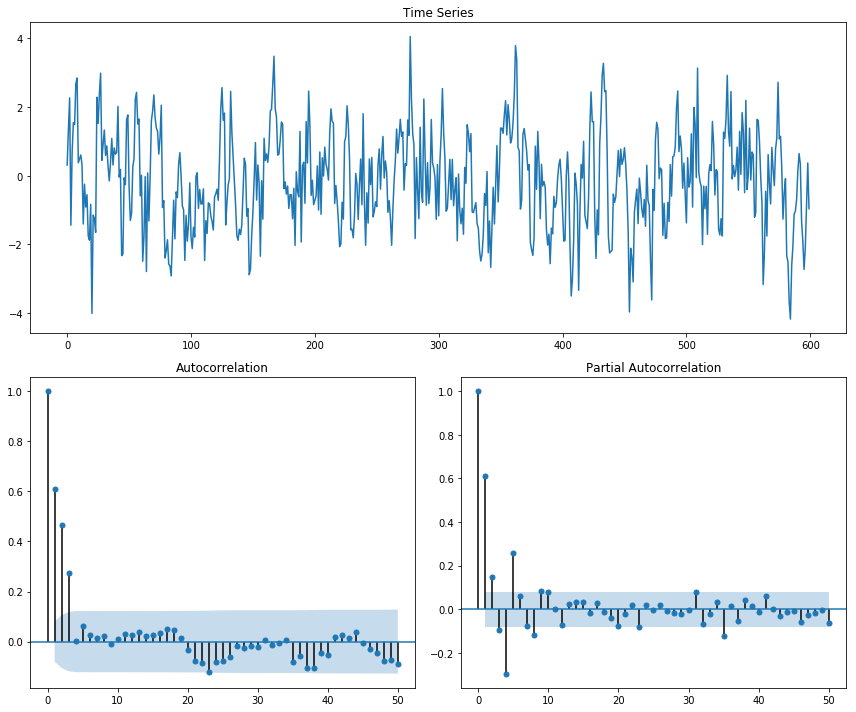

In [6]:
# Generate MA(3) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma3_data)

In [8]:
# Build MA(1) model
ma1 = smtsa.ARMA(ma1_data.tolist(), order=(0, 1)).fit(
    maxlag=30, method='mle', trend='nc')
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 1)   Log Likelihood                -857.393
Method:                           mle   S.D. of innovations              1.010
Date:                Tue, 07 May 2019   AIC                           1718.787
Time:                        16:59:50   BIC                           1727.580
Sample:                             0   HQIC                          1722.210
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6824      0.027     25.641      0.000       0.630       0.735
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4655           +0.0000j            1.4655            0.5000
-----------------------------------------------------------------------------
"""

In [9]:
# Build MA(2) model
ma1 = smtsa.ARMA(ma1_data.tolist(), order=(0, 2)).fit(
    maxlag=30, method='mle', trend='nc')
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 2)   Log Likelihood                -856.428
Method:                           mle   S.D. of innovations              1.008
Date:                Tue, 07 May 2019   AIC                           1718.857
Time:                        16:59:59   BIC                           1732.047
Sample:                             0   HQIC                          1723.992
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.7282      0.043     16.857      0.000       0.644       0.813
ma.L2.y        0.0585      0.042      1.395      0.164      -0.024       0.141
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.5715           +0.0000j            1.5715            0.5000
MA.2          -10.8859           +0.0000j           10.8859            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
# Build MA(3) model
ma3 = smtsa.ARMA(ma3_data.tolist(), order=(0, 3)).fit(
    maxlag=30, method='mle', trend='nc')
ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 3)   Log Likelihood                -843.069
Method:                           mle   S.D. of innovations              0.985
Date:                Tue, 07 May 2019   AIC                           1694.139
Time:                        17:00:09   BIC                           1711.726
Sample:                             0   HQIC                          1700.985
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6164      0.038     16.421      0.000       0.543       0.690
ma.L2.y        0.6671      0.036     18.315      0.000       0.596       0.738
ma.L3.y        0.5470      0.036     15.112      0.000       0.476       0.618
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.0756           -1.1525j            1.1549           -0.2396
MA.2            0.0756           +1.1525j            1.1549            0.2396
MA.3           -1.3705           -0.0000j            1.3705           -0.5000
-----------------------------------------------------------------------------
"""

## Chapter 4: Auto-Regressive Moving Average (ARMA)

In [20]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
from statsmodels.tsa import arima_process

In [21]:
# Number of samples
n = 600

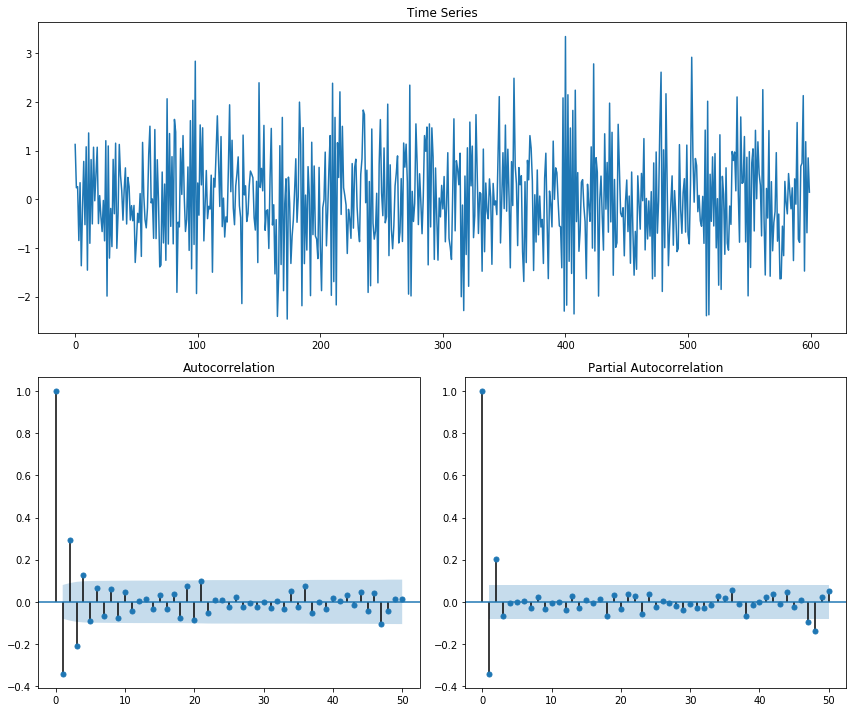

In [22]:
# Generate AR(1) dataset
ar = np.r_[1, 0.6]
ma = np.r_[1, 0.3]
ar1ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1ma1_data )

Text(0.5, 0, 'Lag')

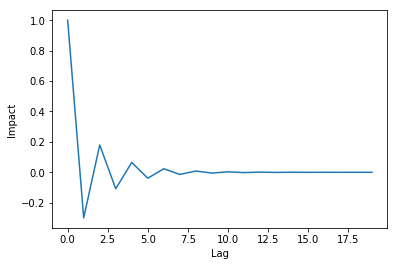

In [23]:
# Impluse response curve
plt.plot(arima_process.arma_impulse_response(ar, ma, nobs=20))
plt.ylabel("Impact")
plt.xlabel("Lag")

In [24]:
# Build AR(1) model
ar1ma1 = smtsa.ARMA(ar1ma1_data.tolist(), order=(1, 1)).fit(
    maxlag=30, method='mle', trend='nc')
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 1)   Log Likelihood                -826.852
Method:                           mle   S.D. of innovations              0.960
Date:                Tue, 07 May 2019   AIC                           1659.704
Time:                        17:03:52   BIC                           1672.895
Sample:                             0   HQIC                          1664.839
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.7592      0.057    -13.253      0.000      -0.871      -0.647
ma.L1.y        0.4823      0.076      6.345      0.000       0.333       0.631
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3172           +0.0000j            1.3172            0.5000
MA.1           -2.0732           +0.0000j            2.0732            0.5000
-----------------------------------------------------------------------------
"""

In [29]:
# Optimize ARMA parameters
aicVal=[]
for ari in range(1, 3):
    for maj in range(1,3):
        arma_obj = smtsa.ARMA(ar1ma1_data.tolist(), order=(ari, maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])

aicVal

[[1, 1, 1659.7037486790707],
 [1, 2, 1659.7146726551464],
 [2, 1, 1659.8639023020157],
 [2, 2, 1661.7000140363677]]

### IBM Example Auto-Regressive Moving Average (ARMA)

In [31]:
# Load modules 
from __future__ import print_function
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
import os

In [32]:
# Load Dataset
ibm_df = pd.read_csv('ibm-common-stock-closing-prices copy.csv')
ibm_df.head()

Date  IBM common stock closing prices
0  1962-01-02                           572.00
1  1962-01-03                           577.00
2  1962-01-04                           571.25
3  1962-01-05                           560.00
4  1962-01-08                           549.50

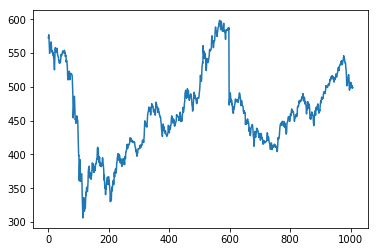

In [34]:
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)
ibm_df.head()
ibm_df.Close_Price.plot()

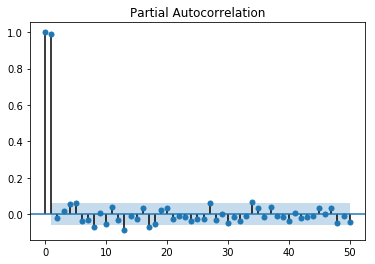

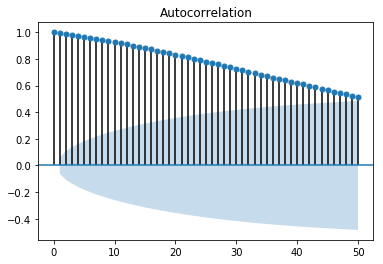

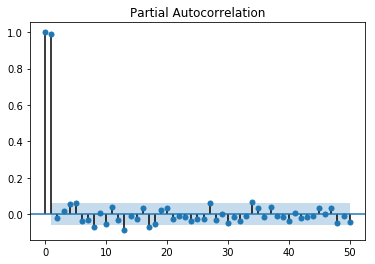

In [35]:
# Plot ACF and PACF
ibm_df=ibm_df.dropna()
plot_acf(ibm_df.Close_Price, lags=50)
plot_pacf(ibm_df.Close_Price, lags=50)

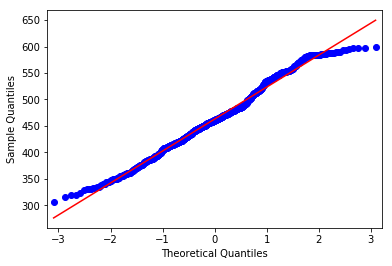

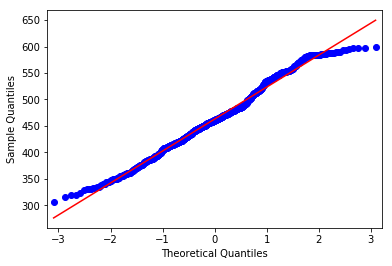

In [36]:
# QQ plot and probability plot
sm.qqplot(ibm_df['Close_Price'], line='s')

In [39]:
# Optimize ARMA parameters
aicVal=[]
for ari in range(1, 3):
    for maj in range(0,3):
        arma_obj = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(ari, maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])
        
aicVal

[[1, 0, 6702.766710082229],
 [1, 1, 6704.704833957512],
 [1, 2, 6706.643594207395],
 [2, 0, 6704.705792809062],
 [2, 1, 6705.736896922092],
 [2, 2, 6707.728881258643]]

In [41]:
arma_obj_fin = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(1, 0)).fit(maxlag=30, method='mle', trend='nc')
ibm_df['ARMA']=arma_obj_fin.predict()
arma_obj_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1008
Model:                     ARMA(1, 0)   Log Likelihood               -3349.383
Method:                           mle   S.D. of innovations              6.683
Date:                Tue, 07 May 2019   AIC                           6702.767
Time:                        17:09:45   BIC                           6712.598
Sample:                             0   HQIC                          6706.502
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9999      0.000   9222.316      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

Text(0, 0.5, 'Closing price')

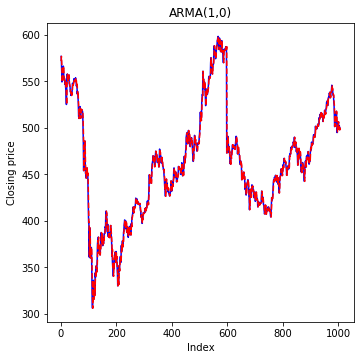

In [43]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ibm_df['Close_Price'].iloc[1:].plot(color='b', linestyle = '-', ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(1,0)')
plt.xlabel('Index')
plt.ylabel('Closing price')

## Chapter 4: Auto-regressive integrated moving average (ARIMA) Box-Jenkins

In [45]:
#Load Modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

In [57]:
#Read data from Excel file
djia_df = pd.read_excel('DJIA_Jan2016_Dec2016.xlsx')
djia_df.head(10)

Date          Open          High           Low         Close  \
0 2016-01-04  17405.480469  17405.480469  16957.630859  17148.939453   
1 2016-01-05  17147.500000  17195.839844  17038.609375  17158.660156   
2 2016-01-06  17154.830078  17154.830078  16817.619141  16906.509766   
3 2016-01-07  16888.359375  16888.359375  16463.630859  16514.099609   
4 2016-01-08  16519.169922  16651.890625  16314.570313  16346.450195   
5 2016-01-11  16358.709961  16461.849609  16232.030273  16398.570313   
6 2016-01-12  16419.109375  16591.349609  16322.070313  16516.220703   
7 2016-01-13  16526.630859  16593.509766  16123.200195  16151.410156   
8 2016-01-14  16159.009766  16482.050781  16075.120117  16379.049805   
9 2016-01-15  16354.330078  16354.330078  15842.110352  15988.080078   

      Adj Close     Volume  
0  17148.939453  148060000  
1  17158.660156  105750000  
2  16906.509766  120250000  
3  16514.099609  176240000  
4  16346.450195  141850000  
5  16398.570313  127790000  
6  16516.220703  117480000  
7  16151.410156  153530000  
8  16379.049805  158830000  
9  15988.080078  239210000

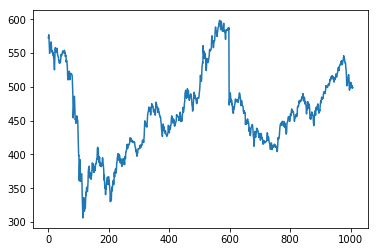

In [58]:
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)
ibm_df.head()
ibm_df.Close_Price.plot()

In [59]:
#Let us parse the Date column and use as row index 
#for the DataFrame and drop it as a column
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)

In [60]:
#Let us see first few rows of the modified DataFrame
djia_df.head(10)

Open          High           Low         Close  \
Date                                                                 
2016-01-04  17405.480469  17405.480469  16957.630859  17148.939453   
2016-01-05  17147.500000  17195.839844  17038.609375  17158.660156   
2016-01-06  17154.830078  17154.830078  16817.619141  16906.509766   
2016-01-07  16888.359375  16888.359375  16463.630859  16514.099609   
2016-01-08  16519.169922  16651.890625  16314.570313  16346.450195   
2016-01-11  16358.709961  16461.849609  16232.030273  16398.570313   
2016-01-12  16419.109375  16591.349609  16322.070313  16516.220703   
2016-01-13  16526.630859  16593.509766  16123.200195  16151.410156   
2016-01-14  16159.009766  16482.050781  16075.120117  16379.049805   
2016-01-15  16354.330078  16354.330078  15842.110352  15988.080078   

               Adj Close     Volume  
Date                                 
2016-01-04  17148.939453  148060000  
2016-01-05  17158.660156  105750000  
2016-01-06  16906.509766  120250000  
2016-01-07  16514.099609  176240000  
2016-01-08  16346.450195  141850000  
2016-01-11  16398.570313  127790000  
2016-01-12  16516.220703  117480000  
2016-01-13  16151.410156  153530000  
2016-01-14  16379.049805  158830000  
2016-01-15  15988.080078  239210000

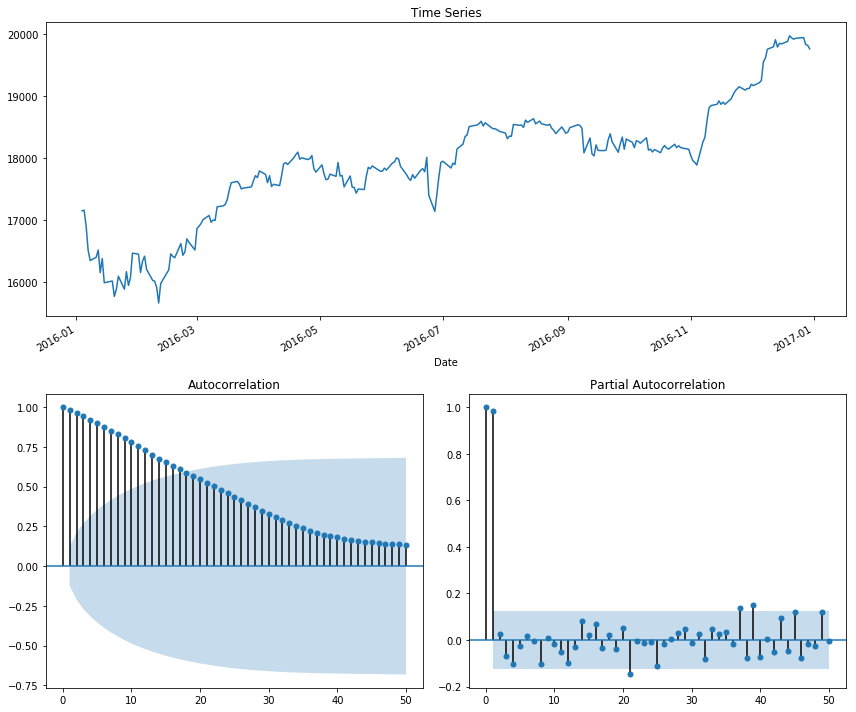

In [61]:
# Plot ACF and PACF
djia_df=djia_df.dropna()
plotds(djia_df['Close'], nlag=50)

In [62]:
# Evaluate mean and variance at mid values
mean1, mean2 =djia_df.iloc[:125].Close.mean(), djia_df.iloc[125:].Close.mean()
var1, var2 = djia_df.iloc[:125].Close.var(), djia_df.iloc[125:].Close.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=17226.579164, mean2=18616.603593
variance1=487045.734003, variance2=325183.639530


In [63]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
adf_result= adfuller(djia_df.Close.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -0.462320
p-value: 0.899162


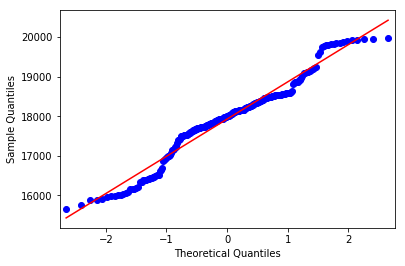

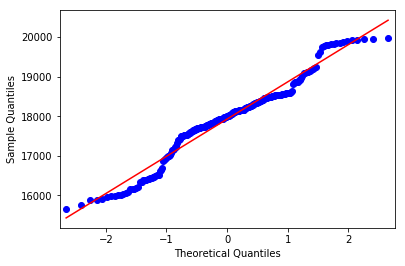

In [64]:
# QQ plot and probability plot
sm.qqplot(djia_df['Close'], line='s')

In [65]:
# Optimize ARMA parameters (Will return a non-stationary error)
arma_obj = smtsa.ARMA(djia_df['Close'].tolist(), order=(1, 1)).fit(maxlag=30, method='mle', trend='nc')


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

Text(0.5, 1.0, 'First-order differences of DJIA during Jan 2016-Dec 2016')

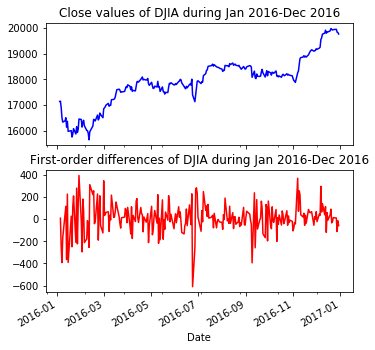

In [66]:
#Let us plot the original time series and first-differences
first_order_diff = djia_df['Close'].diff(1).dropna()
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')


ADF Statistic: -17.135094
p-value: 0.000000


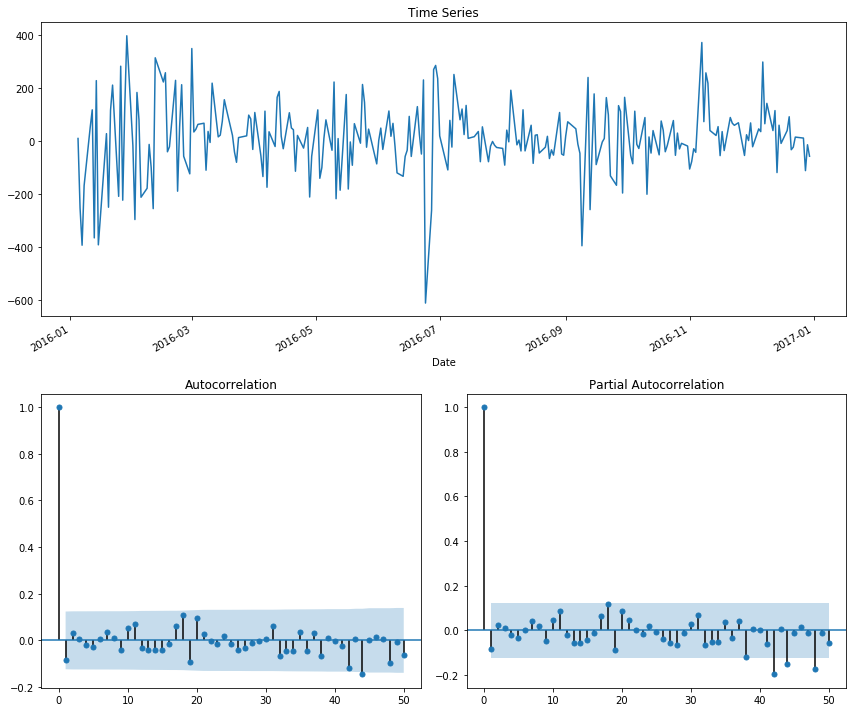

In [67]:
# plot signal
plotds(first_order_diff, nlag=50)
adf_result= adfuller(first_order_diff)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

In [70]:
# Optimize ARMA parameters
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(djia_df['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
aicVal

[[0, 1, 0, 3182.6357271384236],
 [0, 1, 1, 3182.931550316123],
 [0, 1, 2, 3184.662278666937],
 [1, 1, 0, 3182.83715277997],
 [1, 1, 1, 3184.7361515062103],
 [2, 1, 0, 3184.6953586865197],
 [2, 1, 1, 3186.7685269724097],
 [2, 1, 2, 3188.7125454990423],
 [0, 2, 0, 3364.451294991992],
 [0, 2, 1, 3177.7694610648687],
 [1, 2, 0, 3274.734897745876],
 [1, 2, 1, 3177.995313608747],
 [1, 2, 2, 3179.888768554125],
 [2, 2, 0, 3242.247697021925],
 [2, 2, 1, 3179.841284646488],
 [2, 2, 2, 3180.9382858917097]]

In [69]:
# Optimal ARIMA model
arima_obj = ARIMA(djia_df['Close'].tolist(), order=(0,2,1))
arima_obj_fit = arima_obj.fit(disp=0)
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  250
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1585.885
Method:                       css-mle   S.D. of innovations            136.122
Date:                Tue, 07 May 2019   AIC                           3177.769
Time:                        17:15:41   BIC                           3188.334
Sample:                             2   HQIC                          3182.021
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1011      0.119      0.853      0.395      -0.131       0.334
ma.L1.D2.y    -1.0000      0.012    -81.004      0.000      -1.024      -0.976
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [71]:
# Evaluate prediction
pred=np.append([0,0],arima_obj_fit.fittedvalues.tolist())
djia_df['ARIMA']=pred
diffval=np.append([0,0], arima_obj_fit.resid+arima_obj_fit.fittedvalues)
djia_df['diffval']=diffval

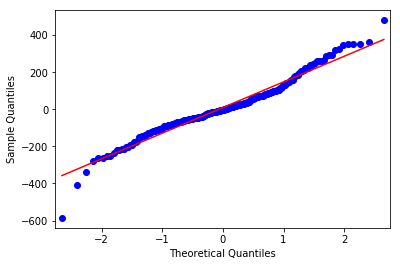

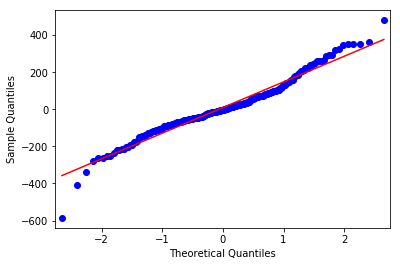

In [72]:
# QQ plot and probability plot
sm.qqplot(arima_obj_fit.resid, line='s')

Text(0, 0.5, 'Closing')

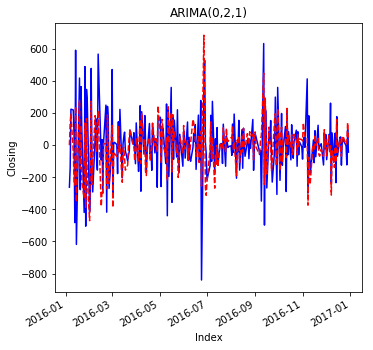

In [73]:
# Plot output
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
djia_df['diffval'].iloc[2:].plot(color='b', linestyle = '-', ax=axarr)
djia_df['ARIMA'].iloc[2:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(0,2,1)')
plt.xlabel('Index')
plt.ylabel('Closing')

Text(0, 0.5, 'Forecasted value')

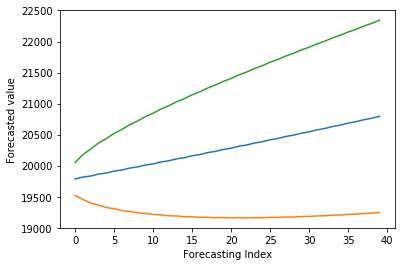

In [116]:
# Forecasting and Confidence Interval (CI) 
f, err, ci=arima_obj_fit.forecast(40) 
plt.plot(f) 
plt.plot(ci) 
plt.xlabel('Forecasting Index') 
plt.ylabel('Forecasted value') 

In [117]:
# SARIMAX MODEL
# Seasonality (based on first difference ACF shows significance at 42 lag)
x=djia_df['Close']-djia_df['Close'].shift(42)
mod = sm.tsa.statespace.SARIMAX(djia_df['Close'], trend='n', order=(0,2,1), seasonal_order=(1,1,1,42))
sarimax= mod.fit()
sarimax.summary()

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(0, 2, 1)x(1, 1, 1, 42)   Log Likelihood               -1366.570
Date:                            Tue, 07 May 2019   AIC                           2741.141
Time:                                    17:23:32   BIC                           2754.491
Sample:                                         0   HQIC                          2746.539
                                            - 252                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000     16.167     -0.062      0.951     -32.686      30.687
ar.S.L42      -0.2542      0.093     -2.727      0.006      -0.437      -0.072
ma.S.L42      -0.4671      0.130     -3.597      0.000      -0.722      -0.213
sigma2      2.355e+04    3.8e+05      0.062      0.951   -7.22e+05    7.69e+05
===================================================================================
Ljung-Box (Q):                       31.80   Jarque-Bera (JB):                21.28
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Chapter 5: Deep Learning for Time Series Forecasting

In this notebook, we will use a multi-layer perceptron to develop time series forecasting models.
The dataset used for the examples of this notebook is on air pollution measured by concentration of
particulate matter (PM) of diameter less than or equal to 2.5 micrometers. There are other variables
such as air pressure, air temperature, dew point and so on.
Two time series models are developed - one on air pressure and the other on pm2.5.
The dataset has been downloaded from UCI Machine Learning Repository.

In [ ]:
#https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

## Chapter 5: Multi-Layer perceptrons (MLP) 
## Air Pressure

In [2]:
#https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [3]:
#Read the dataset into a pandas.DataFrame
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [4]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [5]:
#Let's see the first five rows of the DataFrame
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

To make sure that the rows are in the right order of date and time of observations,
a new column datetime is created from the date and time related columns of the DataFrame.
The new column consists of Python's datetime.datetime objects. The DataFrame is sorted in ascending order
over this column.

In [6]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

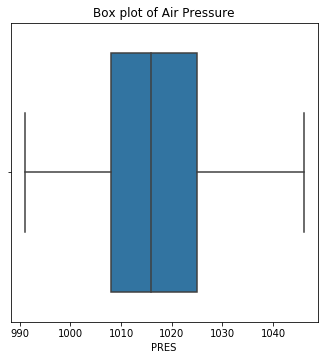

In [8]:
#Let us draw a box plot to visualize the central tendency 
#and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['PRES'])
g.set_title('Box plot of Air Pressure')
plt.savefig('B07887_05_01.png', format='png', dpi=300)

/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


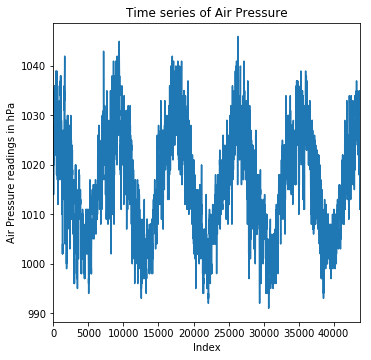

In [10]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['PRES'])
g.set_title('Time series of Air Pressure')
g.set_xlabel('Index')
g.set_ylabel('Air Pressure readings in hPa')
plt.savefig('B07887_05_02.png', format='png', dpi=300)

Gradient descent algorithms perform better (for example converge faster) if the variables are wihtin range [-1, 1]. Many sources relax the boundary to even [-3, 3]. The PRES variable is mixmax scaled to bound the tranformed variable within [0,1].

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1, 1))

Before training the model, the dataset is split in two parts - train set and validation set.
The neural network is trained on the train set. This means computation of the loss function, back propagation
and weights updated by a gradient descent algorithm is done on the train set. The validation set is
used to evaluate the model and to determine the number of epochs in model training. Increasing the number of 
epochs will further decrease the loss function on the train set but might not necessarily have the same effect
for the validation set due to overfitting on the train set.Hence, the number of epochs is controlled by keeping
a tap on the loss function computed for the validation set. We use Keras with Tensorflow backend to define and train
the model. All the steps involved in model training and validation is done by calling appropriate functions
of the Keras API.

In [10]:
"""
Let's start by splitting the dataset into train and validation. The dataset's time period is from
Jan 1st, 2010 to Dec 31st, 2014. The first four years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (35064, 15)
Shape of test: (8760, 15)


In [11]:
#First five rows of train
df_train.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  \
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0   
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0   
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0   
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0   
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0   

             datetime  scaled_PRES  
0 2010-01-01 00:00:00     0.545455  
1 2010-01-01 01:00:00     0.527273  
2 2010-01-01 02:00:00     0.509091  
3 2010-01-01 03:00:00     0.509091  
4 2010-01-01 04:00:00     0.490909

In [12]:
#First five rows of validation
df_val.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
35064  35065  2014      1    1     0   24.0   -20   7.0  1014.0   NW  143.48   
35065  35066  2014      1    1     1   53.0   -20   7.0  1013.0   NW  147.50   
35066  35067  2014      1    1     2   65.0   -20   6.0  1013.0   NW  151.52   
35067  35068  2014      1    1     3   70.0   -20   6.0  1013.0   NW  153.31   
35068  35069  2014      1    1     4   79.0   -18   3.0  1012.0   cv    0.89   

       Is  Ir            datetime  scaled_PRES  
35064   0   0 2014-01-01 00:00:00     0.418182  
35065   0   0 2014-01-01 01:00:00     0.400000  
35066   0   0 2014-01-01 02:00:00     0.400000  
35067   0   0 2014-01-01 03:00:00     0.400000  
35068   0   0 2014-01-01 04:00:00     0.381818

In [13]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)

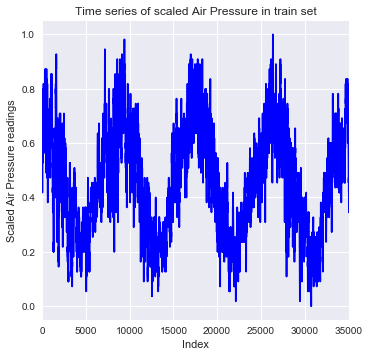

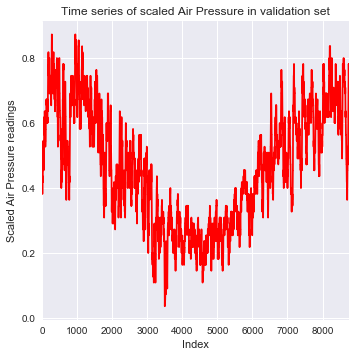

In [14]:
"""
The train and validation time series of standardized PRES are also plotted.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_PRES'], color='b')
g.set_title('Time series of scaled Air Pressure in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')
plt.savefig('B07887_05_03.png', format='png', dpi=300)

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_PRES'], color='r')
g.set_title('Time series of scaled Air Pressure in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')
plt.savefig('plots/ch5/B07887_05_04.png', format='png', dpi=300)

Now we need to generate regressors (X) and target variable (y) for train and validation. 2-D array of regressors and 1-D array of target is created from the original 1-D array of column standardized_PRES in the DataFrames. For the time series forecasting model, Past seven days of observations are used to predict for the next day. This is equivalent to a AR(7) model. We define a function which takes the original time series and the number of timesteps in regressors as input to generate the arrays of X and y.

In [15]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [16]:
X_train, y_train = makeXy(df_train['scaled_PRES'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (35057, 7) (35057,)


In [17]:
X_val, y_val = makeXy(df_val['scaled_PRES'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8753, 7) (8753,)


Now we define the MLP using the Keras Functional API. In this approach a layer can be declared as the input of the following layer at the time of defining the next layer. 

In [18]:
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [19]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,), dtype='float32')

In [20]:
#Dense layers are defined with linear activation
dense1 = Dense(32, activation='linear')(input_layer)
dense2 = Dense(16, activation='linear')(dense1)
dense3 = Dense(16, activation='linear')(dense2)

Multiple hidden layers and large number of neurons in each hidden layer gives neural networks the ability to model complex non-linearity of the underlying relations between regressors and target. However, deep neural networks can also overfit train data and give poor results on validation or test set. Dropout has been effectively used to regularize deep neural networks. In this example, a Dropout layer is added before the output layer. Dropout randomly sets p fraction of input neurons to zero before passing to the next layer. Randomly dropping inputs essentially acts as a bootstrap aggregating or bagging type of model ensembling. Random forest uses bagging by building trees on random subsets of input features. We use p=0.2 to dropout 20% of randomly selected input features.

In [21]:
dropout_layer = Dropout(0.2)(dense3)

In [22]:
#Finally, the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)

The input, dense and output layers will now be packed inside a Model, which is wrapper class for training and making
predictions. Mean square error (MSE) is used as the loss function.

The network's weights are optimized by the Adam algorithm. Adam stands for adaptive moment estimation
and has been a popular choice for training deep neural networks. Unlike, stochastic gradient descent, Adam uses
different learning rates for each weight and separately updates the same as the training progresses. The learning rate of a weight is updated based on exponentially weighted moving averages of the weight's gradients and the squared gradients.

In [23]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_squared_error', optimizer='adam')
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be used for a instance of back propagation. The validation dataset is also passed to evaluate the model after every epoch completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch, at which the loss function has been minimum.

In [24]:
save_weights_at = os.path.join('keras_models', 'PRSA_data_Air_Pressure_MLP_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 35057 samples, validate on 8753 samples
Epoch 1/20
35057/35057 [==============================] - 2s - loss: 0.0036 - val_loss: 2.5258e-04
Epoch 2/20
35057/35057 [==============================] - 3s - loss: 0.0010 - val_loss: 3.8358e-04
Epoch 3/20
35057/35057 [==============================] - 2s - loss: 8.5746e-04 - val_loss: 1.4754e-04
Epoch 4/20
35057/35057 [==============================] - 2s - loss: 8.1336e-04 - val_loss: 2.9480e-04
Epoch 5/20
35057/35057 [==============================] - 2s - loss: 7.9591e-04 - val_loss: 3.3620e-04
Epoch 6/20
35057/35057 [==============================] - 2s - loss: 7.7443e-04 - val_loss: 1.4424e-04
Epoch 7/20
35057/35057 [==============================] - 2s - loss: 7.8400e-04 - val_loss: 3.1264e-04
Epoch 8/20
35057/35057 [==============================] - 2s - loss: 7.8100e-04 - val_loss: 2.7084e-04
Epoch 9/20
35057/35057 [==============================] - 2s - loss: 7.5133e-04 - val_loss: 1.4237e-04
Epoch 10/20
35057/35057 [=======

Prediction are made for the air pressure from the best saved model. The model's predictions, which are on the scaled  air-pressure, are inverse transformed to get predictions on original air pressure. The goodness-of-fit or R squared is also calculated.

In [26]:
best_model = load_model(os.path.join('keras_models', 'PRSA_data_Air_Pressure_MLP_weights.13-0.0001.hdf5'))
preds = best_model.predict(X_val)
pred_PRES = scaler.inverse_transform(preds)
pred_PRES = np.squeeze(pred_PRES)

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2 = r2_score(df_val['PRES'].loc[7:], pred_PRES)
print('R-squared for the validation set:', round(r2,4))

R-squared for the validation set: 0.9958


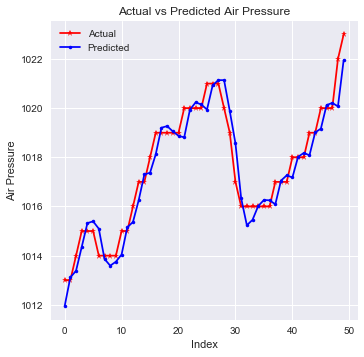

In [29]:
#Let's plot the first 50 actual and predicted values of air pressure.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')
plt.savefig('B07887_05_05.png', format='png', dpi=300)

## Chapter 5: Recurrent Neural Networks (RNN)
## Long Short Term Memory (LSTM)
## Air Pressure

In this notebook, we will use Long Short Term Memory RNN to develop a time series forecasting model.
The dataset used for the examples of this notebook is on air pollution measured by concentration of
particulate matter (PM) of diameter less than or equal to 2.5 micrometers. There are other variables
such as air pressure, air temparature, dewpoint and so on.
Two time series models are developed - one on air pressure and the other on pm2.5.
The dataset has been downloaded from UCI Machine Learning Repository.

In [1]:
#https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
#set current working directory
os.chdir('D:/Practical Time Series')

In [3]:
#Read the dataset into a pandas.DataFrame
df = pd.read_csv('datasets/PRSA_data_2010.1.1-2014.12.31.csv')

In [4]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [5]:
#Let's see the first five rows of the DataFrame
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

To make sure that the rows are in the right order of date and time of observations,
a new column datetime is created from the date and time related columns of the DataFrame.
The new column consists of Python's datetime.datetime objects. The DataFrame is sorted in ascending order
over this column.

In [6]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

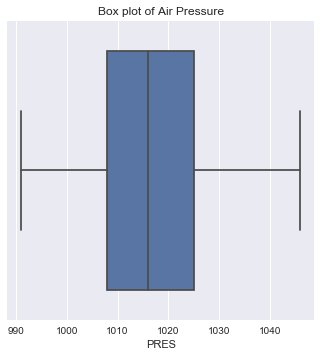

In [7]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['PRES'])
g.set_title('Box plot of Air Pressure')

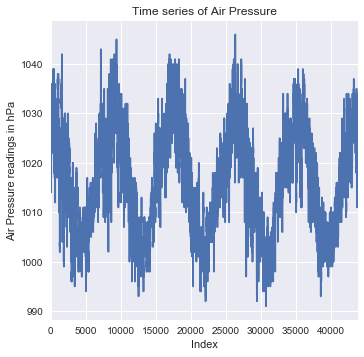

In [8]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['PRES'])
g.set_title('Time series of Air Pressure')
g.set_xlabel('Index')
g.set_ylabel('Air Pressure readings in hPa')

Gradient descent algorithms perform better (for example converge faster) if the variables are wihtin range [-1, 1]. Many sources relax the boundary to even [-3, 3]. The PRES variable is mixmax scaled to bound the tranformed variable within [0,1].

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1, 1))

Before training the model, the dataset is split in two parts - train set and validation set.
The neural network is trained on the train set. This means computation of the loss function, back propagation
and weights updated by a gradient descent algorithm is done on the train set. The validation set is
used to evaluate the model and to determine the number of epochs in model training. Increasing the number of 
epochs will further decrease the loss function on the train set but might not neccesarily have the same effect
for the validation set due to overfitting on the train set.Hence, the number of epochs is controlled by keeping
a tap on the loss function computed for the validation set. We use Keras with Tensorflow backend to define and train
the model. All the steps involved in model training and validation is done by calling appropriate functions
of the Keras API.

In [10]:
"""
Let's start by splitting the dataset into train and validation. The dataset's time period if from
Jan 1st, 2010 to Dec 31st, 2014. The first fours years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (35064, 15)
Shape of test: (8760, 15)


In [11]:
#First five rows of train
df_train.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  \
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0   
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0   
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0   
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0   
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0   

             datetime  scaled_PRES  
0 2010-01-01 00:00:00     0.545455  
1 2010-01-01 01:00:00     0.527273  
2 2010-01-01 02:00:00     0.509091  
3 2010-01-01 03:00:00     0.509091  
4 2010-01-01 04:00:00     0.490909

In [12]:
#First five rows of validation
df_val.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
35064  35065  2014      1    1     0   24.0   -20   7.0  1014.0   NW  143.48   
35065  35066  2014      1    1     1   53.0   -20   7.0  1013.0   NW  147.50   
35066  35067  2014      1    1     2   65.0   -20   6.0  1013.0   NW  151.52   
35067  35068  2014      1    1     3   70.0   -20   6.0  1013.0   NW  153.31   
35068  35069  2014      1    1     4   79.0   -18   3.0  1012.0   cv    0.89   

       Is  Ir            datetime  scaled_PRES  
35064   0   0 2014-01-01 00:00:00     0.418182  
35065   0   0 2014-01-01 01:00:00     0.400000  
35066   0   0 2014-01-01 02:00:00     0.400000  
35067   0   0 2014-01-01 03:00:00     0.400000  
35068   0   0 2014-01-01 04:00:00     0.381818

In [13]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)

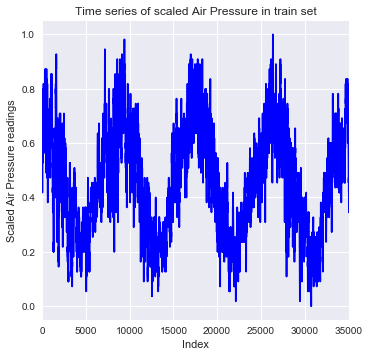

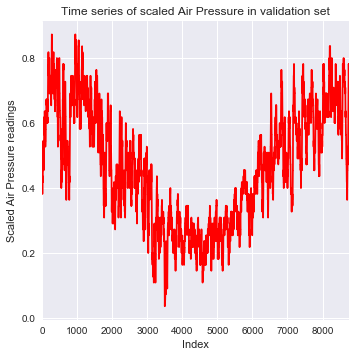

In [14]:
"""
The train and validation time series of standardized PRES is also plotted.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_PRES'], color='b')
g.set_title('Time series of scaled Air Pressure in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_PRES'], color='r')
g.set_title('Time series of scaled Air Pressure in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')

Now we need to generate regressors (X) and target variable (y) for train and validation. 2-D array of regressor and 1-D array of target is created from the original 1-D array of columm log_PRES in the DataFrames. For the time series forecasting model, Past seven days of observations are used to predict for the next day. This is equivalent to a AR(7) model. We define a function which takes the original time series and the number of timesteps in regressors as input to generate the arrays of X and y.

In [15]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [16]:
X_train, y_train = makeXy(df_train['scaled_PRES'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (35057, 7) (35057,)


In [17]:
X_val, y_val = makeXy(df_val['scaled_PRES'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8753, 7) (8753,)


The input to RNN layers must be of shape (number of samples, number of timesteps, number of features per timestep). In this case we are modeling only pm2.5 hence number of features per timestep is one. Number of timesteps is seven and number of samples is same as the number of samples in X_train and X_val, which are reshaped to 3D arrays.

In [18]:
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),\
                 X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of 3D arrays:', X_train.shape, X_val.shape)

Shape of 3D arrays: (35057, 7, 1) (8753, 7, 1)


Now we define the MLP using the Keras Functional API. In this approach a layer can be declared as the input of the following layer at the time of defining the next layer. 

In [19]:
from keras.layers import Dense, Input, Dropout
from keras.layers.recurrent import LSTM
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [20]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,1), dtype='float32')

In [21]:
#LSTM layer is defined for seven timesteps
lstm_layer = LSTM(64, input_shape=(7,1), return_sequences=False)(input_layer)

In [22]:
dropout_layer = Dropout(0.2)(lstm_layer)

In [23]:
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)

The input, dense and output layers will now be packed inside a Model, which is wrapper class for training and making
predictions. Mean square error (mse) is used as the loss function.

The network's weights are optimized by the Adam algorithm. Adam stands for adaptive moment estimation
and has been a popular choice for training deep neural networks. Unlike, stochastic gradient descent, adam uses
different learning rates for each weight and separately updates the same as the training progresses. The learning rate of a weight is updated based on exponentially weighted moving averages of the weight's gradients and the squared gradients.

In [24]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mae', optimizer='adam')
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7, 1)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [25]:
"""
The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.
"""
save_weights_at = os.path.join('keras_models', 'PRSA_data_Air_Pressure_LSTM_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 35057 samples, validate on 8753 samples
Epoch 1/20
35057/35057 [==============================] - 16s - loss: 0.0317 - val_loss: 0.0140
Epoch 2/20
35057/35057 [==============================] - 16s - loss: 0.0191 - val_loss: 0.0108
Epoch 3/20
35057/35057 [==============================] - 16s - loss: 0.0155 - val_loss: 0.0095
Epoch 4/20
35057/35057 [==============================] - 16s - loss: 0.0144 - val_loss: 0.0099
Epoch 5/20
35057/35057 [==============================] - 17s - loss: 0.0140 - val_loss: 0.0104
Epoch 6/20
35057/35057 [==============================] - 16s - loss: 0.0137 - val_loss: 0.0094
Epoch 7/20
35057/35057 [==============================] - 18s - loss: 0.0136 - val_loss: 0.0087
Epoch 8/20
35057/35057 [==============================] - 15s - loss: 0.0134 - val_loss: 0.0087
Epoch 9/20
35057/35057 [==============================] - 15s - loss: 0.0135 - val_loss: 0.0097
Epoch 10/20
35057/35057 [==============================] - 15s - loss: 0.0135 - val_los

Prediction are made for the air pressure from the best saved model. The model's predictions, which are on the scaled  air-pressure, are inverse transformed to get predictions on original air pressure. The goodness-of-fit, R-squared is also calculated for the predictions on the original variable.

In [27]:
best_model = load_model(os.path.join('keras_models', 'PRSA_data_Air_Pressure_LSTM_weights.06-0.0087.hdf5'))
preds = best_model.predict(X_val)
pred_PRES = scaler.inverse_transform(preds)
pred_PRES = np.squeeze(pred_PRES)

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(df_val['PRES'].loc[7:], pred_PRES)
print('R-squared on validation set of the original air pressure:', r2)

R-squared on validation set of the original air pressure: 0.995760598851


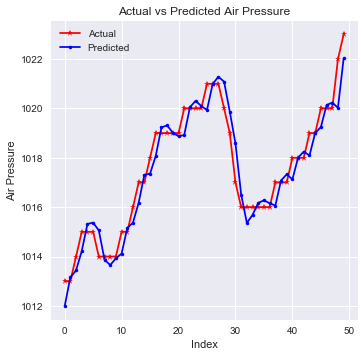

In [29]:
#Let's plot the first 50 actual and predicted values of air pressure.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')
plt.savefig('plots/ch5/B07887_05_11.png', format='png', dpi=300)

## Gated Recurrent Unit (GRU)
## Air Pressure

In this notebook, we will use Gated Recurrent Unit RNN to develop a time series forecasting model.
The dataset used for the examples of this notebook is on air pollution measured by concentration of
particulate matter (PM) of diameter less than or equal to 2.5 micrometers. There are other variables
such as air pressure, air temparature, dewpoint and so on.
Two time series models are developed - one on air pressure and the other on pm2.5.
The dataset has been downloaded from UCI Machine Learning Repository.

In [1]:
#https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
#set current working directory
os.chdir('D:/Practical Time Series')

In [3]:
#Read the dataset into a pandas.DataFrame
df = pd.read_csv('datasets/PRSA_data_2010.1.1-2014.12.31.csv')

In [4]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [5]:
#Let's see the first five rows of the DataFrame
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

To make sure that the rows are in the right order of date and time of observations,
a new column datetime is created from the date and time related columns of the DataFrame.
The new column consists of Python's datetime.datetime objects. The DataFrame is sorted in ascending order
over this column.

In [6]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

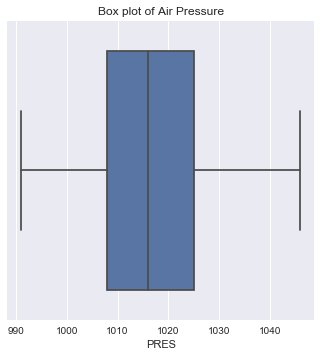

In [7]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['PRES'])
g.set_title('Box plot of Air Pressure')

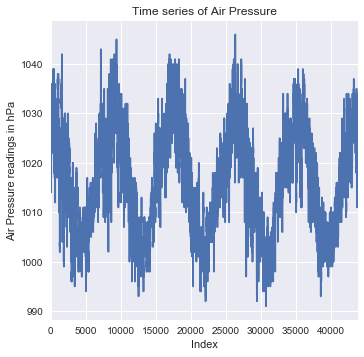

In [8]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['PRES'])
g.set_title('Time series of Air Pressure')
g.set_xlabel('Index')
g.set_ylabel('Air Pressure readings in hPa')

Gradient descent algorithms perform better (for example converge faster) if the variables are wihtin range [-1, 1]. The PRES variable is minmax scaled as shown in the following cell in order to bound the scaled features within [0, 1].

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1, 1))

Before training the model, the dataset is split in two parts - train set and validation set.
The neural network is trained on the train set. This means computation of the loss function, back propagation
and weights updated by a gradient descent algorithm is done on the train set. The validation set is
used to evaluate the model and to determine the number of epochs in model training. Increasing the number of 
epochs will further decrease the loss function on the train set but might not neccesarily have the same effect
for the validation set due to overfitting on the train set.Hence, the number of epochs is controlled by keeping
a tap on the loss function computed for the validation set. We use Keras with Tensorflow backend to define and train
the model. All the steps involved in model training and validation is done by calling appropriate functions
of the Keras API.

In [10]:
"""
Let's start by splitting the dataset into train and validation. The dataset's time period if from
Jan 1st, 2010 to Dec 31st, 2014. The first fours years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (35064, 15)
Shape of test: (8760, 15)


In [11]:
#First five rows of train
df_train.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  \
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0   
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0   
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0   
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0   
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0   

             datetime  scaled_PRES  
0 2010-01-01 00:00:00     0.545455  
1 2010-01-01 01:00:00     0.527273  
2 2010-01-01 02:00:00     0.509091  
3 2010-01-01 03:00:00     0.509091  
4 2010-01-01 04:00:00     0.490909

In [12]:
#First five rows of validation
df_val.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
35064  35065  2014      1    1     0   24.0   -20   7.0  1014.0   NW  143.48   
35065  35066  2014      1    1     1   53.0   -20   7.0  1013.0   NW  147.50   
35066  35067  2014      1    1     2   65.0   -20   6.0  1013.0   NW  151.52   
35067  35068  2014      1    1     3   70.0   -20   6.0  1013.0   NW  153.31   
35068  35069  2014      1    1     4   79.0   -18   3.0  1012.0   cv    0.89   

       Is  Ir            datetime  scaled_PRES  
35064   0   0 2014-01-01 00:00:00     0.418182  
35065   0   0 2014-01-01 01:00:00     0.400000  
35066   0   0 2014-01-01 02:00:00     0.400000  
35067   0   0 2014-01-01 03:00:00     0.400000  
35068   0   0 2014-01-01 04:00:00     0.381818

In [13]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)

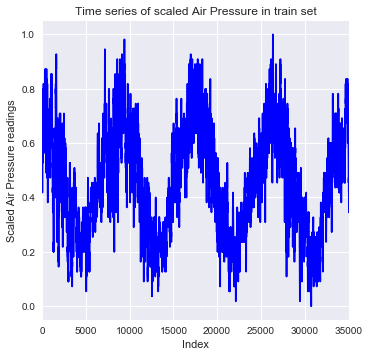

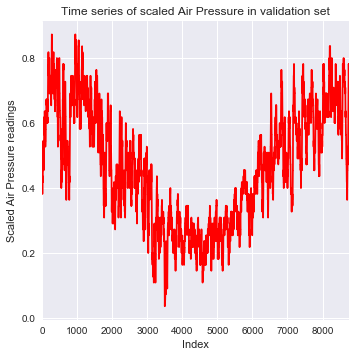

In [14]:
"""
The train and validation time series of standardized PRES is also plotted.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_PRES'], color='b')
g.set_title('Time series of scaled Air Pressure in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_PRES'], color='r')
g.set_title('Time series of scaled Air Pressure in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings')

Now we need to generate regressors (X) and target variable (y) for train and validation. 2-D array of regressor and 1-D array of target is created from the original 1-D array of columm scaled_PRES in the DataFrames. For the time series forecasting model, Past seven days of observations are used to predict for the next day. This is equivalent to a AR(7) model. We define a function which takes the original time series and the number of timesteps in regressors as input to generate the arrays of X and y.

In [15]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [16]:
X_train, y_train = makeXy(df_train['scaled_PRES'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (35057, 7) (35057,)


In [17]:
X_val, y_val = makeXy(df_val['scaled_PRES'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8753, 7) (8753,)


The input to RNN layers must be of shape (number of samples, number of timesteps, number of features per timestep). In this case we are modeling only pm2.5 hence number of features per timestep is one. Number of timesteps is seven and number of samples is same as the number of samples in X_train and X_val, which are reshaped to 3D arrays.

In [18]:
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of 3D arrays:', X_train.shape, X_val.shape)

Shape of 3D arrays: (35057, 7, 1) (8753, 7, 1)


Now we define the MLP using the Keras Functional API. In this approach a layer can be declared as the input of the following layer at the time of defining the next layer. 

In [19]:
from keras.layers import Dense, Input, Dropout
from keras.layers.recurrent import GRU
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [20]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,1), dtype='float32')

In [21]:
#LSTM layer is defined for seven timesteps
gru_layer = GRU(64, input_shape=(7,1), return_sequences=False)(input_layer)

In [22]:
dropout_layer = Dropout(0.2)(gru_layer)

In [23]:
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)

The input, dense and output layers will now be packed inside a Model, which is wrapper class for training and making
predictions. Mean square error (mse) is used as the loss function.

The network's weights are optimized by the Adam algorithm. Adam stands for adaptive moment estimation
and has been a popular choice for training deep neural networks. Unlike, stochastic gradient descent, adam uses
different learning rates for each weight and separately updates the same as the training progresses. The learning rate of a weight is updated based on exponentially weighted moving averages of the weight's gradients and the squared gradients.

In [24]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mse', optimizer='adam')
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7, 1)              0         
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                12672     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 12,737
Trainable params: 12,737
Non-trainable params: 0
_________________________________________________________________


In [25]:
"""
The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.
"""
save_weights_at = os.path.join('keras_models', 'PRSA_data_Air_Pressure_GRU_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 35057 samples, validate on 8753 samples
Epoch 1/20
35057/35057 [==============================] - 16s - loss: 0.0020 - val_loss: 3.3810e-04
Epoch 2/20
35057/35057 [==============================] - 23s - loss: 6.2747e-04 - val_loss: 1.4782e-04
Epoch 3/20
35057/35057 [==============================] - 19s - loss: 3.9528e-04 - val_loss: 1.5410e-04
Epoch 4/20
35057/35057 [==============================] - 12s - loss: 3.2953e-04 - val_loss: 1.4294e-04
Epoch 5/20
35057/35057 [==============================] - 13s - loss: 3.1658e-04 - val_loss: 1.4473e-04
Epoch 6/20
35057/35057 [==============================] - 11s - loss: 3.1082e-04 - val_loss: 1.4149e-04
Epoch 7/20
35057/35057 [==============================] - 12s - loss: 3.0778e-04 - val_loss: 2.3025e-04
Epoch 8/20
35057/35057 [==============================] - 12s - loss: 3.1214e-04 - val_loss: 1.6912e-04
Epoch 9/20
35057/35057 [==============================] - 12s - loss: 3.0986e-04 - val_loss: 1.4575e-04
Epoch 10/20
35057/3

Prediction are made for the air pressure from the best saved model. The model's predictions, which are on the minmax scaled  air-pressure, are inverse transformed to get predictions on original air pressure. The goodness-of-fit, R-squared is also calculated for the predictions on the original variable.

In [27]:
best_model = load_model(os.path.join('keras_models', 'PRSA_data_Air_Pressure_GRU_weights.17-0.0001.hdf5'))
preds = best_model.predict(X_val)
pred_PRES = scaler.inverse_transform(preds)
pred_PRES = np.squeeze(pred_PRES)

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(df_val['PRES'].loc[7:], pred_PRES)
print('R-squared on validation set of the original air pressure:', r2)

R-squared on validation set of the original air pressure: 0.995799194476


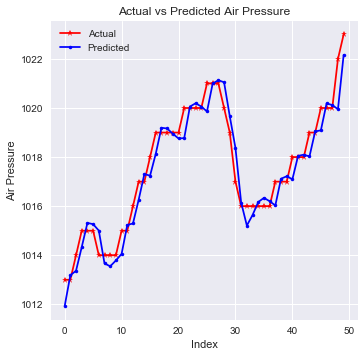

In [29]:
#Let's plot the first 50 actual and predicted values of air pressure.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Air Pressure')
plt.ylabel('Air Pressure')
plt.xlabel('Index')

## Chapter 5: Convolutional neural networks (CNNs) (1D Convolution)
## Air Pressure

In this notebook, we will use a multi-layer perceptron to develop time series forecasting models.
The dataset used for the examples of this notebook is on air pollution measured by concentration of
particulate matter (PM) of diameter less than or equal to 2.5 micrometers. There are other variables
such as air pressure, air temparature, dewpoint and so on.
Two time series models are developed - one on air pressure and the other on pm2.5.
The dataset has been downloaded from UCI Machine Learning Repository.

In [ ]:
#https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
#set current working directory
os.chdir('D:/Practical Time Series')

In [3]:
#Read the dataset into a pandas.DataFrame
df = pd.read_csv('datasets/PRSA_data_2010.1.1-2014.12.31.csv')

In [4]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [5]:
#Let's see the first five rows of the DataFrame
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

To make sure that the rows are in the right order of date and time of observations,
a new column datetime is created from the date and time related columns of the DataFrame.
The new column consists of Python's datetime.datetime objects. The DataFrame is sorted in ascending order
over this column.

In [6]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

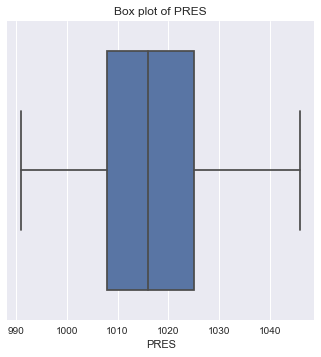

In [7]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['PRES'])
g.set_title('Box plot of PRES')

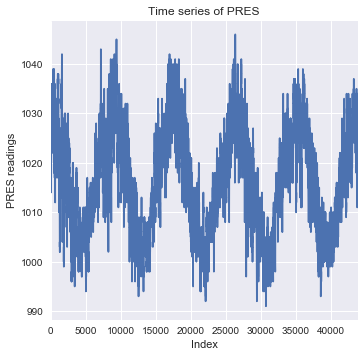

In [8]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['PRES'])
g.set_title('Time series of PRES')
g.set_xlabel('Index')
g.set_ylabel('PRES readings')

Gradient descent algorithms perform better (for example converge faster) if the variables are wihtin range [-1, 1]. Many sources relax the boundary to even [-3, 3]. The PRES variable is mixmax scaled to bound the tranformed variable within [0,1].

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1, 1))

Before training the model, the dataset is split in two parts - train set and validation set.
The neural network is trained on the train set. This means computation of the loss function, back propagation
and weights updated by a gradient descent algorithm is done on the train set. The validation set is
used to evaluate the model and to determine the number of epochs in model training. Increasing the number of 
epochs will further decrease the loss function on the train set but might not neccesarily have the same effect
for the validation set due to overfitting on the train set.Hence, the number of epochs is controlled by keeping
a tap on the loss function computed for the validation set. We use Keras with Tensorflow backend to define and train
the model. All the steps involved in model training and validation is done by calling appropriate functions
of the Keras API.

In [10]:
"""
Let's start by splitting the dataset into train and validation. The dataset's time period if from
Jan 1st, 2010 to Dec 31st, 2014. The first fours years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (35064, 15)
Shape of test: (8760, 15)


In [11]:
#First five rows of train
df_train.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  \
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0   
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0   
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0   
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0   
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0   

             datetime  scaled_PRES  
0 2010-01-01 00:00:00     0.545455  
1 2010-01-01 01:00:00     0.527273  
2 2010-01-01 02:00:00     0.509091  
3 2010-01-01 03:00:00     0.509091  
4 2010-01-01 04:00:00     0.490909

In [12]:
#First five rows of validation
df_val.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
35064  35065  2014      1    1     0   24.0   -20   7.0  1014.0   NW  143.48   
35065  35066  2014      1    1     1   53.0   -20   7.0  1013.0   NW  147.50   
35066  35067  2014      1    1     2   65.0   -20   6.0  1013.0   NW  151.52   
35067  35068  2014      1    1     3   70.0   -20   6.0  1013.0   NW  153.31   
35068  35069  2014      1    1     4   79.0   -18   3.0  1012.0   cv    0.89   

       Is  Ir            datetime  scaled_PRES  
35064   0   0 2014-01-01 00:00:00     0.418182  
35065   0   0 2014-01-01 01:00:00     0.400000  
35066   0   0 2014-01-01 02:00:00     0.400000  
35067   0   0 2014-01-01 03:00:00     0.400000  
35068   0   0 2014-01-01 04:00:00     0.381818

In [13]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)

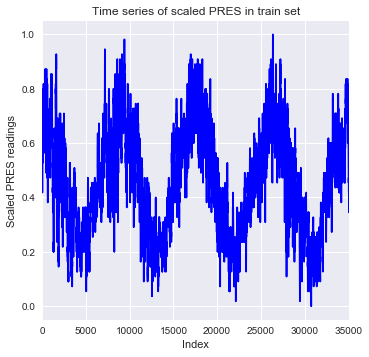

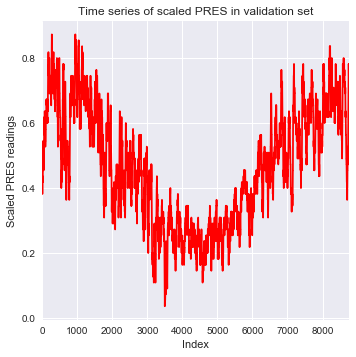

In [14]:
"""
The train and validation time series of scaled PRES is also plotted.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_PRES'], color='b')
g.set_title('Time series of scaled PRES in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled PRES readings')

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_PRES'], color='r')
g.set_title('Time series of scaled PRES in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled PRES readings')

Now we need to generate regressors (X) and target variable (y) for train and validation. 2-D array of regressor and 1-D array of target is created from the original 1-D array of columm standardized_PRES in the DataFrames. For the time series forecasting model, Past seven days of observations are used to predict for the next day. This is equivalent to a AR(7) model. We define a function which takes the original time series and the number of timesteps in regressors as input to generate the arrays of X and y.

In [15]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [16]:
X_train, y_train = makeXy(df_train['scaled_PRES'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (35057, 7) (35057,)


In [17]:
X_val, y_val = makeXy(df_val['scaled_PRES'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8753, 7) (8753,)


The input to convolution layers must be of shape (number of samples, number of timesteps, number of features per timestep). In this case we are modeling only PRES hence number of features per timestep is one. Number of timesteps is seven and number of samples is same as the number of samples in X_train and X_val, which are reshaped to 3D arrays.

In [18]:
#X_train and X_val are reshaped to 3D arrays
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),\
                 X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)

Shape of arrays after reshaping: (35057, 7, 1) (8753, 7, 1)


Now we define the MLP using the Keras Functional API. In this approach a layer can be declared as the input of the following layer at the time of defining the next layer. 

In [19]:
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import ZeroPadding1D
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import AveragePooling1D
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [20]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,1), dtype='float32')

ZeroPadding1D layer is added next to add zeros at the beginning and end of each series. Zeropadding ensure that the downstream convolution layer does not reduce the dimension of the output sequences. Pooling layer, added after the convolution layer is used to downsampling the input.

In [21]:
#Add zero padding
zeropadding_layer = ZeroPadding1D(padding=1)(input_layer)

The first argument of Conv1D is the number of filters, which determine the number of features in the output. Second argument indicates length of the 1D convolution window. The third argument is strides and represent the number of places to shift the convolution window. Lastly, setting use_bias as True, add a bias value during computation of an output feature. Here, the 1D convolution can be thought of as generating local AR models over rolling window of three time units.

In [22]:
#Add 1D convolution layer
conv1D_layer = Conv1D(64, 3, strides=1, use_bias=True)(zeropadding_layer)

AveragePooling1D is added next to downsample the input by taking average over pool size of three with stride of one timesteps. The average pooling in this case can be thought of as taking moving averages over a rolling window of three time units. We have used average pooling instead of max pooling to generate the moving averages.

In [23]:
#Add AveragePooling1D layer
avgpooling_layer = AveragePooling1D(pool_size=3, strides=1)(conv1D_layer)

The preceeding pooling layer returns 3D output. Hence before passing to the output layer, a Flatten layer is added. The Flatten layer reshapes the input to (number of samples, number of timesteps*number of features per timestep), which is then fed to the output layer

In [24]:
#Add Flatten layer
flatten_layer = Flatten()(avgpooling_layer)

In [25]:
dropout_layer = Dropout(0.2)(flatten_layer)

In [26]:
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)

The input, dense and output layers will now be packed inside a Model, which is wrapper class for training and making
predictions. Mean squared error (MSE) is used as the loss function.

The network's weights are optimized by the Adam algorithm. Adam stands for adaptive moment estimation
and has been a popular choice for training deep neural networks. Unlike, stochastic gradient descent, adam uses
different learning rates for each weight and separately updates the same as the training progresses. The learning rate of a weight is updated based on exponentially weighted moving averages of the weight's gradients and the squared gradients.

In [27]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')#SGD(lr=0.001, decay=1e-5))
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7, 1)              0         
_________________________________________________________________
zero_padding1d_1 (ZeroPaddin (None, 9, 1)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 64)             256       
_________________________________________________________________
average_pooling1d_1 (Average (None, 5, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 321       
Total para

The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.

In [28]:
save_weights_at = os.path.join('keras_models', 'PRSA_data_Air_Pressure_1DConv_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 35057 samples, validate on 8753 samples
Epoch 1/20
35057/35057 [==============================] - 3s - loss: 0.0277 - val_loss: 0.0182
Epoch 2/20
35057/35057 [==============================] - 3s - loss: 0.0176 - val_loss: 0.0116
Epoch 3/20
35057/35057 [==============================] - 5s - loss: 0.0156 - val_loss: 0.0368
Epoch 4/20
35057/35057 [==============================] - 3s - loss: 0.0147 - val_loss: 0.0114
Epoch 5/20
35057/35057 [==============================] - 4s - loss: 0.0141 - val_loss: 0.0109
Epoch 6/20
35057/35057 [==============================] - 3s - loss: 0.0139 - val_loss: 0.0159
Epoch 7/20
35057/35057 [==============================] - 3s - loss: 0.0136 - val_loss: 0.0169
Epoch 8/20
35057/35057 [==============================] - 3s - loss: 0.0137 - val_loss: 0.0159
Epoch 9/20
35057/35057 [==============================] - 3s - loss: 0.0136 - val_loss: 0.0101
Epoch 10/20
35057/35057 [==============================] - 3s - loss: 0.0135 - val_loss: 0.0110


Prediction are made for the PRES from the best saved model. The model's predictions, which are on the standardized  PRES, are inverse transformed to get predictions of original PRES.

In [30]:
best_model = load_model(os.path.join('keras_models', 'PRSA_data_Air_Pressure_1DConv_weights.16-0.0097.hdf5'))
preds = best_model.predict(X_val)
pred_PRES = np.squeeze(scaler.inverse_transform(preds))

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2 = r2_score(df_val['PRES'].loc[7:], pred_PRES)
print('R-squared for the validation set:', round(r2, 4))

R-squared for the validation set: 0.995


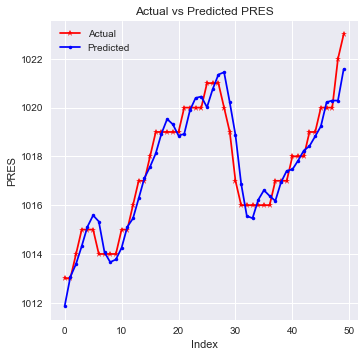

In [34]:
#Let's plot the first 50 actual and predicted values of PRES.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted PRES')
plt.ylabel('PRES')
plt.xlabel('Index')

# Chapter 5: Deep Learning for Time Series Forecasting

In this notebook, we will use a multi-layer perceptron to develop time series forecasting models.
The dataset used for the examples of this notebook is on air pollution measured by concentration of
particulate matter (PM) of diameter less than or equal to 2.5 micrometers. There are other variables
such as air pressure, air temperature, dew point and so on.
Two time series models are developed - one on air pressure and the other on pm2.5.
The dataset has been downloaded from UCI Machine Learning Repository.

In [ ]:
#https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

## Chapter 5: Multi-layer perceptrons (MLP)
## PM 2.5

In [39]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [40]:
#set current working directory
os.chdir('D:/Practical Time Series')

In [41]:
#Read the dataset into a pandas.DataFrame
df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

In [42]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [43]:
#Let's see the first five rows of the DataFrame
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

In [44]:
"""
Rows having NaN values in column pm2.5 are dropped.
"""
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

To make sure that the rows are in the right order of date and time of observations,
a new column datetime is created from the date and time related columns of the DataFrame.
The new column consists of Python's datetime.datetime objects. The DataFrame is sorted in ascending order
over this column.

In [45]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

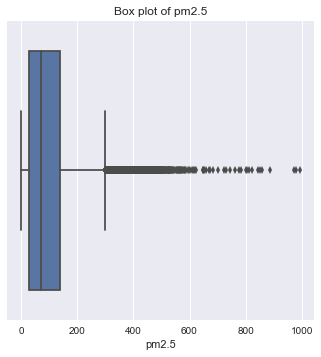

In [46]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['pm2.5'])
g.set_title('Box plot of pm2.5')
plt.savefig('plots/ch5/B07887_05_06.png', format='png', dpi=300)

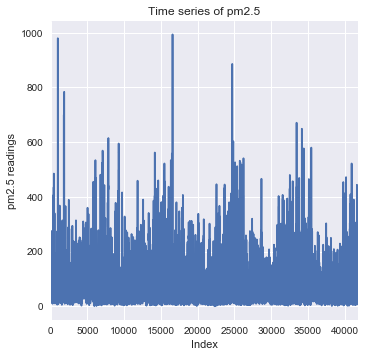

In [47]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'])
g.set_title('Time series of pm2.5')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')
plt.savefig('plots/ch5/B07887_05_10.png', format='png', dpi=300)

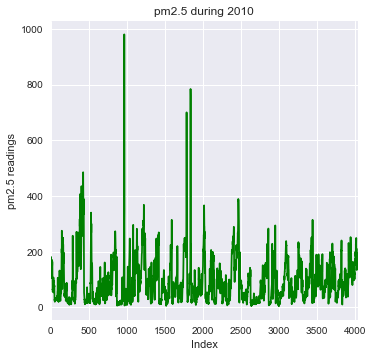

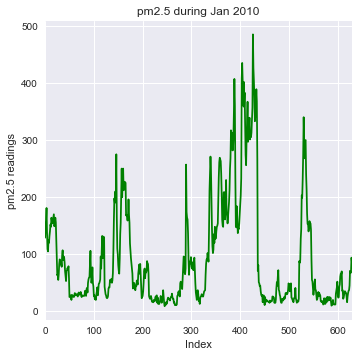

In [48]:
#Let's plot the series for six months to check if any pattern apparently exists.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=6,day=30)], color='g')
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')
plt.savefig('plots/ch5/B07887_05_07.png', format='png', dpi=300)

#Let's zoom in on one month.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=1,day=31)], color='g')
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')
plt.savefig('plots/ch5/B07887_05_08.png', format='png', dpi=300)

Gradient descent algorithms perform better (for example converge faster) if the variables are wihtin range [-1, 1]. Many sources relax the boundary to even [-3, 3]. The pm2.5 variable is mixmax scaled to bound the tranformed variable within [0,1].

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1))

Before training the model, the dataset is split in two parts - train set and validation set.
The neural network is trained on the train set. This means computation of the loss function, back propagation
and weights updated by a gradient descent algorithm is done on the train set. The validation set is
used to evaluate the model and to determine the number of epochs in model training. Increasing the number of 
epochs will further decrease the loss function on the train set but might not neccesarily have the same effect
for the validation set due to overfitting on the train set.Hence, the number of epochs is controlled by keeping
a tap on the loss function computed for the validation set. We use Keras with Tensorflow backend to define and train
the model. All the steps involved in model training and validation is done by calling appropriate functions
of the Keras API.

In [50]:
"""
Let's start by splitting the dataset into train and validation. The dataset's time period if from
Jan 1st, 2010 to Dec 31st, 2014. The first fours years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [51]:
#First five rows of train
df_train.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  Is  Ir  \
0  25  2010      1    2     0  129.0   -16  -4.0  1020.0   SE  1.79   0   0   
1  26  2010      1    2     1  148.0   -15  -4.0  1020.0   SE  2.68   0   0   
2  27  2010      1    2     2  159.0   -11  -5.0  1021.0   SE  3.57   0   0   
3  28  2010      1    2     3  181.0    -7  -5.0  1022.0   SE  5.36   1   0   
4  29  2010      1    2     4  138.0    -7  -5.0  1022.0   SE  6.25   2   0   

             datetime  scaled_pm2.5  
0 2010-01-02 00:00:00      0.129779  
1 2010-01-02 01:00:00      0.148893  
2 2010-01-02 02:00:00      0.159960  
3 2010-01-02 03:00:00      0.182093  
4 2010-01-02 04:00:00      0.138833

In [52]:
#First five rows of validation
df_val.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
33096  35065  2014      1    1     0   24.0   -20   7.0  1014.0   NW  143.48   
33097  35066  2014      1    1     1   53.0   -20   7.0  1013.0   NW  147.50   
33098  35067  2014      1    1     2   65.0   -20   6.0  1013.0   NW  151.52   
33099  35068  2014      1    1     3   70.0   -20   6.0  1013.0   NW  153.31   
33100  35069  2014      1    1     4   79.0   -18   3.0  1012.0   cv    0.89   

       Is  Ir            datetime  scaled_pm2.5  
33096   0   0 2014-01-01 00:00:00      0.024145  
33097   0   0 2014-01-01 01:00:00      0.053320  
33098   0   0 2014-01-01 02:00:00      0.065392  
33099   0   0 2014-01-01 03:00:00      0.070423  
33100   0   0 2014-01-01 04:00:00      0.079477

In [53]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)

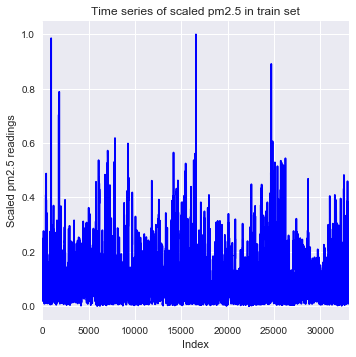

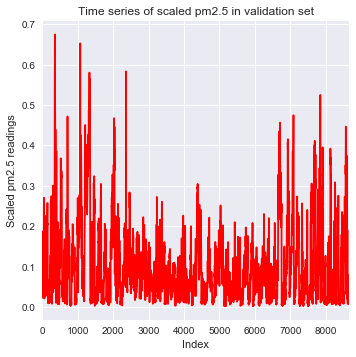

In [54]:
"""
The train and validation time series of scaled pm2.5 is also plotted.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_pm2.5'], color='b')
g.set_title('Time series of scaled pm2.5 in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_pm2.5'], color='r')
g.set_title('Time series of scaled pm2.5 in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

Now we need to generate regressors (X) and target variable (y) for train and validation. 2-D array of regressor and 1-D array of target is created from the original 1-D array of columm log_PRES in the DataFrames. For the time series forecasting model, Past seven days of observations are used to predict for the next day. This is equivalent to a AR(7) model. We define a function which takes the original time series and the number of timesteps in regressors as input to generate the arrays of X and y.

In [55]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [56]:
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [57]:
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8654, 7) (8654,)


Now we define the MLP using the Keras Functional API. In this approach a layer can be declared as the input of the following layer at the time of defining the next layer. 

In [58]:
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [59]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,), dtype='float32')

In [60]:
#Dense layers are defined with linear activation
dense1 = Dense(32, activation='tanh')(input_layer)
dense2 = Dense(16, activation='tanh')(dense1)
dense3 = Dense(16, activation='tanh')(dense2)

Multiple hidden layers and large number of neurons in each hidden layer gives neural networks the ability to model complex non-linearity of the underlying relations between regressors and target. However, deep neural networks can also overfit train data and give poor results on validation or test set. Dropout has been effectively used to regularize deep neural networks. In this example, a Dropout layer is added before the output layer. Dropout randomly sets p fraction of input neurons to zero before passing to the next layer. Randomly dropping inputs essentially acts as a bootstrap aggregating or bagging type of model ensembling. Random forest uses bagging by building trees on random subsets of input features. We use p=0.2 to dropout 20% of randomly selected input features.

In [61]:
dropout_layer = Dropout(0.2)(dense3)

In [62]:
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)

The input, dense and output layers will now be packed inside a Model, which is wrapper class for training and making
predictions. The box plot of pm2.5 shows the presence of outliers. Hence, mean absolute error (MAE) is used as absolute deviations suffer less fluctuations compared to squared deviations.

The network's weights are optimized by the Adam algorithm. Adam stands for adaptive moment estimation
and has been a popular choice for training deep neural networks. Unlike, stochastic gradient descent, adam uses
different learning rates for each weight and separately updates the same as the training progresses. The learning rate of a weight is updated based on exponentially weighted moving averages of the weight's gradients and the squared gradients.

In [63]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.

In [64]:
save_weights_at = os.path.join('keras_models', 'PRSA_data_PM2.5_MLP_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 33089 samples, validate on 8654 samples
Epoch 1/20
33089/33089 [==============================] - 3s - loss: 0.0190 - val_loss: 0.0199
Epoch 2/20
33089/33089 [==============================] - 3s - loss: 0.0165 - val_loss: 0.0117
Epoch 3/20
33089/33089 [==============================] - 3s - loss: 0.0163 - val_loss: 0.0123
Epoch 4/20
33089/33089 [==============================] - 2s - loss: 0.0162 - val_loss: 0.0162
Epoch 5/20
33089/33089 [==============================] - 3s - loss: 0.0161 - val_loss: 0.0124
Epoch 6/20
33089/33089 [==============================] - 4s - loss: 0.0161 - val_loss: 0.0132
Epoch 7/20
33089/33089 [==============================] - 3s - loss: 0.0160 - val_loss: 0.0140
Epoch 8/20
33089/33089 [==============================] - 3s - loss: 0.0161 - val_loss: 0.0133
Epoch 9/20
33089/33089 [==============================] - 3s - loss: 0.0161 - val_loss: 0.0120
Epoch 10/20
33089/33089 [==============================] - 2s - loss: 0.0160 - val_loss: 0.0122


Prediction are made for the pm2.5 from the best saved model. The model's predictions, which are on the scaled pm2.5, are inverse transformed to get predictions of original pm2.5.

In [66]:
best_model = load_model(os.path.join('keras_models', 'PRSA_data_PM2.5_MLP_weights.01-0.0117.hdf5'))
preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)

In [67]:
from sklearn.metrics import mean_absolute_error

In [68]:
mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))

MAE for the validation set: 11.6757


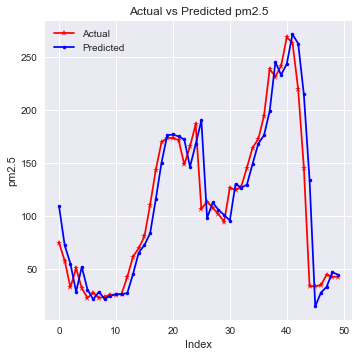

In [69]:
#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')
plt.savefig('B07887_05_09.png', format='png', dpi=300)

## Chapter 5: Recurrent Neural Networks (RNN)
## Long Short Term Memory (LSTM)
## PM 2.5

In this notebook, we will use LSTM layers to develop time series forecasting models.
The dataset used for the examples of this notebook is on air pollution measured by concentration of
particulate matter (PM) of diameter less than or equal to 2.5 micrometers. There are other variables
such as air pressure, air temparature, dewpoint and so on.
Two time series models are developed - one on air pressure and the other on pm2.5.
The dataset has been downloaded from UCI Machine Learning Repository.


In [2]:
#https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
#set current working directory
os.chdir('D:/Practical Time Series')

In [3]:
#Read the dataset into a pandas.DataFrame
df = pd.read_csv('datasets/PRSA_data_2010.1.1-2014.12.31.csv')

In [4]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [5]:
#Let's see the first five rows of the DataFrame
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

In [6]:
"""
Rows having NaN values in column pm2.5 are dropped.
"""
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

To make sure that the rows are in the right order of date and time of observations,
a new column datetime is created from the date and time related columns of the DataFrame.
The new column consists of Python's datetime.datetime objects. The DataFrame is sorted in ascending order
over this column.

In [7]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

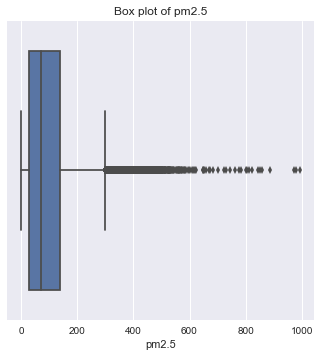

In [8]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['pm2.5'])
g.set_title('Box plot of pm2.5')

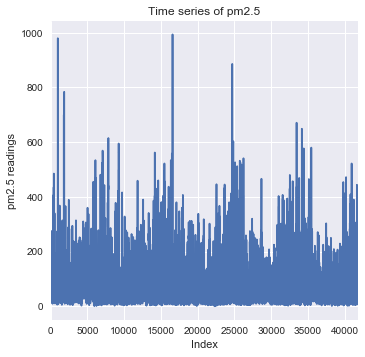

In [9]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'])
g.set_title('Time series of pm2.5')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

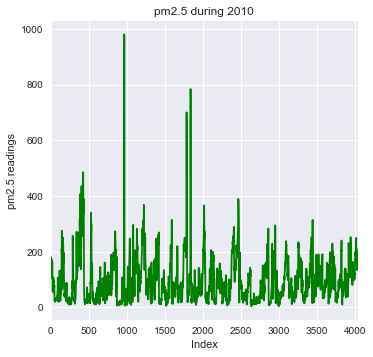

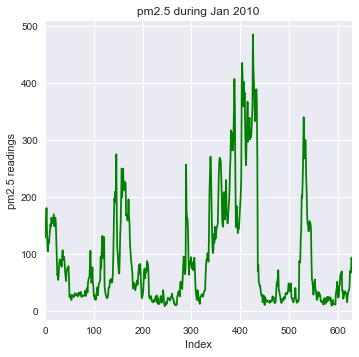

In [10]:
#Let's plot the series for six months to check if any pattern apparently exists.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=6,day=30)], color='g')
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

#Let's zoom in on one month.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=1,day=31)], color='g')
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

Gradient descent algorithms perform better (for example converge faster) if the variables are wihtin range [-1, 1]. Many sources relax the boundary to even [-3, 3]. The pm2.5 variable is mixmax scaled to bound the tranformed variable within [0,1].

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1))

Before training the model, the dataset is split in two parts - train set and validation set.
The neural network is trained on the train set. This means computation of the loss function, back propagation
and weights updated by a gradient descent algorithm is done on the train set. The validation set is
used to evaluate the model and to determine the number of epochs in model training. Increasing the number of 
epochs will further decrease the loss function on the train set but might not neccesarily have the same effect
for the validation set due to overfitting on the train set.Hence, the number of epochs is controlled by keeping
a tap on the loss function computed for the validation set. We use Keras with Tensorflow backend to define and train
the model. All the steps involved in model training and validation is done by calling appropriate functions
of the Keras API.

In [12]:
"""
Let's start by splitting the dataset into train and validation. The dataset's time period if from
Jan 1st, 2010 to Dec 31st, 2014. The first fours years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [13]:
#First five rows of train
df_train.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  Is  Ir  \
0  25  2010      1    2     0  129.0   -16  -4.0  1020.0   SE  1.79   0   0   
1  26  2010      1    2     1  148.0   -15  -4.0  1020.0   SE  2.68   0   0   
2  27  2010      1    2     2  159.0   -11  -5.0  1021.0   SE  3.57   0   0   
3  28  2010      1    2     3  181.0    -7  -5.0  1022.0   SE  5.36   1   0   
4  29  2010      1    2     4  138.0    -7  -5.0  1022.0   SE  6.25   2   0   

             datetime  scaled_pm2.5  
0 2010-01-02 00:00:00      0.129779  
1 2010-01-02 01:00:00      0.148893  
2 2010-01-02 02:00:00      0.159960  
3 2010-01-02 03:00:00      0.182093  
4 2010-01-02 04:00:00      0.138833

In [14]:
#First five rows of validation
df_val.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
33096  35065  2014      1    1     0   24.0   -20   7.0  1014.0   NW  143.48   
33097  35066  2014      1    1     1   53.0   -20   7.0  1013.0   NW  147.50   
33098  35067  2014      1    1     2   65.0   -20   6.0  1013.0   NW  151.52   
33099  35068  2014      1    1     3   70.0   -20   6.0  1013.0   NW  153.31   
33100  35069  2014      1    1     4   79.0   -18   3.0  1012.0   cv    0.89   

       Is  Ir            datetime  scaled_pm2.5  
33096   0   0 2014-01-01 00:00:00      0.024145  
33097   0   0 2014-01-01 01:00:00      0.053320  
33098   0   0 2014-01-01 02:00:00      0.065392  
33099   0   0 2014-01-01 03:00:00      0.070423  
33100   0   0 2014-01-01 04:00:00      0.079477

In [15]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)

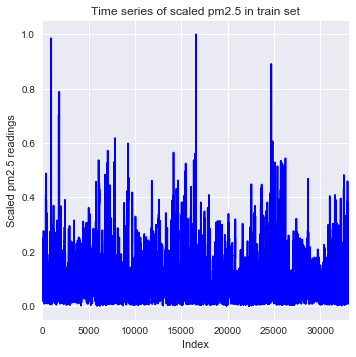

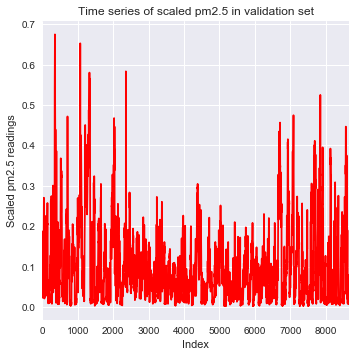

In [16]:
"""
The train and validation time series of scaled_pm2.5 is also plotted.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_pm2.5'], color='b')
g.set_title('Time series of scaled pm2.5 in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_pm2.5'], color='r')
g.set_title('Time series of scaled pm2.5 in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

Now we need to generate regressors (X) and target variable (y) for train and validation. 2-D array of regressor and 1-D array of target is created from the original 1-D array of columm log_PRES in the DataFrames. For the time series forecasting model, Past seven days of observations are used to predict for the next day. This is equivalent to a AR(7) model. We define a function which takes the original time series and the number of timesteps in regressors as input to generate the arrays of X and y.

In [17]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [18]:
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [19]:
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8654, 7) (8654,)


In [20]:
#X_train and X_val are reshaped to 3D arrays
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)

Shape of arrays after reshaping: (33089, 7, 1) (8654, 7, 1)


Now we define the MLP using the Keras Functional API. In this approach a layer can be declared as the input of the following layer at the time of defining the next layer. 

In [21]:
from keras.layers import Dense, Input, Dropout
from keras.layers.recurrent import LSTM
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [22]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,1), dtype='float32')

The LSTM layers are defined for seven timesteps. In this example, two LSTM layers are stacked. The first LSTM returns the output from each all seven timesteps. This output is a sequence and is fed to the second LSTM which returns output only from the last step. The first LSTM has sixty four hidden neurons in each timestep. Hence the sequence returned by the first LSTM has sixty four features.

In [23]:
lstm_layer1 = LSTM(64, input_shape=(7,1), return_sequences=True)(input_layer)
lstm_layer2 = LSTM(32, input_shape=(7,64), return_sequences=False)(lstm_layer1)

In [24]:
dropout_layer = Dropout(0.2)(lstm_layer2)

In [25]:
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)

The input, dense and output layers will now be packed inside a Model, which is wrapper class for training and making
predictions. The box plot of pm2.5 shows the presence of outliers. Hence, mean absolute error (MAE) is used as absolute deviations suffer less fluctuations compared to squared deviations.

The network's weights are optimized by the Adam algorithm. Adam stands for adaptive moment estimation
and has been a popular choice for training deep neural networks. Unlike, stochastic gradient descent, adam uses
different learning rates for each weight and separately updates the same as the training progresses. The learning rate of a weight is updated based on exponentially weighted moving averages of the weight's gradients and the squared gradients.

In [26]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')#SGD(lr=0.001, decay=1e-5))
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7, 1)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 64)             16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.

In [27]:
save_weights_at = os.path.join('keras_models', 'PRSA_data_PM2.5_LSTM_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 33089 samples, validate on 8654 samples
Epoch 1/20
33089/33089 [==============================] - 26s - loss: 0.0191 - val_loss: 0.0127
Epoch 2/20
33089/33089 [==============================] - 28s - loss: 0.0151 - val_loss: 0.0125
Epoch 3/20
33089/33089 [==============================] - 27s - loss: 0.0150 - val_loss: 0.0118
Epoch 4/20
33089/33089 [==============================] - 26s - loss: 0.0150 - val_loss: 0.0118
Epoch 5/20
33089/33089 [==============================] - 25s - loss: 0.0149 - val_loss: 0.0121
Epoch 6/20
33089/33089 [==============================] - 23s - loss: 0.0148 - val_loss: 0.0127
Epoch 7/20
33089/33089 [==============================] - 23s - loss: 0.0148 - val_loss: 0.0122
Epoch 8/20
33089/33089 [==============================] - 22s - loss: 0.0148 - val_loss: 0.0129
Epoch 9/20
33089/33089 [==============================] - 22s - loss: 0.0148 - val_loss: 0.0121
Epoch 10/20
33089/33089 [==============================] - 22s - loss: 0.0148 - val_los

Prediction are made for the pm2.5 from the best saved model. The model's predictions, which are on the standardized  pm2.5, are inverse transformed to get predictions of original pm2.5.

In [29]:
best_model = load_model(os.path.join('keras_models', 'PRSA_data_PM2.5_LSTM_weights.09-0.0117.hdf5'))
preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))

MAE for the validation set: 11.5804


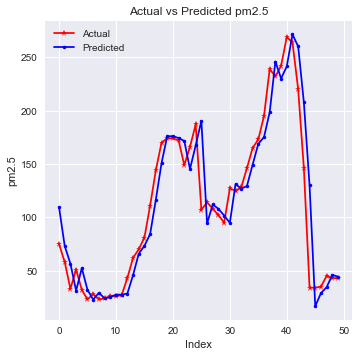

In [32]:
#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')

## Gated Recurrent Unit (GRU)
## PM 2.5

In this notebook, we will use Gated Recurrent Units to develop time series forecasting models.
The dataset used for the examples of this notebook is on air pollution measured by concentration of
particulate matter (PM) of diameter less than or equal to 2.5 micrometers. There are other variables
such as air pressure, air temparature, dewpoint and so on.
Two time series models are developed - one on air pressure and the other on pm2.5.
The dataset has been downloaded from UCI Machine Learning Repository.

In [1]:
#https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
#set current working directory
os.chdir('D:/Practical Time Series')

In [3]:
#Read the dataset into a pandas.DataFrame
df = pd.read_csv('datasets/PRSA_data_2010.1.1-2014.12.31.csv')

In [4]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [5]:
#Let's see the first five rows of the DataFrame
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

In [6]:
"""
Rows having NaN values in column pm2.5 are dropped.
"""
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

To make sure that the rows are in the right order of date and time of observations,
a new column datetime is created from the date and time related columns of the DataFrame.
The new column consists of Python's datetime.datetime objects. The DataFrame is sorted in ascending order
over this column.

In [7]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

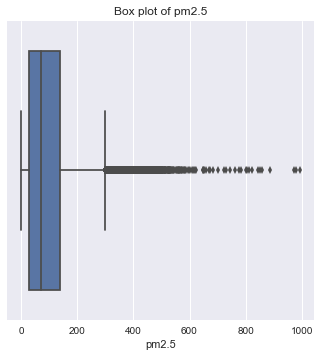

In [8]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['pm2.5'])
g.set_title('Box plot of pm2.5')

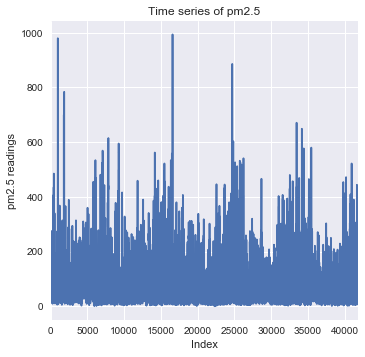

In [9]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'])
g.set_title('Time series of pm2.5')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

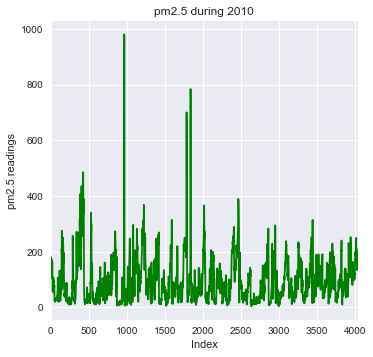

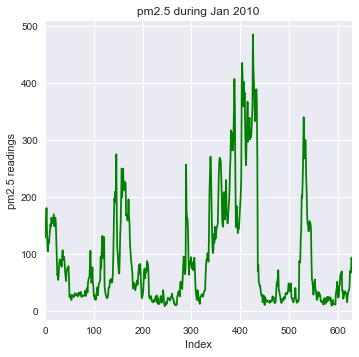

In [10]:
#Let's plot the series for six months to check if any pattern apparently exists.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=6,day=30)], color='g')
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

#Let's zoom in on one month.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=1,day=31)], color='g')
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

Gradient descent algorithms perform better (for example converge faster) if the variables are wihtin range [-1, 1]. Many sources relax the boundary to even [-3, 3]. The pm2.5 variable is mixmax scaled to bound the tranformed variable within [0,1].

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1))

Before training the model, the dataset is split in two parts - train set and validation set.
The neural network is trained on the train set. This means computation of the loss function, back propagation
and weights updated by a gradient descent algorithm is done on the train set. The validation set is
used to evaluate the model and to determine the number of epochs in model training. Increasing the number of 
epochs will further decrease the loss function on the train set but might not neccesarily have the same effect
for the validation set due to overfitting on the train set.Hence, the number of epochs is controlled by keeping
a tap on the loss function computed for the validation set. We use Keras with Tensorflow backend to define and train
the model. All the steps involved in model training and validation is done by calling appropriate functions
of the Keras API.

In [12]:
"""
Let's start by splitting the dataset into train and validation. The dataset's time period if from
Jan 1st, 2010 to Dec 31st, 2014. The first fours years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [13]:
#First five rows of train
df_train.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  Is  Ir  \
0  25  2010      1    2     0  129.0   -16  -4.0  1020.0   SE  1.79   0   0   
1  26  2010      1    2     1  148.0   -15  -4.0  1020.0   SE  2.68   0   0   
2  27  2010      1    2     2  159.0   -11  -5.0  1021.0   SE  3.57   0   0   
3  28  2010      1    2     3  181.0    -7  -5.0  1022.0   SE  5.36   1   0   
4  29  2010      1    2     4  138.0    -7  -5.0  1022.0   SE  6.25   2   0   

             datetime  scaled_pm2.5  
0 2010-01-02 00:00:00      0.129779  
1 2010-01-02 01:00:00      0.148893  
2 2010-01-02 02:00:00      0.159960  
3 2010-01-02 03:00:00      0.182093  
4 2010-01-02 04:00:00      0.138833

In [14]:
#First five rows of validation
df_val.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
33096  35065  2014      1    1     0   24.0   -20   7.0  1014.0   NW  143.48   
33097  35066  2014      1    1     1   53.0   -20   7.0  1013.0   NW  147.50   
33098  35067  2014      1    1     2   65.0   -20   6.0  1013.0   NW  151.52   
33099  35068  2014      1    1     3   70.0   -20   6.0  1013.0   NW  153.31   
33100  35069  2014      1    1     4   79.0   -18   3.0  1012.0   cv    0.89   

       Is  Ir            datetime  scaled_pm2.5  
33096   0   0 2014-01-01 00:00:00      0.024145  
33097   0   0 2014-01-01 01:00:00      0.053320  
33098   0   0 2014-01-01 02:00:00      0.065392  
33099   0   0 2014-01-01 03:00:00      0.070423  
33100   0   0 2014-01-01 04:00:00      0.079477

In [15]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)

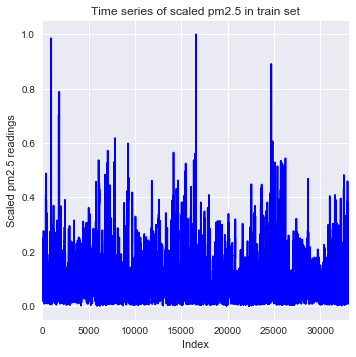

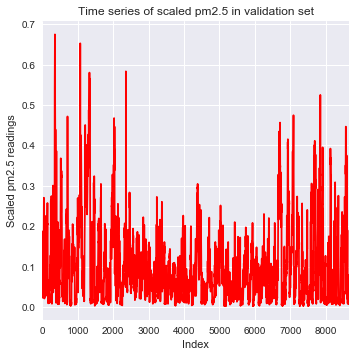

In [16]:
"""
The train and validation time series of scaled_pm2.5 is also plotted.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_pm2.5'], color='b')
g.set_title('Time series of scaled pm2.5 in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_pm2.5'], color='r')
g.set_title('Time series of scaled pm2.5 in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

Now we need to generate regressors (X) and target variable (y) for train and validation. 2-D array of regressor and 1-D array of target is created from the original 1-D array of columm standardized_pm2.5 in the DataFrames. For the time series forecasting model, Past seven days of observations are used to predict for the next day. This is equivalent to a AR(7) model. We define a function which takes the original time series and the number of timesteps in regressors as input to generate the arrays of X and y.

In [17]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [18]:
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [19]:
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8654, 7) (8654,)


The input to RNN layers must be of shape (number of samples, number of timesteps, number of features per timestep). In this case we are modeling only pm2.5 hence number of features per timestep is one. Number of timesteps is seven and number of samples is same as the number of samples in X_train and X_val, which are reshaped to 3D arrays.

In [20]:
#X_train and X_val are reshaped to 3D arrays
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)

Shape of arrays after reshaping: (33089, 7, 1) (8654, 7, 1)


Now we define the MLP using the Keras Functional API. In this approach a layer can be declared as the input of the following layer at the time of defining the next layer. 

In [21]:
from keras.layers import Dense, Input, Dropout
from keras.layers.recurrent import GRU
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [22]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,1), dtype='float32')

The GRU layers are defined for seven timesteps. In this example, two GRU layers are stacked. The first GRU returns the output from each all seven timesteps. This output is a sequence and is fed to the second GRU which returns output only from the last step. The first GRU has sixty four hidden neurons in each timestep. Hence the sequence returned by the first GRU has sixty four features.

In [23]:
gru_layer1 = GRU(64, input_shape=(7,1), return_sequences=True)(input_layer)
gru_layer2 = GRU(32, input_shape=(7,64), return_sequences=False)(gru_layer1)

In [24]:
dropout_layer = Dropout(0.2)(gru_layer2)

In [25]:
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)

The input, dense and output layers will now be packed inside a Model, which is wrapper class for training and making
predictions. The box plot of pm2.5 shows the presence of outliers. Hence, mean absolute error (MAE) is used as absolute deviations suffer less fluctuations compared to squared deviations.

The network's weights are optimized by the Adam algorithm. Adam stands for adaptive moment estimation
and has been a popular choice for training deep neural networks. Unlike, stochastic gradient descent, adam uses
different learning rates for each weight and separately updates the same as the training progresses. The learning rate of a weight is updated based on exponentially weighted moving averages of the weight's gradients and the squared gradients.

In [26]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7, 1)              0         
_________________________________________________________________
gru_1 (GRU)                  (None, 7, 64)             12672     
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                9312      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 22,017
Trainable params: 22,017
Non-trainable params: 0
_________________________________________________________________


The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.

In [27]:
save_weights_at = os.path.join('keras_models', 'PRSA_data_PM2.5_GRU_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 33089 samples, validate on 8654 samples
Epoch 1/20
33089/33089 [==============================] - 22s - loss: 0.0171 - val_loss: 0.0117
Epoch 2/20
33089/33089 [==============================] - 23s - loss: 0.0152 - val_loss: 0.0119
Epoch 3/20
33089/33089 [==============================] - 22s - loss: 0.0151 - val_loss: 0.0133
Epoch 4/20
33089/33089 [==============================] - 24s - loss: 0.0150 - val_loss: 0.0127
Epoch 5/20
33089/33089 [==============================] - 26s - loss: 0.0149 - val_loss: 0.0125
Epoch 6/20
33089/33089 [==============================] - 24s - loss: 0.0150 - val_loss: 0.0119
Epoch 7/20
33089/33089 [==============================] - 25s - loss: 0.0149 - val_loss: 0.0118
Epoch 8/20
33089/33089 [==============================] - 25s - loss: 0.0149 - val_loss: 0.0122
Epoch 9/20
33089/33089 [==============================] - 24s - loss: 0.0149 - val_loss: 0.0118
Epoch 10/20
33089/33089 [==============================] - 22s - loss: 0.0148 - val_los

Prediction are made for the pm2.5 from the best saved model. The model's predictions, which are on the standardized  pm2.5, are inverse transformed to get predictions of original pm2.5.

In [29]:
best_model = load_model(os.path.join('keras_models', 'PRSA_data_PM2.5_GRU_weights.15-0.0116.hdf5'))
preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))

MAE for the validation set: 11.5598


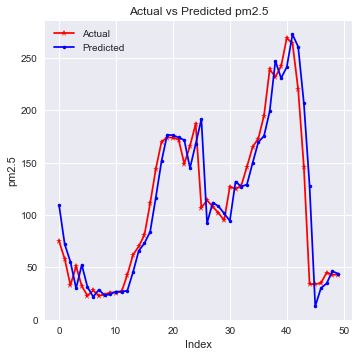

In [32]:
#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')
plt.savefig('plots/ch5/B07887_05_12.png', format='png', dpi=300)

## Chapter 5: Convolutional neural networks (CNNs) (1D Convolution)
## PM 2.5

In this notebook, we will use a multi-layer perceptron to develop time series forecasting models.
The dataset used for the examples of this notebook is on air pollution measured by concentration of
particulate matter (PM) of diameter less than or equal to 2.5 micrometers. There are other variables
such as air pressure, air temparature, dewpoint and so on.
Two time series models are developed - one on air pressure and the other on pm2.5.
The dataset has been downloaded from UCI Machine Learning Repository.

In [1]:
#https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
#set current working directory
os.chdir('D:/Practical Time Series')

In [3]:
#Read the dataset into a pandas.DataFrame
df = pd.read_csv('datasets/PRSA_data_2010.1.1-2014.12.31.csv')

In [4]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [5]:
#Let's see the first five rows of the DataFrame
df.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

In [6]:
"""
Rows having NaN values in column pm2.5 are dropped.
"""
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

To make sure that the rows are in the right order of date and time of observations,
a new column datetime is created from the date and time related columns of the DataFrame.
The new column consists of Python's datetime.datetime objects. The DataFrame is sorted in ascending order
over this column.

In [7]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

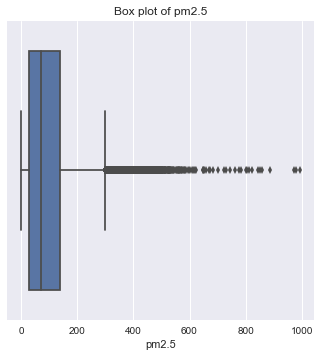

In [8]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['pm2.5'])
g.set_title('Box plot of pm2.5')

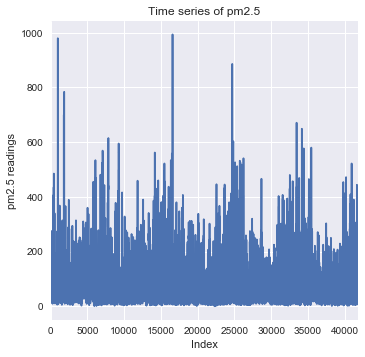

In [9]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'])
g.set_title('Time series of pm2.5')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

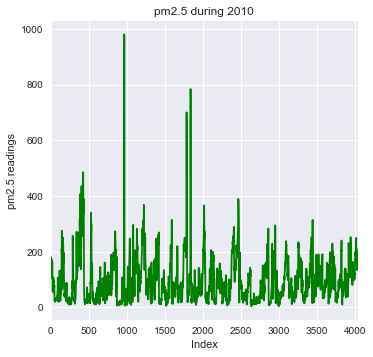

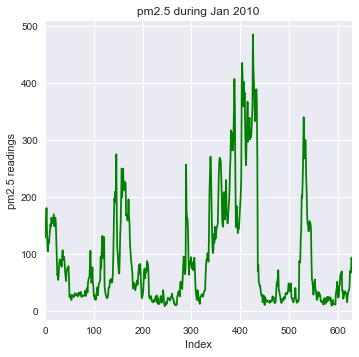

In [10]:
#Let's plot the series for six months to check if any pattern apparently exists.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=6,day=30)], color='g')
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

#Let's zoom in on one month.
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=1,day=31)], color='g')
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

Gradient descent algorithms perform better (for example converge faster) if the variables are wihtin range [-1, 1]. Many sources relax the boundary to even [-3, 3]. The pm2.5 variable is mixmax scaled to bound the tranformed variable within [0,1].

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1))

Before training the model, the dataset is split in two parts - train set and validation set.
The neural network is trained on the train set. This means computation of the loss function, back propagation
and weights updated by a gradient descent algorithm is done on the train set. The validation set is
used to evaluate the model and to determine the number of epochs in model training. Increasing the number of 
epochs will further decrease the loss function on the train set but might not neccesarily have the same effect
for the validation set due to overfitting on the train set.Hence, the number of epochs is controlled by keeping
a tap on the loss function computed for the validation set. We use Keras with Tensorflow backend to define and train
the model. All the steps involved in model training and validation is done by calling appropriate functions
of the Keras API.

In [12]:
"""
Let's start by splitting the dataset into train and validation. The dataset's time period if from
Jan 1st, 2010 to Dec 31st, 2014. The first fours years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [13]:
#First five rows of train
df_train.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  Is  Ir  \
0  25  2010      1    2     0  129.0   -16  -4.0  1020.0   SE  1.79   0   0   
1  26  2010      1    2     1  148.0   -15  -4.0  1020.0   SE  2.68   0   0   
2  27  2010      1    2     2  159.0   -11  -5.0  1021.0   SE  3.57   0   0   
3  28  2010      1    2     3  181.0    -7  -5.0  1022.0   SE  5.36   1   0   
4  29  2010      1    2     4  138.0    -7  -5.0  1022.0   SE  6.25   2   0   

             datetime  scaled_pm2.5  
0 2010-01-02 00:00:00      0.129779  
1 2010-01-02 01:00:00      0.148893  
2 2010-01-02 02:00:00      0.159960  
3 2010-01-02 03:00:00      0.182093  
4 2010-01-02 04:00:00      0.138833

In [14]:
#First five rows of validation
df_val.head()

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
33096  35065  2014      1    1     0   24.0   -20   7.0  1014.0   NW  143.48   
33097  35066  2014      1    1     1   53.0   -20   7.0  1013.0   NW  147.50   
33098  35067  2014      1    1     2   65.0   -20   6.0  1013.0   NW  151.52   
33099  35068  2014      1    1     3   70.0   -20   6.0  1013.0   NW  153.31   
33100  35069  2014      1    1     4   79.0   -18   3.0  1012.0   cv    0.89   

       Is  Ir            datetime  scaled_pm2.5  
33096   0   0 2014-01-01 00:00:00      0.024145  
33097   0   0 2014-01-01 01:00:00      0.053320  
33098   0   0 2014-01-01 02:00:00      0.065392  
33099   0   0 2014-01-01 03:00:00      0.070423  
33100   0   0 2014-01-01 04:00:00      0.079477

In [15]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)

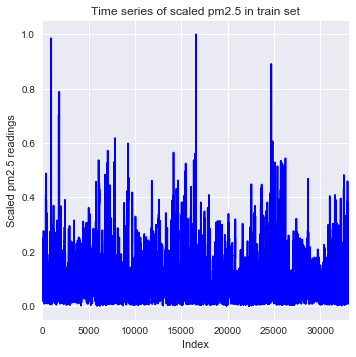

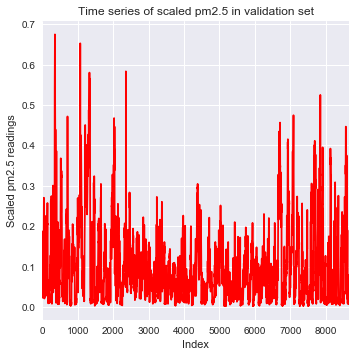

In [16]:
"""
The train and validation time series of scaled pm2.5 is also plotted.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_pm2.5'], color='b')
g.set_title('Time series of scaled pm2.5 in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_pm2.5'], color='r')
g.set_title('Time series of scaled pm2.5 in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

Now we need to generate regressors (X) and target variable (y) for train and validation. 2-D array of regressor and 1-D array of target is created from the original 1-D array of columm standardized_pm2.5 in the DataFrames. For the time series forecasting model, Past seven days of observations are used to predict for the next day. This is equivalent to a AR(7) model. We define a function which takes the original time series and the number of timesteps in regressors as input to generate the arrays of X and y.

In [17]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [18]:
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [19]:
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8654, 7) (8654,)


The input to convolution layers must be of shape (number of samples, number of timesteps, number of features per timestep). In this case we are modeling only pm2.5 hence number of features per timestep is one. Number of timesteps is seven and number of samples is same as the number of samples in X_train and X_val, which are reshaped to 3D arrays.

In [20]:
#X_train and X_val are reshaped to 3D arrays
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),\
                 X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)

Shape of arrays after reshaping: (33089, 7, 1) (8654, 7, 1)


Now we define the MLP using the Keras Functional API. In this approach a layer can be declared as the input of the following layer at the time of defining the next layer. 

In [21]:
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import ZeroPadding1D
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import AveragePooling1D
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [22]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,1), dtype='float32')

ZeroPadding1D layer is added next to add zeros at the begining and end of each series. Zeropadding ensure that the downstream convolution layer does not reduce the dimension of the output sequences. Pooling layer, added after the convolution layer is used to downsampling the input.

In [23]:
#Add zero padding
zeropadding_layer = ZeroPadding1D(padding=1)(input_layer)

The first argument of Conv1D is the number of filters, which determine the number of features in the output. Second argument indicates length of the 1D convolution window. The third argument is strides and represent the number of places to shift the convolution window. Lastly, setting use_bias as True, add a bias value during computation of an output feature. Here, the 1D convolution can be thought of as generating local AR models over rolling window of three time units.

In [24]:
#Add 1D convolution layers
conv1D_layer1 = Conv1D(64, 3, strides=1, use_bias=True)(zeropadding_layer)
conv1D_layer2 = Conv1D(32, 3, strides=1, use_bias=True)(conv1D_layer1)

AveragePooling1D is added next to downsample the input by taking average over pool size of three with stride of one timesteps. The average pooling in this case can be thought of as taking moving averages over a rolling window of three time units. We have used average pooling instead of max pooling to generate the moving averages.

In [25]:
#Add AveragePooling1D layer
avgpooling_layer = AveragePooling1D(pool_size=3, strides=1)(conv1D_layer2)

The preceeding pooling layer returns 3D output. Hence before passing to the output layer, a Flatten layer is added. The Flatten layer reshapes the input to (number of samples, number of timesteps*number of features per timestep), which is then fed to the output layer

In [26]:
#Add Flatten layer
flatten_layer = Flatten()(avgpooling_layer)

In [27]:
#A couple of Dense layers are also added
dense_layer1 = Dense(32)(avgpooling_layer)
dense_layer2 = Dense(16)(dense_layer1)

In [28]:
dropout_layer = Dropout(0.2)(flatten_layer)

In [29]:
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)

The input, dense and output layers will now be packed inside a Model, which is wrapper class for training and making
predictions. The box plot of pm2.5 shows the presence of outliers. Hence, mean absolute error (MAE) is used as absolute deviations suffer less fluctuations compared to squared deviations.

The network's weights are optimized by the Adam algorithm. Adam stands for adaptive moment estimation
and has been a popular choice for training deep neural networks. Unlike, stochastic gradient descent, adam uses
different learning rates for each weight and separately updates the same as the training progresses. The learning rate of a weight is updated based on exponentially weighted moving averages of the weight's gradients and the squared gradients.

In [30]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')#SGD(lr=0.001, decay=1e-5))
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7, 1)              0         
_________________________________________________________________
zero_padding1d_1 (ZeroPaddin (None, 9, 1)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 64)             256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 32)             6176      
_________________________________________________________________
average_pooling1d_1 (Average (None, 3, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 96)                0         
__________

The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.

In [31]:
save_weights_at = os.path.join('keras_models', 'PRSA_data_PM2.5_1DConv_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 33089 samples, validate on 8654 samples
Epoch 1/20
33089/33089 [==============================] - 5s - loss: 0.0191 - val_loss: 0.0136
Epoch 2/20
33089/33089 [==============================] - 4s - loss: 0.0168 - val_loss: 0.0135
Epoch 3/20
33089/33089 [==============================] - 4s - loss: 0.0166 - val_loss: 0.0147
Epoch 4/20
33089/33089 [==============================] - 4s - loss: 0.0164 - val_loss: 0.0137
Epoch 5/20
33089/33089 [==============================] - 4s - loss: 0.0164 - val_loss: 0.0140
Epoch 6/20
33089/33089 [==============================] - 4s - loss: 0.0162 - val_loss: 0.0158
Epoch 7/20
33089/33089 [==============================] - 4s - loss: 0.0163 - val_loss: 0.0136
Epoch 8/20
33089/33089 [==============================] - 7s - loss: 0.0161 - val_loss: 0.0140
Epoch 9/20
33089/33089 [==============================] - 7s - loss: 0.0161 - val_loss: 0.0136
Epoch 10/20
33089/33089 [==============================] - 7s - loss: 0.0161 - val_loss: 0.0131


Prediction are made for the pm2.5 from the best saved model. The model's predictions, which are on the standardized  pm2.5, are inverse transformed to get predictions of original pm2.5.

In [33]:
best_model = load_model(os.path.join('keras_models', 'PRSA_data_PM2.5_1DConv_weights.18-0.0128.hdf5'))
preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))

MAE for the validation set: 12.724


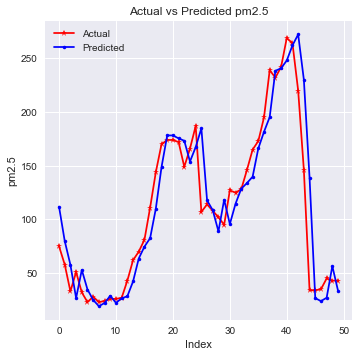

In [36]:
#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')